In [1]:
from pathlib import Path
checkpoint = Path('/').joinpath('workspace', 'outputs', '2020-07-18', '09-35-56')
checkpoint

PosixPath('/workspace/outputs/2020-07-18/09-35-56')

In [2]:
import torch
import pytorch_lightning as pl
import torchvision
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import make_grid
import hydra
import yaml
import matplotlib.pyplot as plt

In [3]:
from src.model import Encoder, Decoder
from src.integrated_model import IntegratedModel
from src.patch import make_patch2d

In [4]:
with open(checkpoint.joinpath('.hydra', 'config.yaml')) as file:
    config = hydra.utils.DictConfig(yaml.safe_load(file))
print(config)

{'callback': {'callbacks': None, 'checkpoint': {'class': 'pytorch_lightning.callbacks.ModelCheckpoint', 'params': {'filepath': None, 'mode': 'auto', 'monitor': 'val_loss', 'save_top_k': 1, 'verbose': False}}, 'early_stopping': {'class': 'pytorch_lightning.callbacks.EarlyStopping', 'params': {'min_delta': 0, 'mode': 'auto', 'monitor': 'val_loss', 'patience': '${hparams.early_stopping}', 'verbose': False}}}, 'dataset': {'class': 'src.dataset.adobe_font_char_images', 'params': {'root': '/dataset/'}}, 'dataset_output_n': 52, 'experiment_name': 'tesutodesu', 'hparams': {'batch_size': 1024, 'dataset_n': 0, 'dataset_n_splits': 5, 'early_stopping': 200, 'latent_dim': 256, 'lr': 0.001, 'max_epochs': 100000, 'min_epochs': 1, 'n_pow': 1, 'num_workers': 6, 'patch_size': 15, 'seed': 0, 'test_patch_n': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512], 'train_patch_n': [1, 2, 4, 8, 16, 32, 64, 128, 256]}, 'loggers': [{'class': 'pytorch_lightning.loggers.TensorBoardLogger', 'params': {'name': '', 'save_dir': '

In [5]:
encoder = Encoder(**config.model_params.encoder)
decoder = Decoder(**config.model_params.decoder)

In [6]:
import glob

model_checkpoint = glob.glob(str(checkpoint / '**' / '*.ckpt'), recursive=True)
assert len(model_checkpoint) == 1
model_checkpoint = model_checkpoint[0]

In [7]:
transform = torchvision.transforms.Compose([hydra.utils.instantiate(i) for i in config.transform]) if config.transform else None
# target_transform = torchvision.transforms.Compose([hydra.utils.instantiate(i) for i in config.target_transform]) if config.target_transform else None
target_transform = None

____, dataset = hydra.utils.instantiate(config.dataset)
dataset.set_transform(transform, target_transform)

100%|██████████| 9828/9828 [00:00<00:00, 10289.99it/s]


In [8]:
model = IntegratedModel.load_from_checkpoint(model_checkpoint, encoder=encoder, decoder=decoder, optim=None, dataset=dataset)
model

IntegratedModel(
  (encoder): Encoder(
    (linear_0): Linear(in_features=225, out_features=256, bias=True)
    (linear_1): Linear(in_features=256, out_features=256, bias=True)
    (linear_2): Linear(in_features=256, out_features=256, bias=True)
  )
  (decoder): Decoder(
    (linear_0): Linear(in_features=256, out_features=256, bias=True)
    (linear_1): Linear(in_features=256, out_features=256, bias=True)
    (linear_2): Linear(in_features=256, out_features=52, bias=True)
  )
)

In [9]:
patch_size = config.hparams.patch_size
n_pow = 0 - config.hparams.n_pow
print(n_pow)

patch = torch.zeros([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())

print()

patch = torch.ones([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())

print()

patch = torch.rand([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())

print()

patch = torch.rand([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())

print()

patch = torch.rand([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())


-1
0.008931451477110386 0.057576727122068405 0.7242363095283508 -0.7056795954704285
0.08931449055671692 5.7576727867126465 7.242363452911377 -7.056796073913574
0.893144428730011 575.7672729492188 72.42357635498047 -70.5680160522461

0.003937309607863426 0.013961889781057835 0.6552219986915588 -0.4615371823310852
0.03937280923128128 1.3961819410324097 6.552203178405762 -4.615357398986816
0.3937261998653412 139.61788940429688 65.5219955444336 -46.153533935546875

0.005153017118573189 0.062385205179452896 0.7345564961433411 -0.7946683764457703
-0.08090279251337051 2.8736417293548584 6.35685920715332 -4.244364261627197
-0.6840658187866211 260.73956298828125 62.68025207519531 -35.54117202758789

-0.016735531389713287 0.1449798345565796 1.470890760421753 -1.0370938777923584
-0.06294914335012436 2.383322238922119 5.211738109588623 -4.6839704513549805
-0.6400913596153259 275.7403564453125 64.77472686767578 -38.220054626464844

0.0296702291816473 0.06496108323335648 0.7555926442146301 -0.668781

189.0
0 AGaramondPro-BoldItalic capA


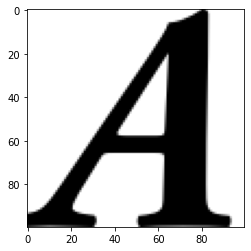


(true_class == predicted_class).item()=True
capA 0.9693766832351685
capA 0.9693766832351685


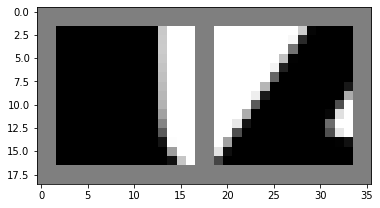


(true_class == predicted_class).item()=True
capA 0.9391180276870728
capA 0.9391180276870728


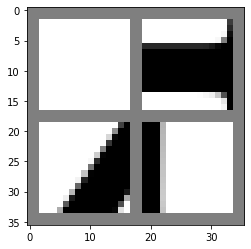


(true_class == predicted_class).item()=True
capA 0.9997442364692688
capA 0.9997442364692688


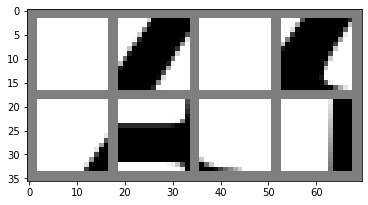


1 AGaramondPro-BoldItalic capB


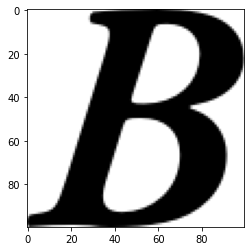


(true_class == predicted_class).item()=True
capB 0.6854381561279297
capB 0.6854381561279297


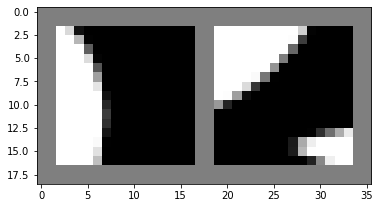


(true_class == predicted_class).item()=True
capB 0.9812572002410889
capB 0.9812572002410889


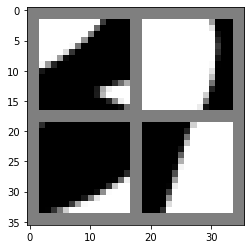


(true_class == predicted_class).item()=True
capB 0.9888883233070374
capB 0.9888883233070374


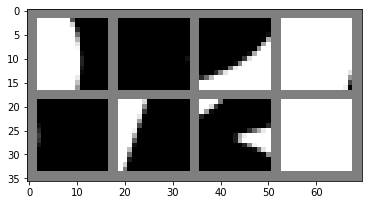


2 AGaramondPro-BoldItalic capC


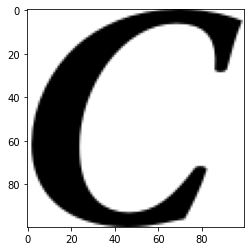


(true_class == predicted_class).item()=True
capC 0.5228245258331299
capC 0.5228245258331299


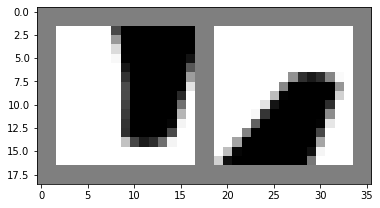


(true_class == predicted_class).item()=True
capC 0.5996946692466736
capC 0.5996946692466736


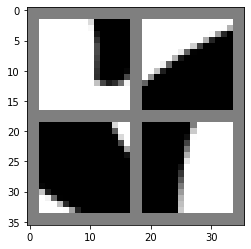


(true_class == predicted_class).item()=True
capC 0.8570848107337952
capC 0.8570848107337952


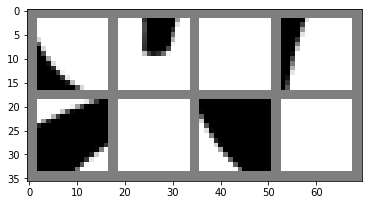


3 AGaramondPro-BoldItalic capD


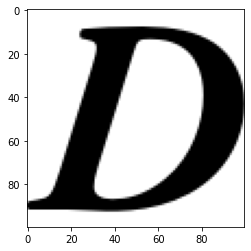


(true_class == predicted_class).item()=True
capD 0.6893140077590942
capD 0.6893140077590942


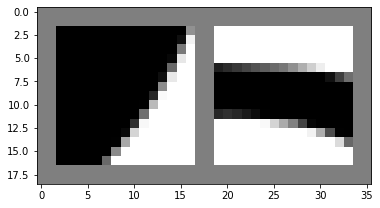


(true_class == predicted_class).item()=True
capD 0.9889286160469055
capD 0.9889286160469055


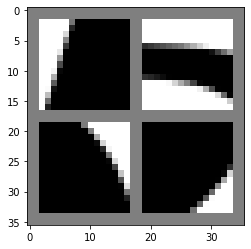


(true_class == predicted_class).item()=True
capD 0.9858568906784058
capD 0.9858568906784058


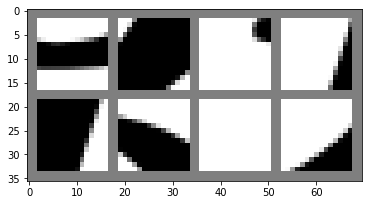


4 AGaramondPro-BoldItalic capE


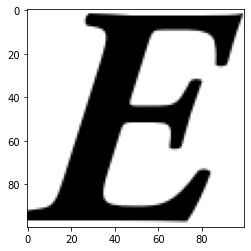


(true_class == predicted_class).item()=True
capE 0.7906050086021423
capE 0.7906050086021423


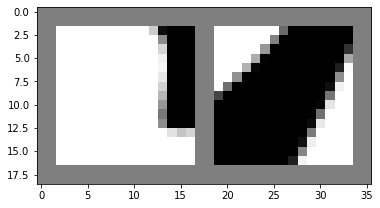


(true_class == predicted_class).item()=True
capE 0.9338228106498718
capE 0.9338228106498718


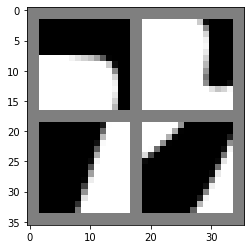


(true_class == predicted_class).item()=True
capE 0.7750710844993591
capE 0.7750710844993591


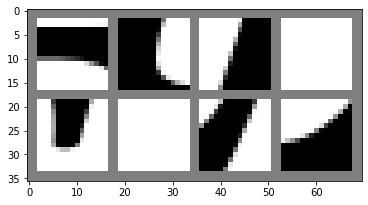


5 AGaramondPro-BoldItalic capF


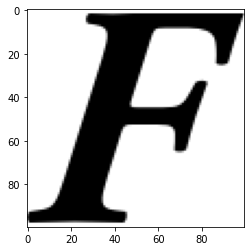


(true_class == predicted_class).item()=False
capF 0.4107997417449951
capE 0.5843510031700134


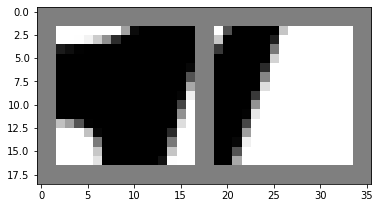


(true_class == predicted_class).item()=False
capF 0.24453102052211761
capE 0.7552189230918884


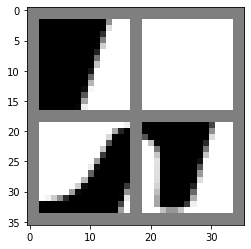


(true_class == predicted_class).item()=True
capF 0.5722842216491699
capF 0.5722842216491699


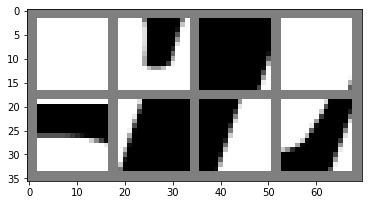


6 AGaramondPro-BoldItalic capG


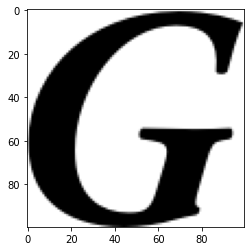


(true_class == predicted_class).item()=True
capG 0.6491332650184631
capG 0.6491332650184631


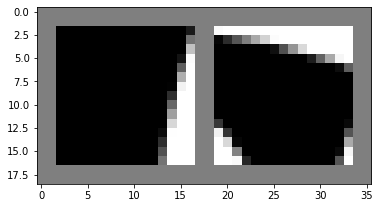


(true_class == predicted_class).item()=True
capG 0.9778203368186951
capG 0.9778203368186951


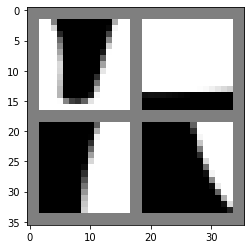


(true_class == predicted_class).item()=True
capG 0.9986427426338196
capG 0.9986427426338196


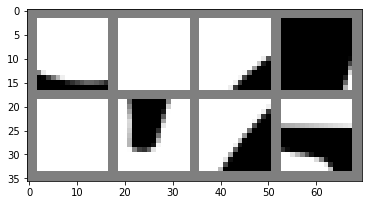


7 AGaramondPro-BoldItalic capH


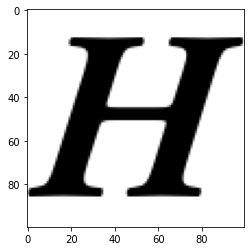


(true_class == predicted_class).item()=True
capH 0.9018175601959229
capH 0.9018175601959229


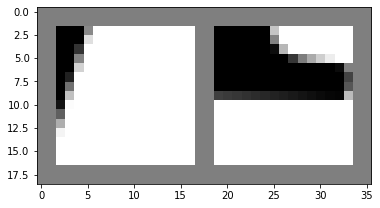


(true_class == predicted_class).item()=True
capH 0.9980403780937195
capH 0.9980403780937195


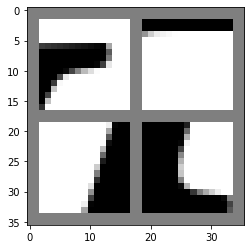


(true_class == predicted_class).item()=True
capH 0.9990457892417908
capH 0.9990457892417908


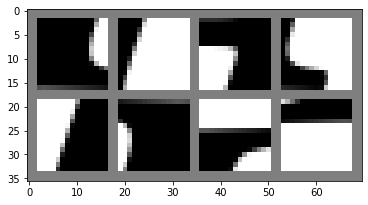


8 AGaramondPro-BoldItalic capI


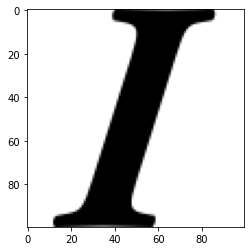


(true_class == predicted_class).item()=True
capI 0.2792830169200897
capI 0.2792830169200897


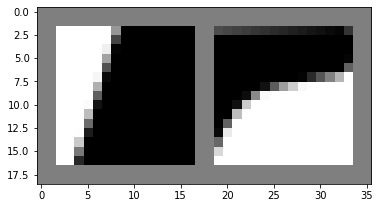


(true_class == predicted_class).item()=True
capI 0.4336339831352234
capI 0.4336339831352234


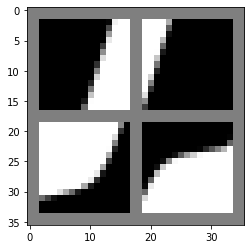


(true_class == predicted_class).item()=True
capI 0.9574200510978699
capI 0.9574200510978699


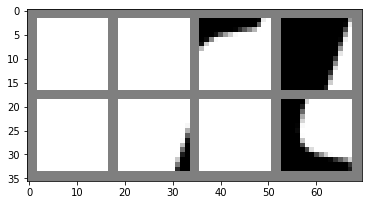


9 AGaramondPro-BoldItalic capJ


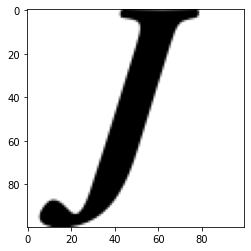


(true_class == predicted_class).item()=True
capJ 0.3977387249469757
capJ 0.3977387249469757


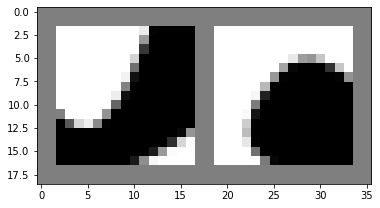


(true_class == predicted_class).item()=True
capJ 0.549404501914978
capJ 0.549404501914978


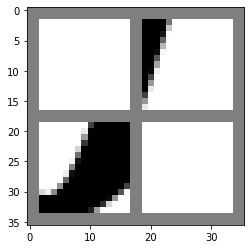


(true_class == predicted_class).item()=True
capJ 0.9721839427947998
capJ 0.9721839427947998


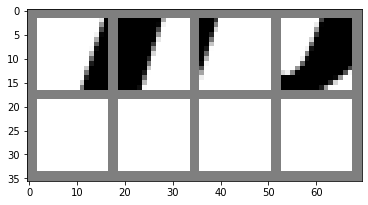


10 AGaramondPro-BoldItalic capK


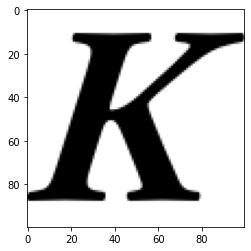


(true_class == predicted_class).item()=True
capK 0.845899760723114
capK 0.845899760723114


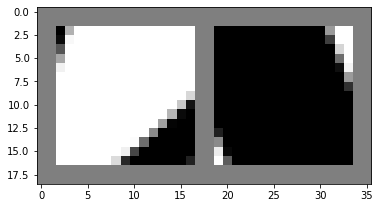


(true_class == predicted_class).item()=True
capK 0.9917671084403992
capK 0.9917671084403992


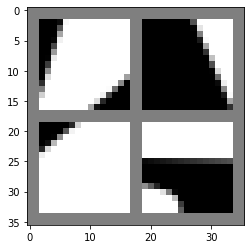


(true_class == predicted_class).item()=True
capK 0.9997585415840149
capK 0.9997585415840149


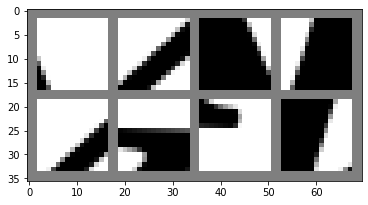


11 AGaramondPro-BoldItalic capL


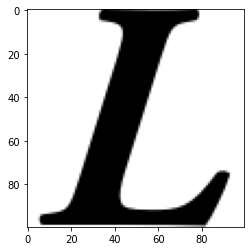


(true_class == predicted_class).item()=True
capL 0.46671876311302185
capL 0.46671876311302185


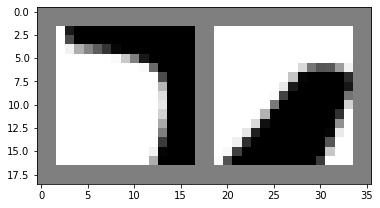


(true_class == predicted_class).item()=True
capL 0.9186880588531494
capL 0.9186880588531494


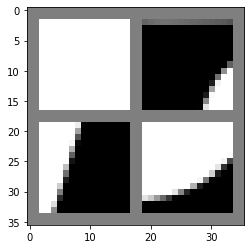


(true_class == predicted_class).item()=True
capL 0.9992867112159729
capL 0.9992867112159729


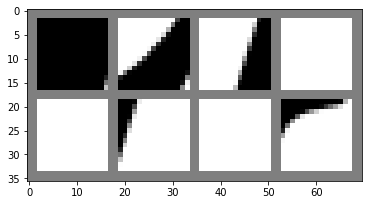


12 AGaramondPro-BoldItalic capM


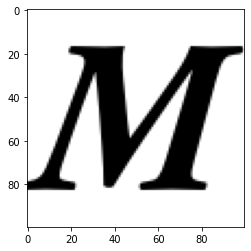


(true_class == predicted_class).item()=True
capM 0.9970037341117859
capM 0.9970037341117859


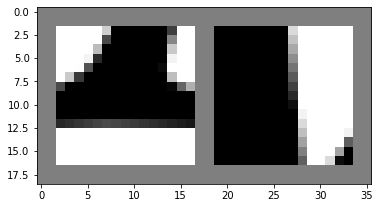


(true_class == predicted_class).item()=True
capM 0.9997734427452087
capM 0.9997734427452087


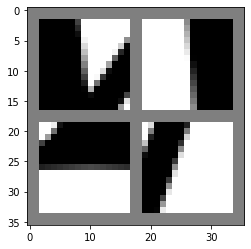


(true_class == predicted_class).item()=True
capM 0.9999533891677856
capM 0.9999533891677856


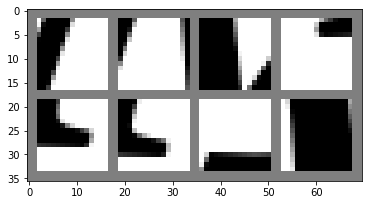


13 AGaramondPro-BoldItalic capN


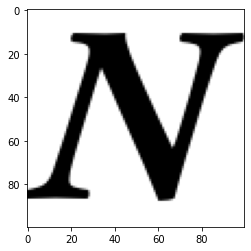


(true_class == predicted_class).item()=True
capN 0.9028820991516113
capN 0.9028820991516113


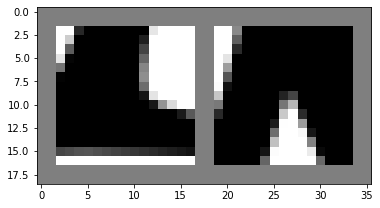


(true_class == predicted_class).item()=True
capN 0.681183397769928
capN 0.681183397769928


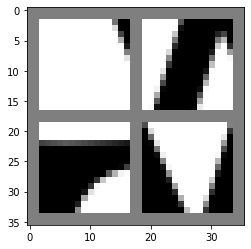


(true_class == predicted_class).item()=True
capN 0.9886993765830994
capN 0.9886993765830994


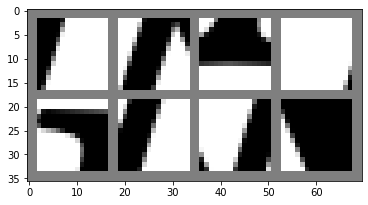


14 AGaramondPro-BoldItalic capO


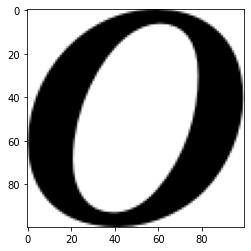


(true_class == predicted_class).item()=True
capO 0.4095863699913025
capO 0.4095863699913025


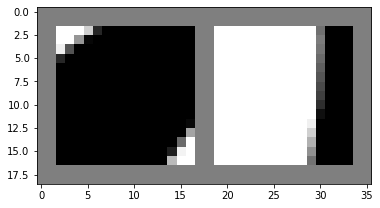


(true_class == predicted_class).item()=True
capO 0.5336033701896667
capO 0.5336033701896667


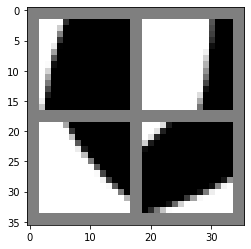


(true_class == predicted_class).item()=True
capO 0.5120106339454651
capO 0.5120106339454651


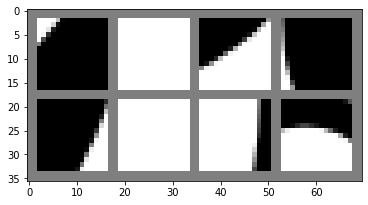


15 AGaramondPro-BoldItalic capP


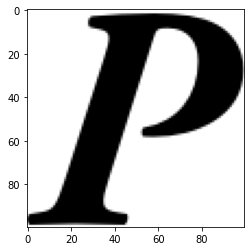


(true_class == predicted_class).item()=True
capP 0.5130783319473267
capP 0.5130783319473267


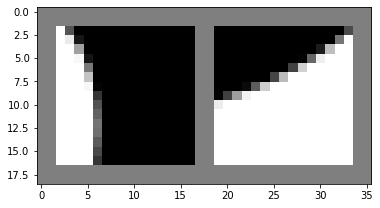


(true_class == predicted_class).item()=True
capP 0.9204210638999939
capP 0.9204210638999939


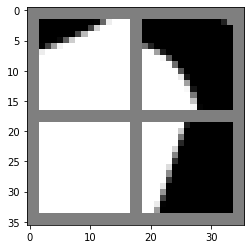


(true_class == predicted_class).item()=True
capP 0.9748172760009766
capP 0.9748172760009766


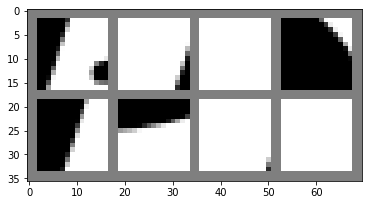


16 AGaramondPro-BoldItalic capQ


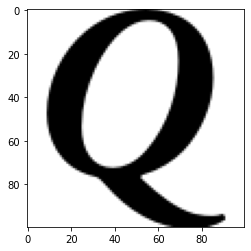


(true_class == predicted_class).item()=True
capQ 0.9758766293525696
capQ 0.9758766293525696


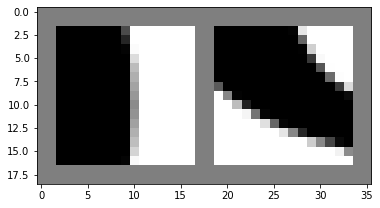


(true_class == predicted_class).item()=True
capQ 0.9850938320159912
capQ 0.9850938320159912


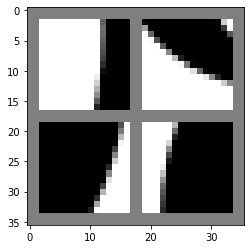


(true_class == predicted_class).item()=True
capQ 0.9997689127922058
capQ 0.9997689127922058


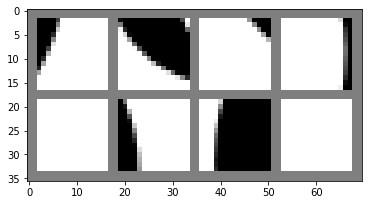


17 AGaramondPro-BoldItalic capR


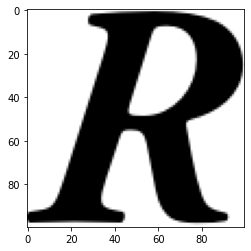


(true_class == predicted_class).item()=False
capR 0.17625564336776733
smallQ 0.30159783363342285


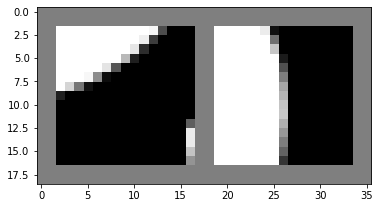


(true_class == predicted_class).item()=True
capR 0.9970045685768127
capR 0.9970045685768127


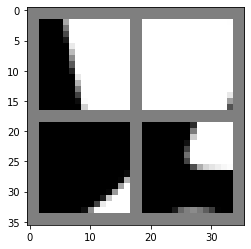


(true_class == predicted_class).item()=True
capR 0.9890507459640503
capR 0.9890507459640503


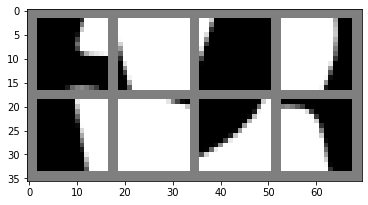


18 AGaramondPro-BoldItalic capS


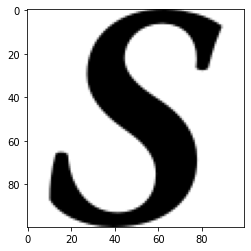


(true_class == predicted_class).item()=True
capS 0.634467601776123
capS 0.634467601776123


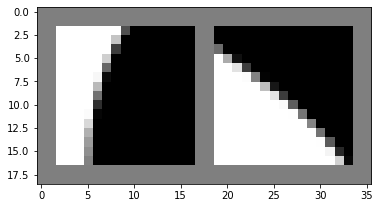


(true_class == predicted_class).item()=True
capS 0.7421779036521912
capS 0.7421779036521912


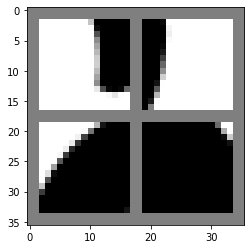


(true_class == predicted_class).item()=True
capS 0.6344502568244934
capS 0.6344502568244934


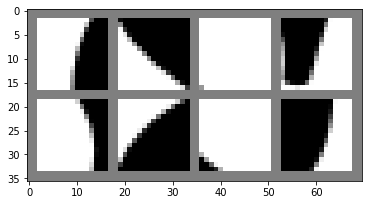


19 AGaramondPro-BoldItalic capT


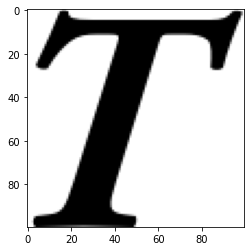


(true_class == predicted_class).item()=True
capT 0.907343327999115
capT 0.907343327999115


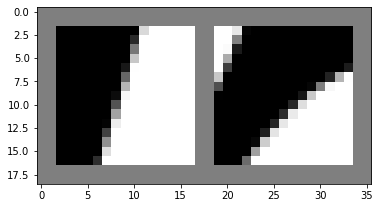


(true_class == predicted_class).item()=True
capT 0.7688592672348022
capT 0.7688592672348022


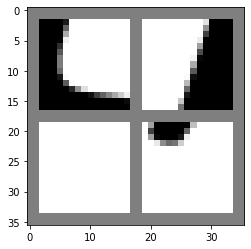


(true_class == predicted_class).item()=True
capT 0.9989259839057922
capT 0.9989259839057922


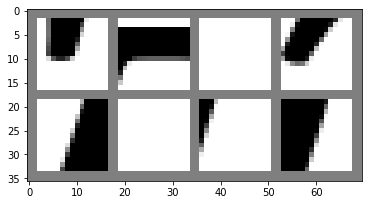


20 AGaramondPro-BoldItalic capU


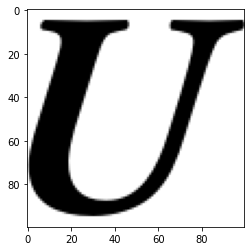


(true_class == predicted_class).item()=True
capU 0.9860886931419373
capU 0.9860886931419373


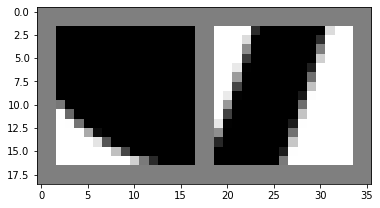


(true_class == predicted_class).item()=True
capU 0.9980283379554749
capU 0.9980283379554749


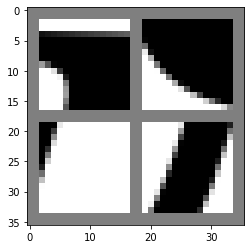


(true_class == predicted_class).item()=True
capU 0.9997982382774353
capU 0.9997982382774353


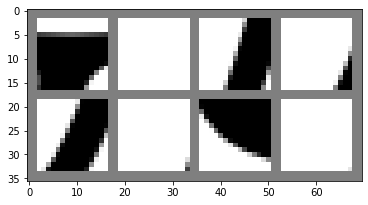


21 AGaramondPro-BoldItalic capV


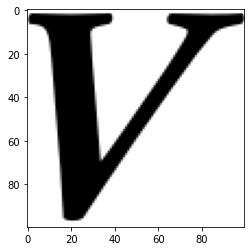


(true_class == predicted_class).item()=True
capV 0.9055803418159485
capV 0.9055803418159485


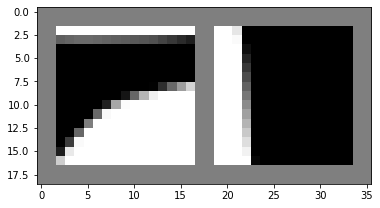


(true_class == predicted_class).item()=True
capV 0.9276973009109497
capV 0.9276973009109497


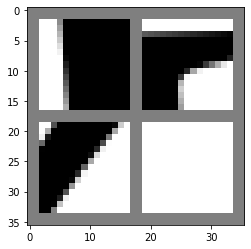


(true_class == predicted_class).item()=True
capV 0.9932460188865662
capV 0.9932460188865662


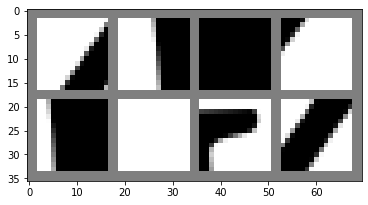


22 AGaramondPro-BoldItalic capW


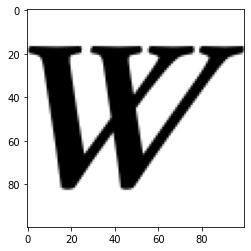


(true_class == predicted_class).item()=True
capW 0.8712010979652405
capW 0.8712010979652405


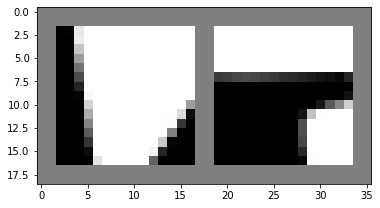


(true_class == predicted_class).item()=True
capW 0.974264919757843
capW 0.974264919757843


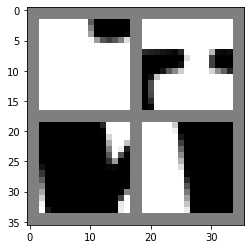


(true_class == predicted_class).item()=True
capW 0.9387521147727966
capW 0.9387521147727966


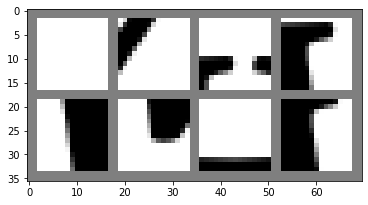


23 AGaramondPro-BoldItalic capX


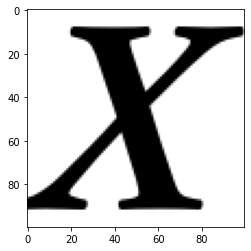


(true_class == predicted_class).item()=True
capX 0.6830148100852966
capX 0.6830148100852966


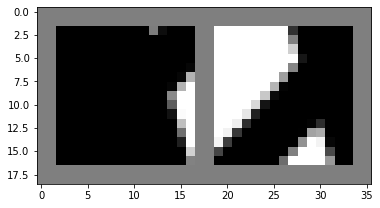


(true_class == predicted_class).item()=True
capX 0.6857396364212036
capX 0.6857396364212036


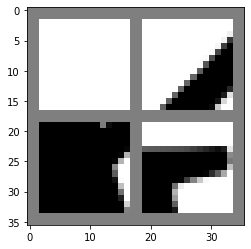


(true_class == predicted_class).item()=True
capX 0.9890493154525757
capX 0.9890493154525757


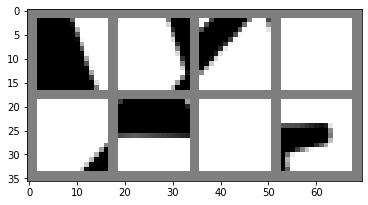


24 AGaramondPro-BoldItalic capY


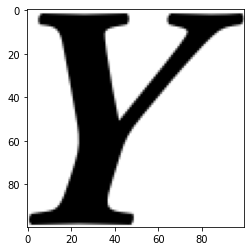


(true_class == predicted_class).item()=True
capY 0.6558709144592285
capY 0.6558709144592285


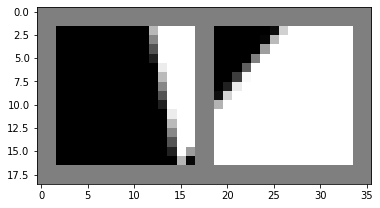


(true_class == predicted_class).item()=True
capY 0.9821361899375916
capY 0.9821361899375916


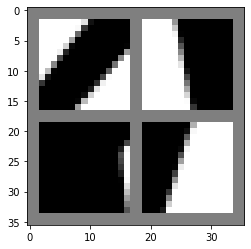


(true_class == predicted_class).item()=True
capY 0.9993477463722229
capY 0.9993477463722229


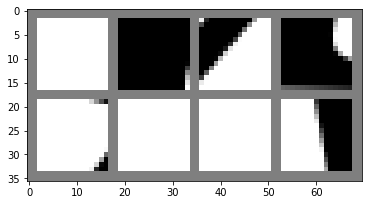


25 AGaramondPro-BoldItalic capZ


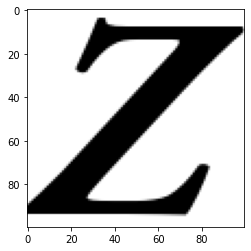


(true_class == predicted_class).item()=True
capZ 0.6046658754348755
capZ 0.6046658754348755


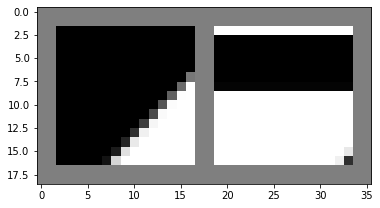


(true_class == predicted_class).item()=True
capZ 0.7214311957359314
capZ 0.7214311957359314


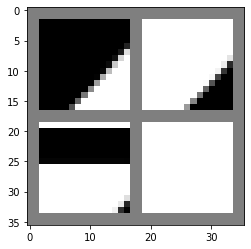


(true_class == predicted_class).item()=True
capZ 0.9315075278282166
capZ 0.9315075278282166


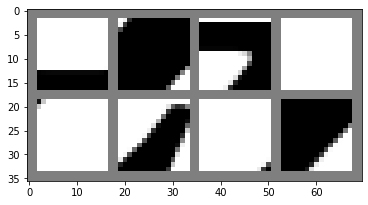


26 AGaramondPro-BoldItalic smallA


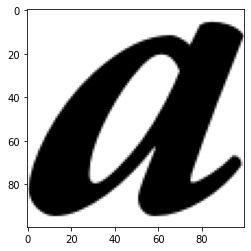


(true_class == predicted_class).item()=False
smallA 0.12418566644191742
smallD 0.33651286363601685


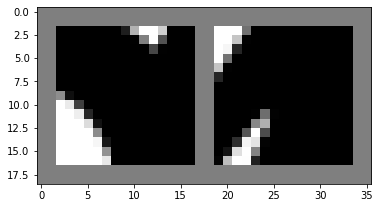


(true_class == predicted_class).item()=True
smallA 0.8445973992347717
smallA 0.8445973992347717


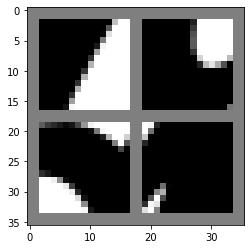


(true_class == predicted_class).item()=True
smallA 0.9670401215553284
smallA 0.9670401215553284


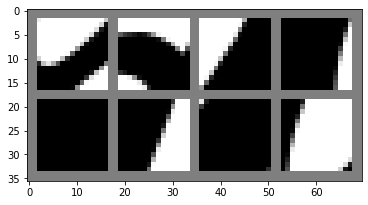


27 AGaramondPro-BoldItalic smallB


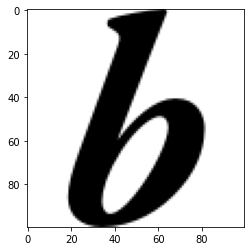


(true_class == predicted_class).item()=True
smallB 0.7410817742347717
smallB 0.7410817742347717


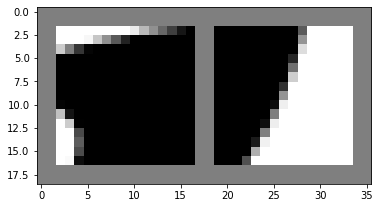


(true_class == predicted_class).item()=True
smallB 0.5858306288719177
smallB 0.5858306288719177


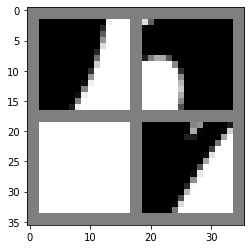


(true_class == predicted_class).item()=True
smallB 0.7324627041816711
smallB 0.7324627041816711


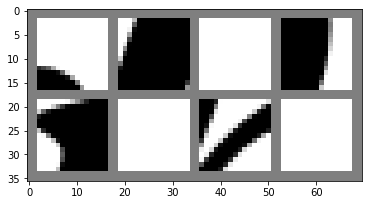


28 AGaramondPro-BoldItalic smallC


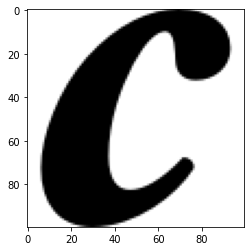


(true_class == predicted_class).item()=False
smallC 0.2128736972808838
capC 0.2756378948688507


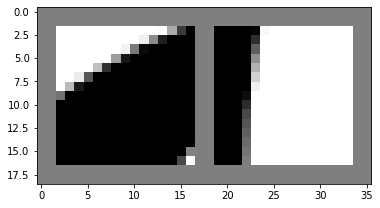


(true_class == predicted_class).item()=True
smallC 0.5097998976707458
smallC 0.5097998976707458


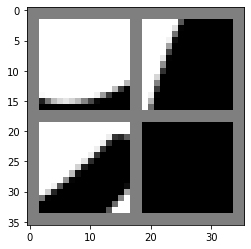


(true_class == predicted_class).item()=True
smallC 0.9852052330970764
smallC 0.9852052330970764


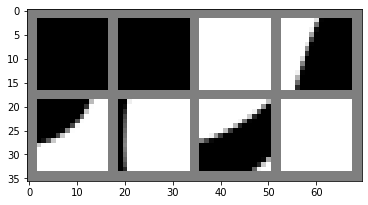


29 AGaramondPro-BoldItalic smallD


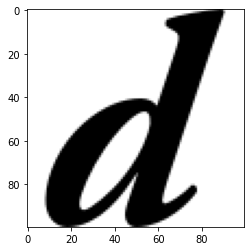


(true_class == predicted_class).item()=True
smallD 0.9884603023529053
smallD 0.9884603023529053


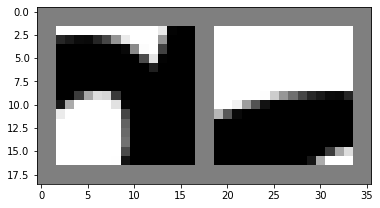


(true_class == predicted_class).item()=True
smallD 0.9719512462615967
smallD 0.9719512462615967


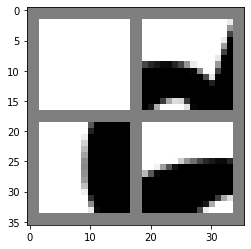


(true_class == predicted_class).item()=True
smallD 0.99969482421875
smallD 0.99969482421875


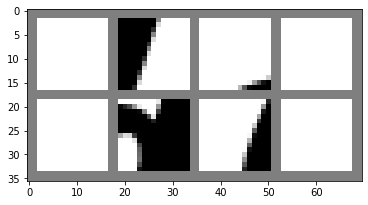


30 AGaramondPro-BoldItalic smallE


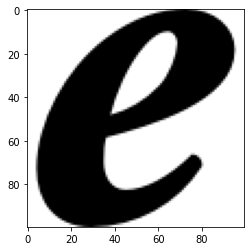


(true_class == predicted_class).item()=True
smallE 0.6138901114463806
smallE 0.6138901114463806


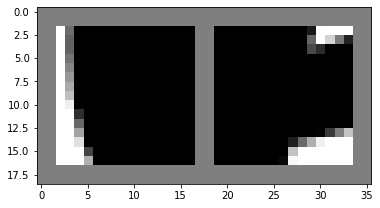


(true_class == predicted_class).item()=True
smallE 0.9977339506149292
smallE 0.9977339506149292


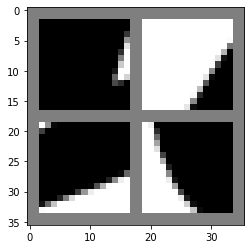


(true_class == predicted_class).item()=True
smallE 0.9997281432151794
smallE 0.9997281432151794


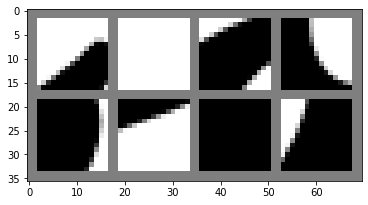


31 AGaramondPro-BoldItalic smallF


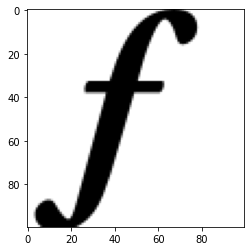


(true_class == predicted_class).item()=True
smallF 0.9677810668945312
smallF 0.9677810668945312


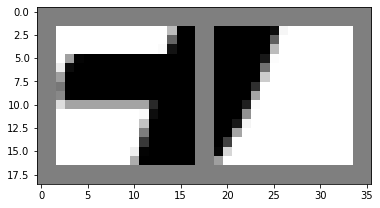


(true_class == predicted_class).item()=True
smallF 0.9979041814804077
smallF 0.9979041814804077


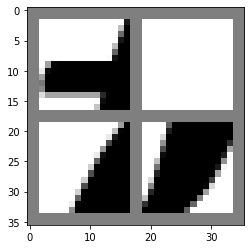


(true_class == predicted_class).item()=True
smallF 0.9998186230659485
smallF 0.9998186230659485


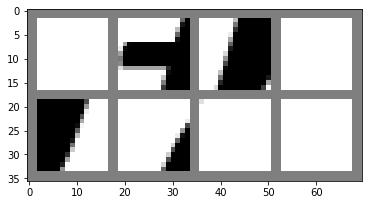


32 AGaramondPro-BoldItalic smallG


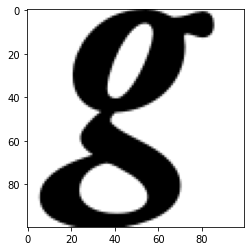


(true_class == predicted_class).item()=True
smallG 0.9950055480003357
smallG 0.9950055480003357


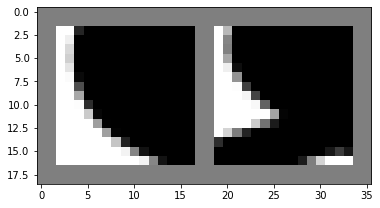


(true_class == predicted_class).item()=True
smallG 0.9995560050010681
smallG 0.9995560050010681


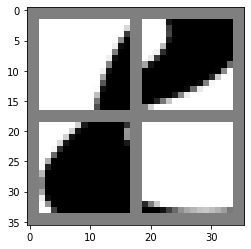


(true_class == predicted_class).item()=True
smallG 0.999657154083252
smallG 0.999657154083252


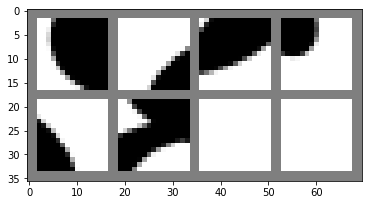


33 AGaramondPro-BoldItalic smallH


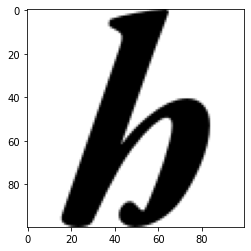


(true_class == predicted_class).item()=False
smallH 0.05145968124270439
smallB 0.7153179049491882


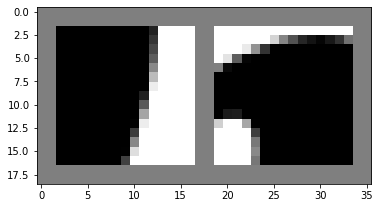


(true_class == predicted_class).item()=True
smallH 0.42266207933425903
smallH 0.42266207933425903


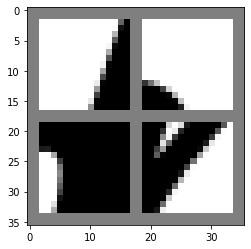


(true_class == predicted_class).item()=True
smallH 0.9508358836174011
smallH 0.9508358836174011


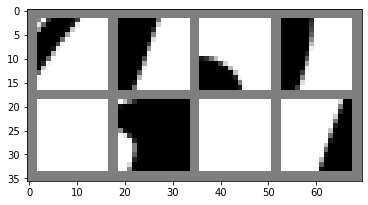


34 AGaramondPro-BoldItalic smallI


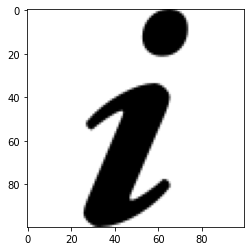


(true_class == predicted_class).item()=True
smallI 0.505326509475708
smallI 0.505326509475708


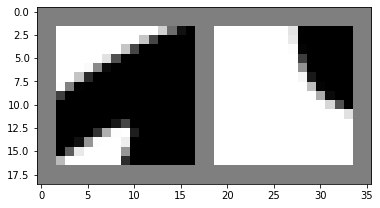


(true_class == predicted_class).item()=True
smallI 0.6697478294372559
smallI 0.6697478294372559


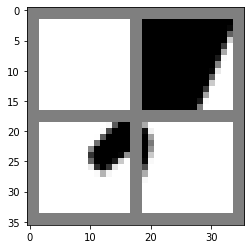


(true_class == predicted_class).item()=True
smallI 0.9487562775611877
smallI 0.9487562775611877


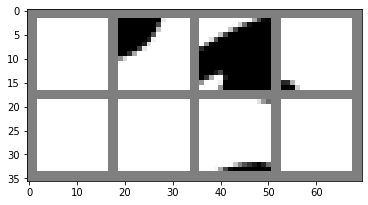


35 AGaramondPro-BoldItalic smallJ


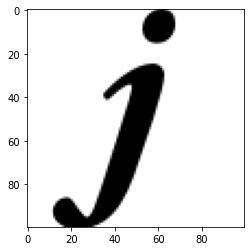


(true_class == predicted_class).item()=True
smallJ 0.7614725828170776
smallJ 0.7614725828170776


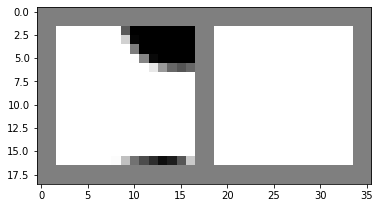


(true_class == predicted_class).item()=True
smallJ 0.9859145879745483
smallJ 0.9859145879745483


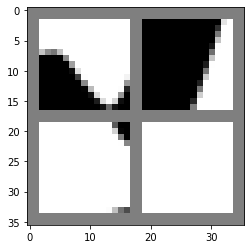


(true_class == predicted_class).item()=True
smallJ 0.9999390840530396
smallJ 0.9999390840530396


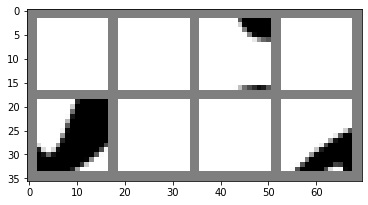


36 AGaramondPro-BoldItalic smallK


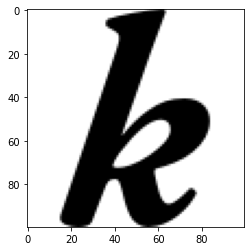


(true_class == predicted_class).item()=True
smallK 0.6712559461593628
smallK 0.6712559461593628


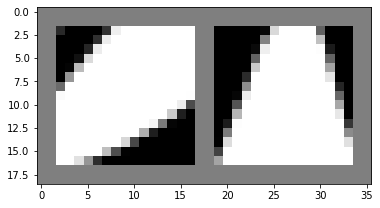


(true_class == predicted_class).item()=False
smallK 0.3970128297805786
capK 0.6024309992790222


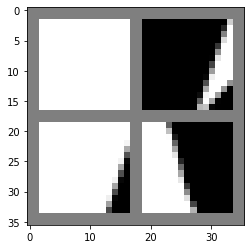


(true_class == predicted_class).item()=True
smallK 0.9976993203163147
smallK 0.9976993203163147


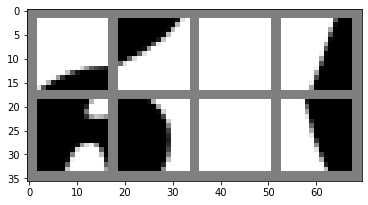


37 AGaramondPro-BoldItalic smallL


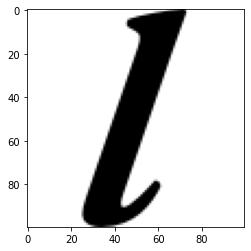


(true_class == predicted_class).item()=True
smallL 0.2635445296764374
smallL 0.2635445296764374


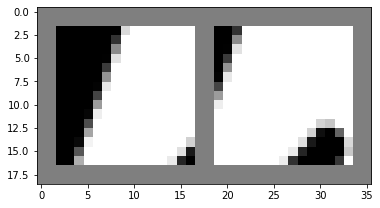


(true_class == predicted_class).item()=True
smallL 0.7618006467819214
smallL 0.7618006467819214


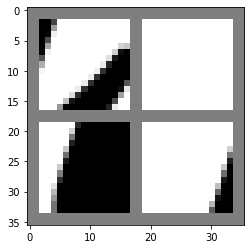


(true_class == predicted_class).item()=True
smallL 0.9908635020256042
smallL 0.9908635020256042


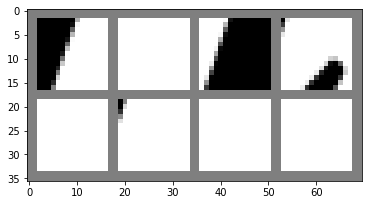


38 AGaramondPro-BoldItalic smallM


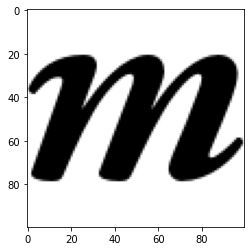


(true_class == predicted_class).item()=True
smallM 0.9414934515953064
smallM 0.9414934515953064


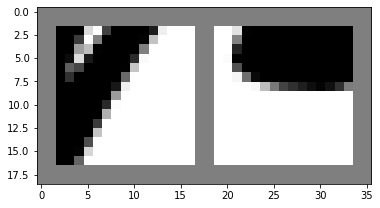


(true_class == predicted_class).item()=True
smallM 0.9976414442062378
smallM 0.9976414442062378


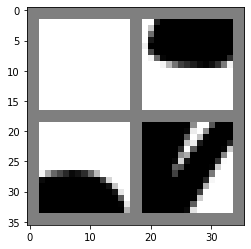


(true_class == predicted_class).item()=True
smallM 0.9999457597732544
smallM 0.9999457597732544


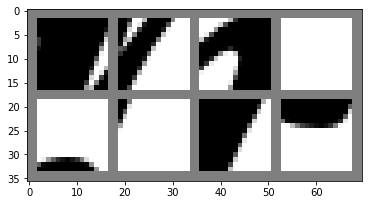


39 AGaramondPro-BoldItalic smallN


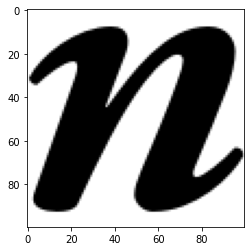


(true_class == predicted_class).item()=False
smallN 0.40312689542770386
smallR 0.46494677662849426


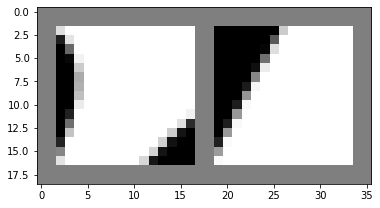


(true_class == predicted_class).item()=True
smallN 0.8790176510810852
smallN 0.8790176510810852


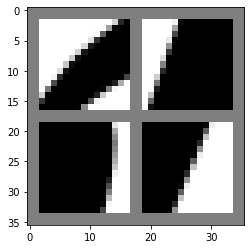


(true_class == predicted_class).item()=True
smallN 0.9963041543960571
smallN 0.9963041543960571


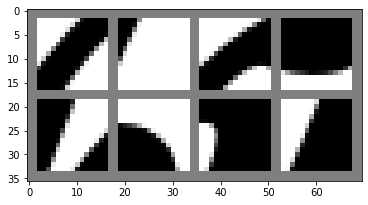


40 AGaramondPro-BoldItalic smallO


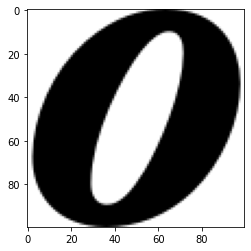


(true_class == predicted_class).item()=True
smallO 0.4332141876220703
smallO 0.4332141876220703


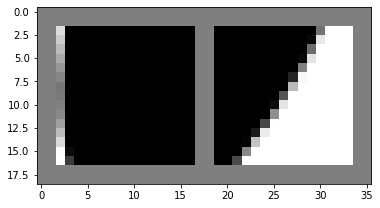


(true_class == predicted_class).item()=True
smallO 0.5686625242233276
smallO 0.5686625242233276


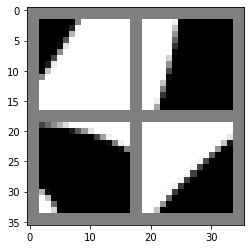


(true_class == predicted_class).item()=True
smallO 0.5974335074424744
smallO 0.5974335074424744


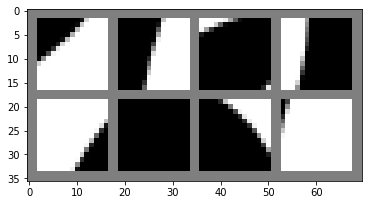


41 AGaramondPro-BoldItalic smallP


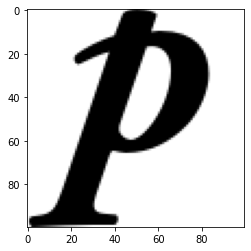


(true_class == predicted_class).item()=True
smallP 0.963172435760498
smallP 0.963172435760498


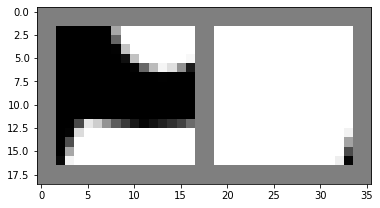


(true_class == predicted_class).item()=True
smallP 0.9969367980957031
smallP 0.9969367980957031


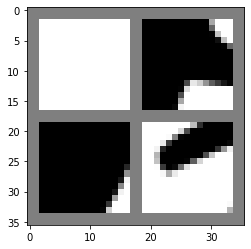


(true_class == predicted_class).item()=True
smallP 0.9907840490341187
smallP 0.9907840490341187


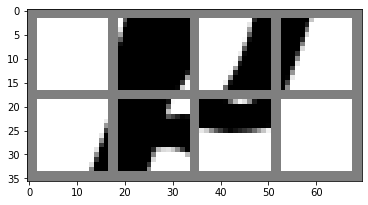


42 AGaramondPro-BoldItalic smallQ


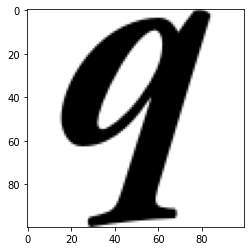


(true_class == predicted_class).item()=True
smallQ 0.49229249358177185
smallQ 0.49229249358177185


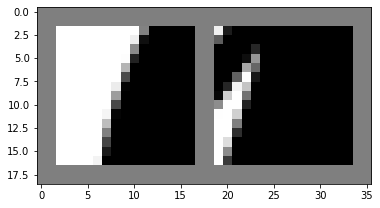


(true_class == predicted_class).item()=True
smallQ 0.7077005505561829
smallQ 0.7077005505561829


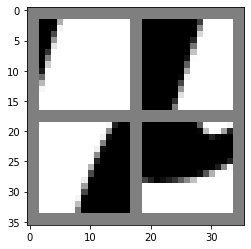


(true_class == predicted_class).item()=True
smallQ 0.9752516746520996
smallQ 0.9752516746520996


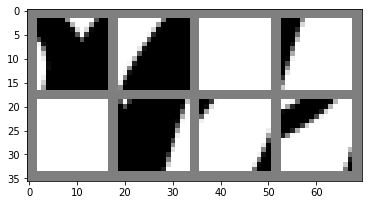


43 AGaramondPro-BoldItalic smallR


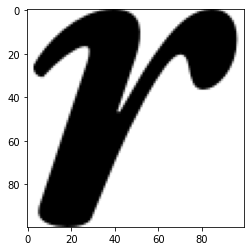


(true_class == predicted_class).item()=True
smallR 0.8248768448829651
smallR 0.8248768448829651


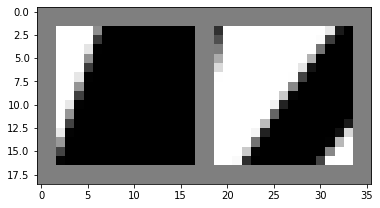


(true_class == predicted_class).item()=True
smallR 0.9984139204025269
smallR 0.9984139204025269


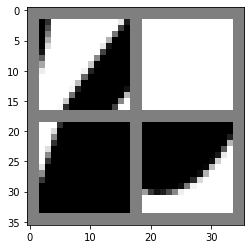


(true_class == predicted_class).item()=True
smallR 0.9995591044425964
smallR 0.9995591044425964


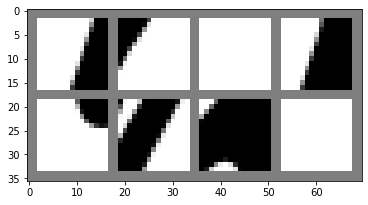


44 AGaramondPro-BoldItalic smallS


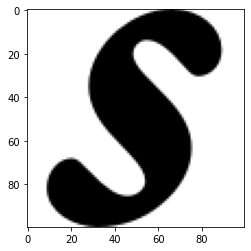


(true_class == predicted_class).item()=False
smallS 0.3740883469581604
capS 0.6205623149871826


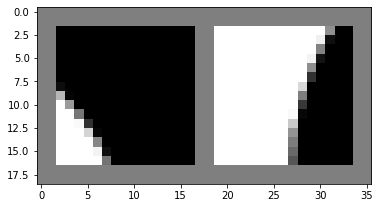


(true_class == predicted_class).item()=True
smallS 0.8274843692779541
smallS 0.8274843692779541


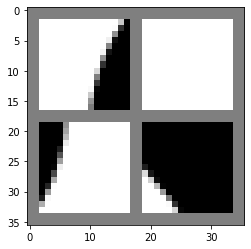


(true_class == predicted_class).item()=True
smallS 0.9631028771400452
smallS 0.9631028771400452


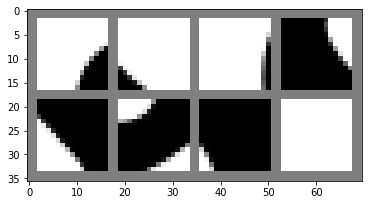


45 AGaramondPro-BoldItalic smallT


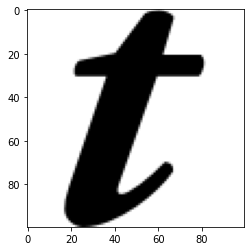


(true_class == predicted_class).item()=True
smallT 0.5920342803001404
smallT 0.5920342803001404


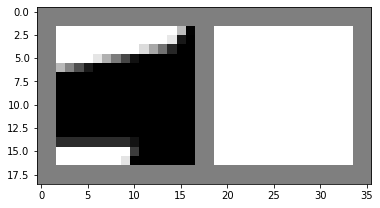


(true_class == predicted_class).item()=True
smallT 0.8697136044502258
smallT 0.8697136044502258


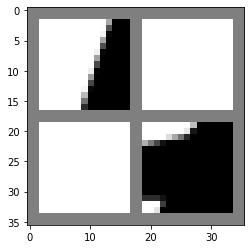


(true_class == predicted_class).item()=True
smallT 0.9993124008178711
smallT 0.9993124008178711


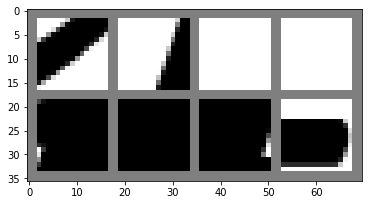


46 AGaramondPro-BoldItalic smallU


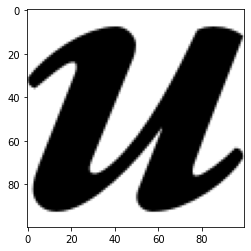


(true_class == predicted_class).item()=True
smallU 0.6952998042106628
smallU 0.6952998042106628


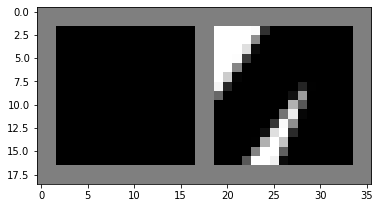


(true_class == predicted_class).item()=True
smallU 0.8144738078117371
smallU 0.8144738078117371


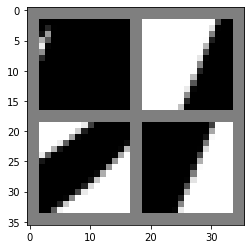


(true_class == predicted_class).item()=True
smallU 0.9896117448806763
smallU 0.9896117448806763


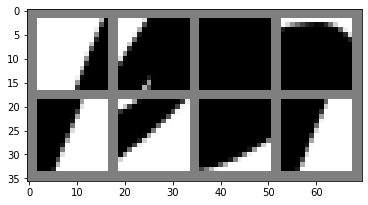


47 AGaramondPro-BoldItalic smallV


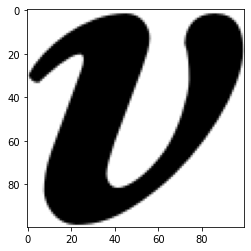


(true_class == predicted_class).item()=False
smallV 0.1439393013715744
capW 0.35127678513526917


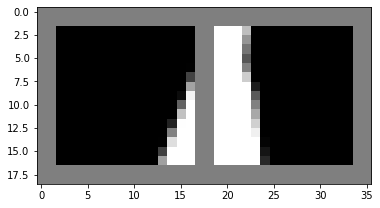


(true_class == predicted_class).item()=True
smallV 0.6062461733818054
smallV 0.6062461733818054


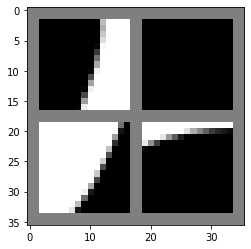


(true_class == predicted_class).item()=True
smallV 0.9976354837417603
smallV 0.9976354837417603


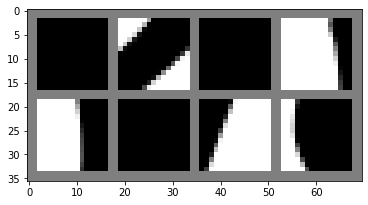


48 AGaramondPro-BoldItalic smallW


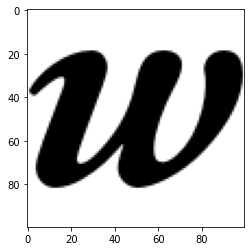


(true_class == predicted_class).item()=False
smallW 0.17760181427001953
capA 0.24742735922336578


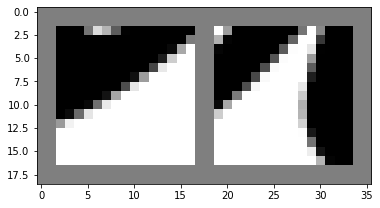


(true_class == predicted_class).item()=True
smallW 0.8426360487937927
smallW 0.8426360487937927


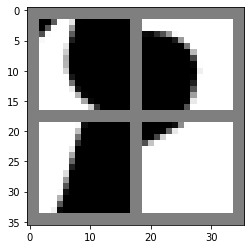


(true_class == predicted_class).item()=True
smallW 0.9945737719535828
smallW 0.9945737719535828


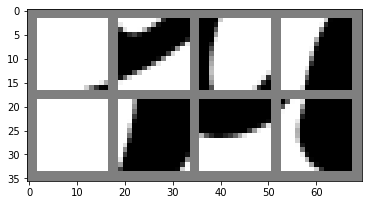


49 AGaramondPro-BoldItalic smallX


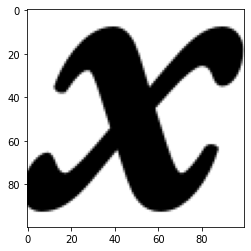


(true_class == predicted_class).item()=True
smallX 0.9589943885803223
smallX 0.9589943885803223


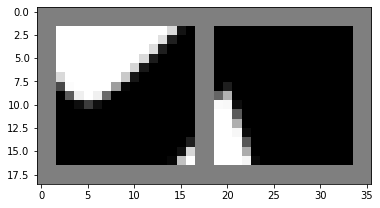


(true_class == predicted_class).item()=True
smallX 0.980064332485199
smallX 0.980064332485199


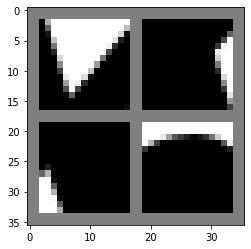


(true_class == predicted_class).item()=True
smallX 0.9917638301849365
smallX 0.9917638301849365


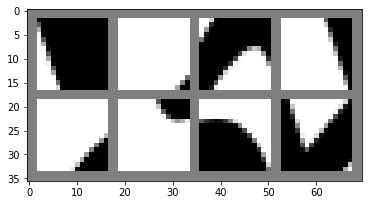


50 AGaramondPro-BoldItalic smallY


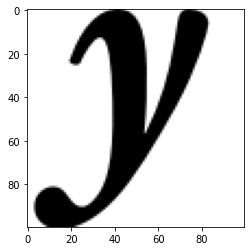


(true_class == predicted_class).item()=True
smallY 0.672156810760498
smallY 0.672156810760498


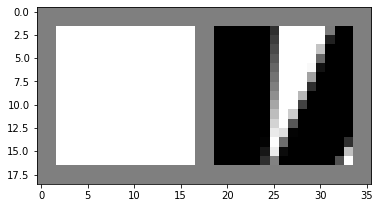


(true_class == predicted_class).item()=True
smallY 0.7989478707313538
smallY 0.7989478707313538


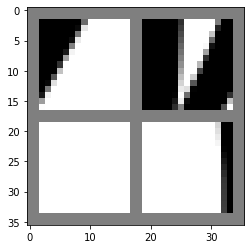


(true_class == predicted_class).item()=True
smallY 0.9996132254600525
smallY 0.9996132254600525


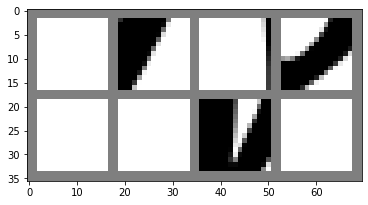


51 AGaramondPro-BoldItalic smallZ


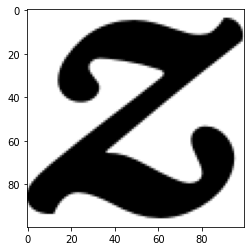


(true_class == predicted_class).item()=True
smallZ 0.6294854879379272
smallZ 0.6294854879379272


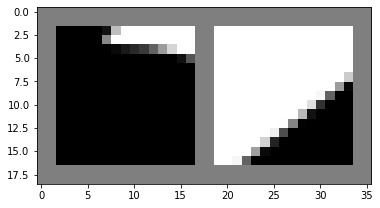


(true_class == predicted_class).item()=True
smallZ 0.9826985001564026
smallZ 0.9826985001564026


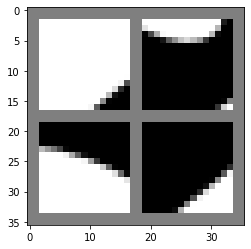


(true_class == predicted_class).item()=True
smallZ 0.9454155564308167
smallZ 0.9454155564308167


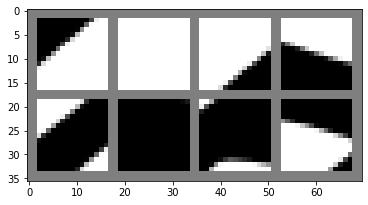


52 AJensonPro-Capt capA


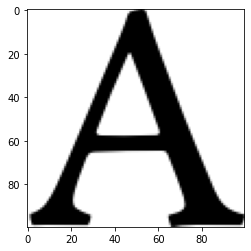


(true_class == predicted_class).item()=True
capA 0.9979918003082275
capA 0.9979918003082275


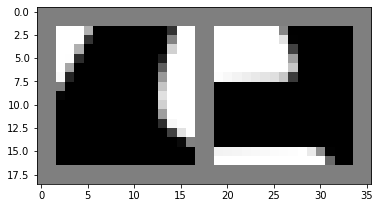


(true_class == predicted_class).item()=True
capA 0.9881507158279419
capA 0.9881507158279419


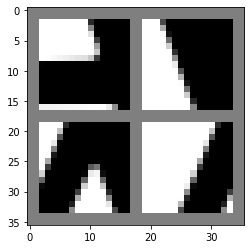


(true_class == predicted_class).item()=True
capA 0.954704999923706
capA 0.954704999923706


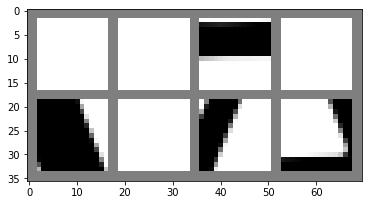


53 AJensonPro-Capt capB


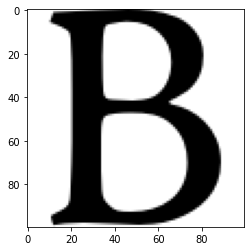


(true_class == predicted_class).item()=True
capB 0.9603701829910278
capB 0.9603701829910278


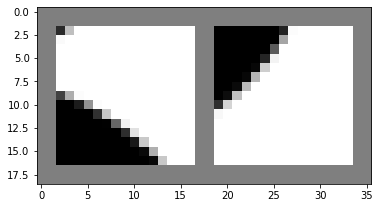


(true_class == predicted_class).item()=True
capB 0.9723300337791443
capB 0.9723300337791443


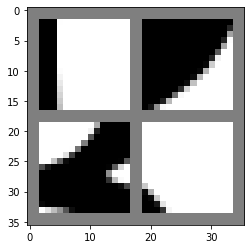


(true_class == predicted_class).item()=True
capB 0.93953937292099
capB 0.93953937292099


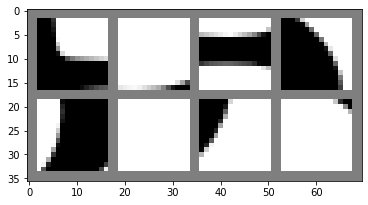


54 AJensonPro-Capt capC


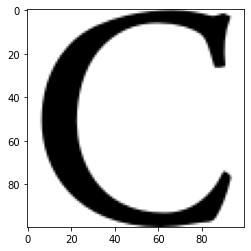


(true_class == predicted_class).item()=True
capC 0.7891114354133606
capC 0.7891114354133606


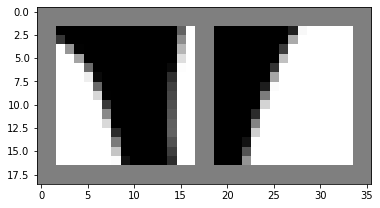


(true_class == predicted_class).item()=True
capC 0.4589926302433014
capC 0.4589926302433014


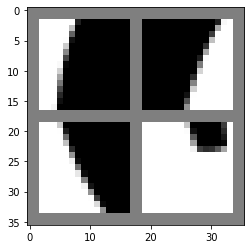


(true_class == predicted_class).item()=True
capC 0.9481626152992249
capC 0.9481626152992249


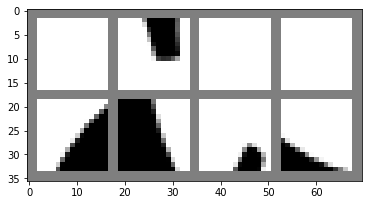


55 AJensonPro-Capt capD


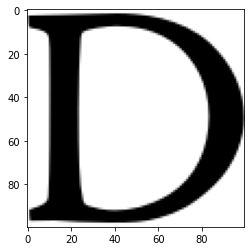


(true_class == predicted_class).item()=True
capD 0.6712743639945984
capD 0.6712743639945984


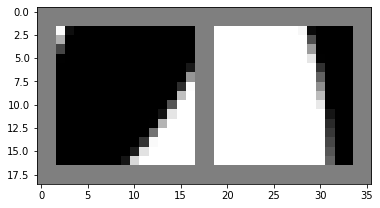


(true_class == predicted_class).item()=True
capD 0.7948938012123108
capD 0.7948938012123108


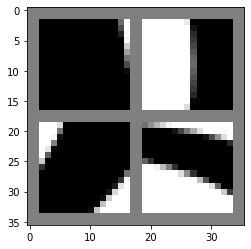


(true_class == predicted_class).item()=True
capD 0.9869017004966736
capD 0.9869017004966736


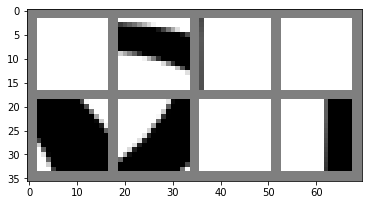


56 AJensonPro-Capt capE


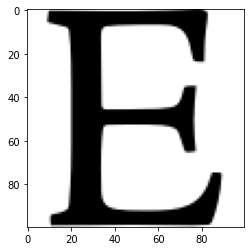


(true_class == predicted_class).item()=True
capE 0.6743654608726501
capE 0.6743654608726501


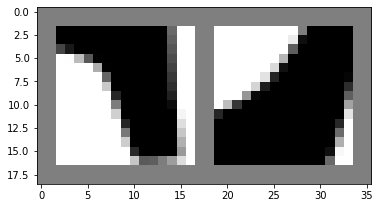


(true_class == predicted_class).item()=True
capE 0.928885281085968
capE 0.928885281085968


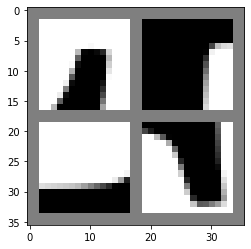


(true_class == predicted_class).item()=True
capE 0.9535228610038757
capE 0.9535228610038757


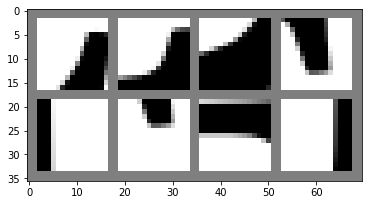


57 AJensonPro-Capt capF


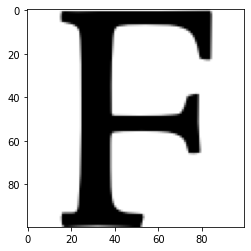


(true_class == predicted_class).item()=True
capF 0.5641732215881348
capF 0.5641732215881348


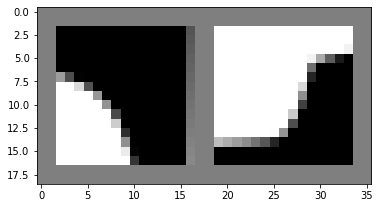


(true_class == predicted_class).item()=False
capF 0.4679054915904999
capE 0.5316372513771057


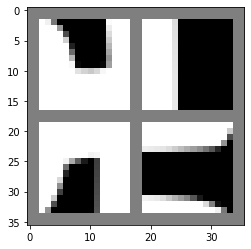


(true_class == predicted_class).item()=True
capF 0.5854464769363403
capF 0.5854464769363403


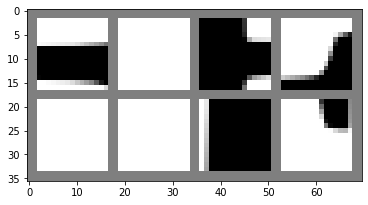


58 AJensonPro-Capt capG


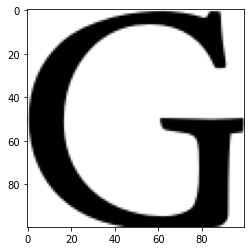


(true_class == predicted_class).item()=True
capG 0.9631448984146118
capG 0.9631448984146118


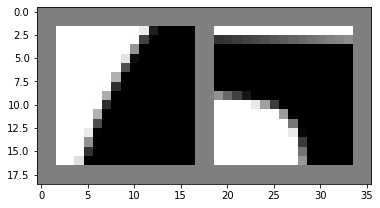


(true_class == predicted_class).item()=True
capG 0.986099123954773
capG 0.986099123954773


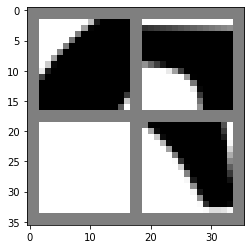


(true_class == predicted_class).item()=True
capG 0.9684686064720154
capG 0.9684686064720154


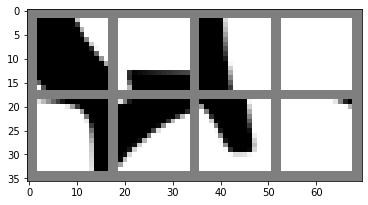


59 AJensonPro-Capt capH


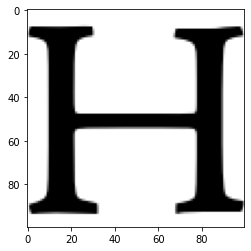


(true_class == predicted_class).item()=True
capH 0.9145013093948364
capH 0.9145013093948364


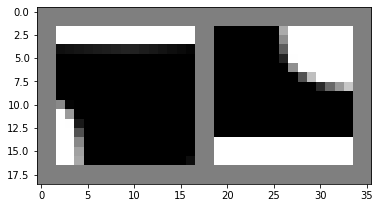


(true_class == predicted_class).item()=True
capH 0.9749738574028015
capH 0.9749738574028015


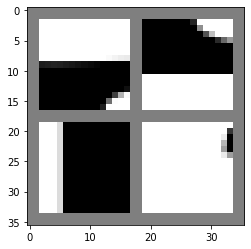


(true_class == predicted_class).item()=True
capH 0.9976490139961243
capH 0.9976490139961243


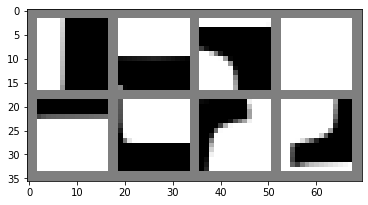


60 AJensonPro-Capt capI


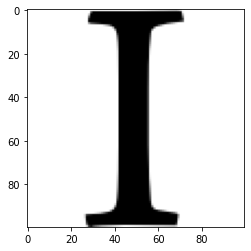


(true_class == predicted_class).item()=True
capI 0.22374014556407928
capI 0.22374014556407928


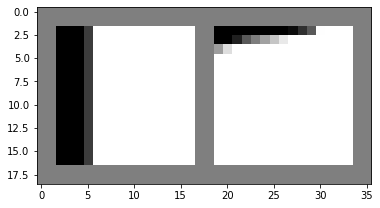


(true_class == predicted_class).item()=True
capI 0.3796682059764862
capI 0.3796682059764862


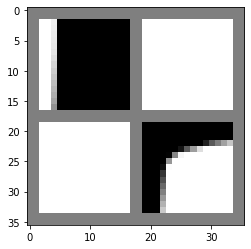


(true_class == predicted_class).item()=True
capI 0.5370756983757019
capI 0.5370756983757019


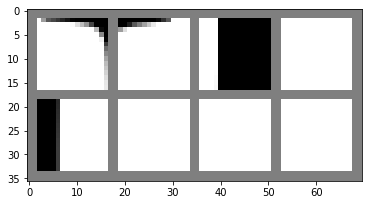


61 AJensonPro-Capt capJ


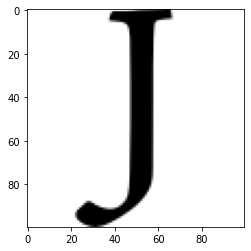


(true_class == predicted_class).item()=True
capJ 0.47717663645744324
capJ 0.47717663645744324


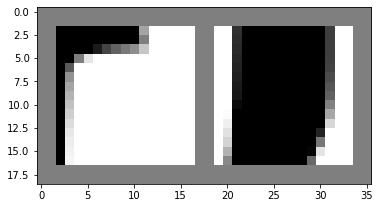


(true_class == predicted_class).item()=False
capJ 0.3635658919811249
smallJ 0.6233171820640564


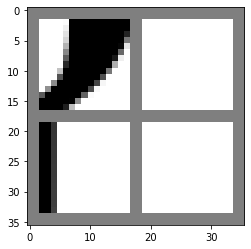


(true_class == predicted_class).item()=True
capJ 0.7232563495635986
capJ 0.7232563495635986


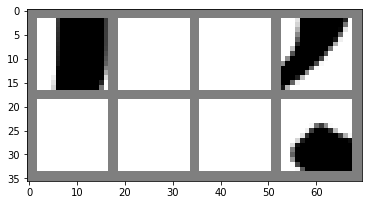


62 AJensonPro-Capt capK


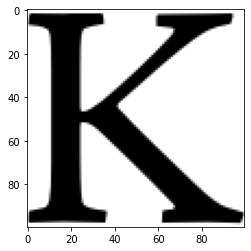


(true_class == predicted_class).item()=True
capK 0.6640430688858032
capK 0.6640430688858032


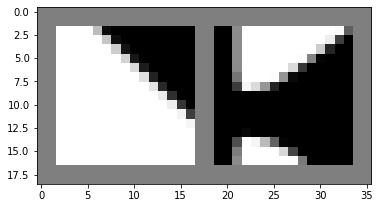


(true_class == predicted_class).item()=True
capK 0.9096007347106934
capK 0.9096007347106934


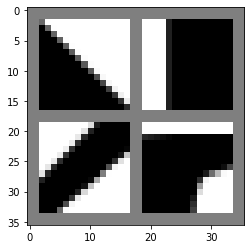


(true_class == predicted_class).item()=True
capK 0.9877955913543701
capK 0.9877955913543701


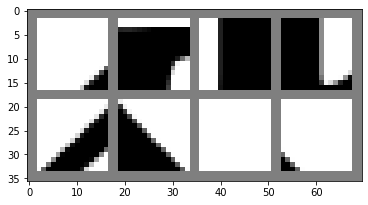


63 AJensonPro-Capt capL


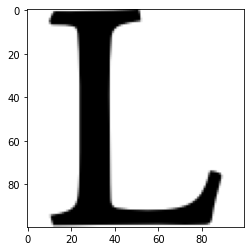


(true_class == predicted_class).item()=False
capL 0.3129444122314453
capE 0.5104941725730896


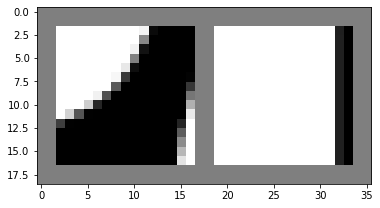


(true_class == predicted_class).item()=True
capL 0.7718709111213684
capL 0.7718709111213684


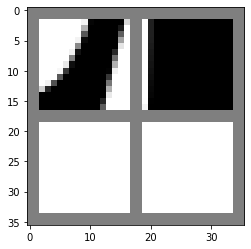


(true_class == predicted_class).item()=True
capL 0.9268131256103516
capL 0.9268131256103516


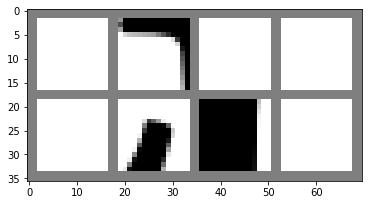


64 AJensonPro-Capt capM


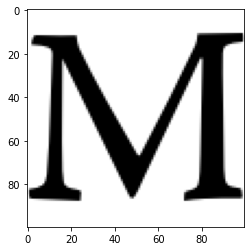


(true_class == predicted_class).item()=True
capM 0.9713956117630005
capM 0.9713956117630005


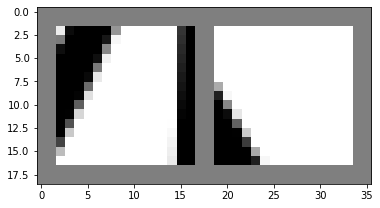


(true_class == predicted_class).item()=True
capM 0.999873161315918
capM 0.999873161315918


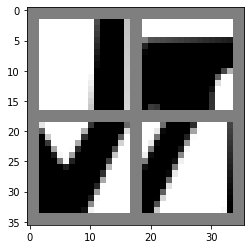


(true_class == predicted_class).item()=True
capM 0.9500804543495178
capM 0.9500804543495178


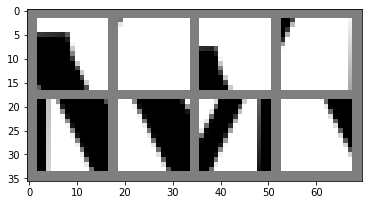


65 AJensonPro-Capt capN


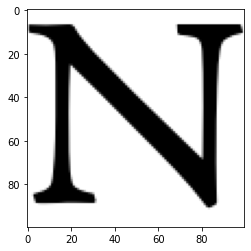


(true_class == predicted_class).item()=True
capN 0.9850668907165527
capN 0.9850668907165527


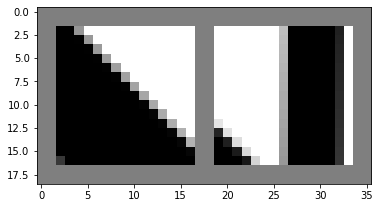


(true_class == predicted_class).item()=True
capN 0.9940551519393921
capN 0.9940551519393921


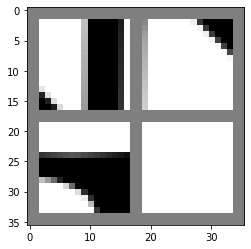


(true_class == predicted_class).item()=True
capN 0.9901504516601562
capN 0.9901504516601562


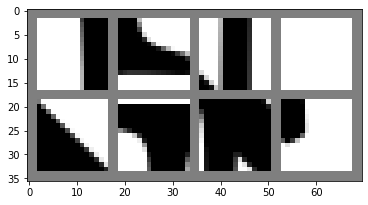


66 AJensonPro-Capt capO


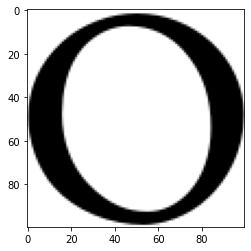


(true_class == predicted_class).item()=True
capO 0.34046822786331177
capO 0.34046822786331177


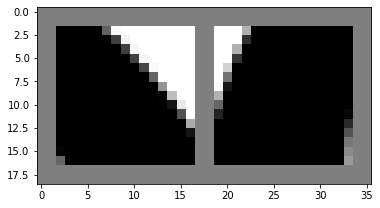


(true_class == predicted_class).item()=True
capO 0.5352419018745422
capO 0.5352419018745422


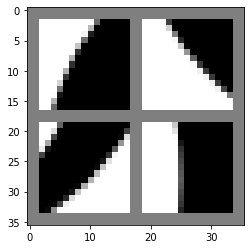


(true_class == predicted_class).item()=True
capO 0.7364459037780762
capO 0.7364459037780762


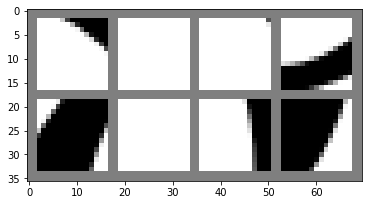


67 AJensonPro-Capt capP


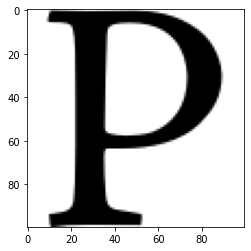


(true_class == predicted_class).item()=True
capP 0.5919520258903503
capP 0.5919520258903503


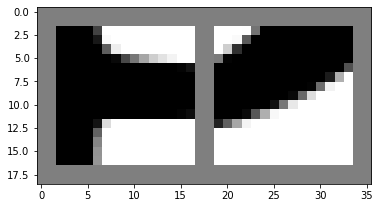


(true_class == predicted_class).item()=True
capP 0.9075883626937866
capP 0.9075883626937866


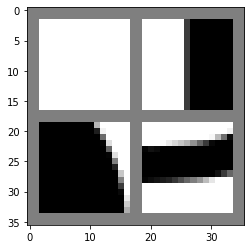


(true_class == predicted_class).item()=True
capP 0.9989821314811707
capP 0.9989821314811707


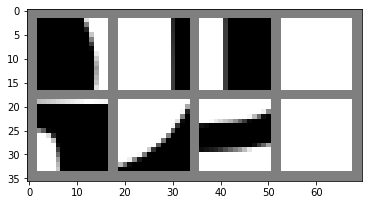


68 AJensonPro-Capt capQ


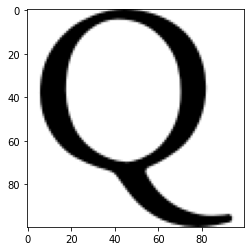


(true_class == predicted_class).item()=True
capQ 0.9866785407066345
capQ 0.9866785407066345


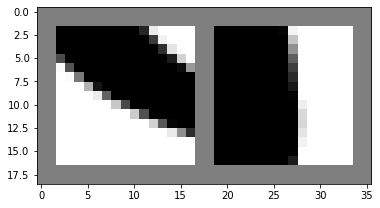


(true_class == predicted_class).item()=True
capQ 0.9970927238464355
capQ 0.9970927238464355


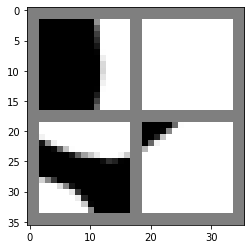


(true_class == predicted_class).item()=True
capQ 0.993196964263916
capQ 0.993196964263916


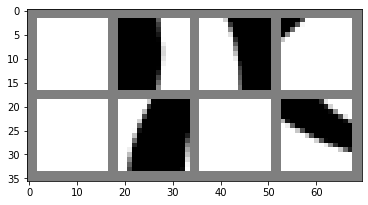


69 AJensonPro-Capt capR


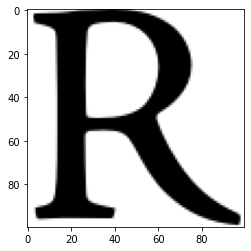


(true_class == predicted_class).item()=False
capR 0.2000095397233963
capB 0.3490467965602875


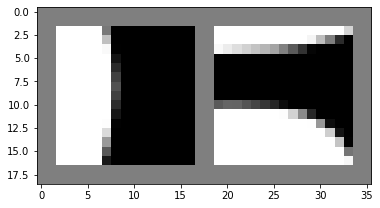


(true_class == predicted_class).item()=True
capR 0.9944597482681274
capR 0.9944597482681274


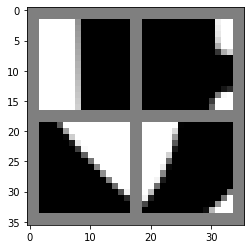


(true_class == predicted_class).item()=True
capR 0.984845757484436
capR 0.984845757484436


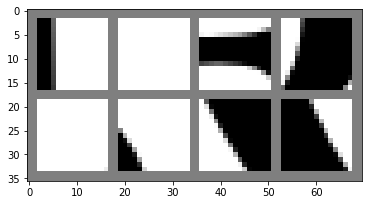


70 AJensonPro-Capt capS


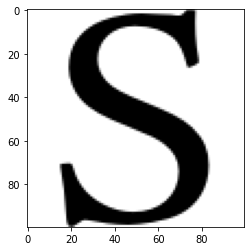


(true_class == predicted_class).item()=True
capS 0.7625327706336975
capS 0.7625327706336975


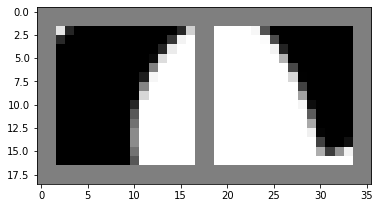


(true_class == predicted_class).item()=True
capS 0.8314921259880066
capS 0.8314921259880066


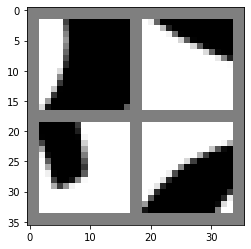


(true_class == predicted_class).item()=True
capS 0.7407910227775574
capS 0.7407910227775574


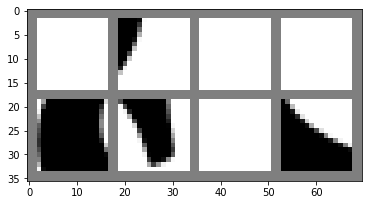


71 AJensonPro-Capt capT


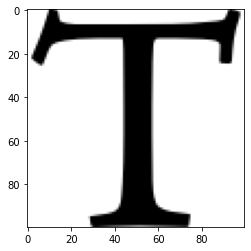


(true_class == predicted_class).item()=False
capT 0.1796351671218872
capF 0.5540891289710999


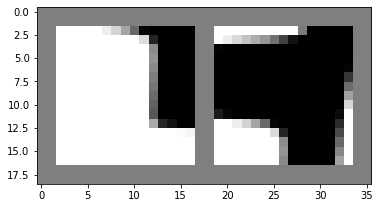


(true_class == predicted_class).item()=True
capT 0.9882413744926453
capT 0.9882413744926453


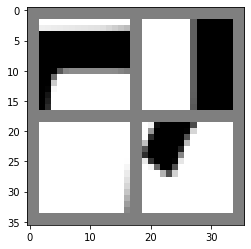


(true_class == predicted_class).item()=True
capT 0.9997592568397522
capT 0.9997592568397522


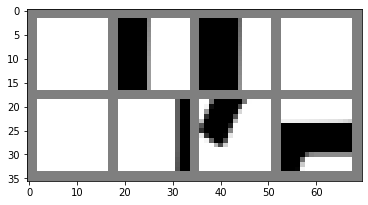


72 AJensonPro-Capt capU


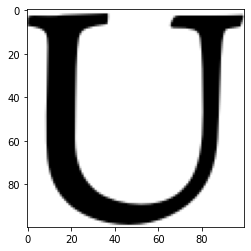


(true_class == predicted_class).item()=True
capU 0.9528864026069641
capU 0.9528864026069641


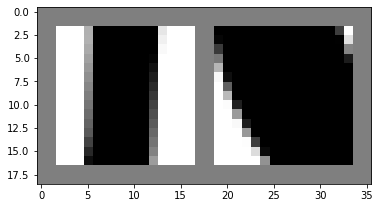


(true_class == predicted_class).item()=True
capU 0.9981671571731567
capU 0.9981671571731567


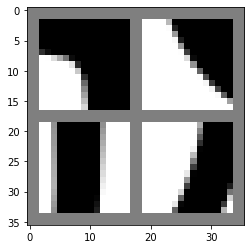


(true_class == predicted_class).item()=True
capU 0.996712327003479
capU 0.996712327003479


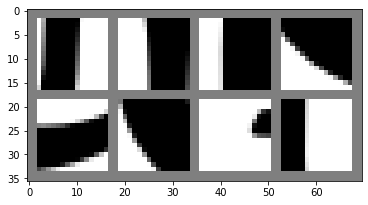


73 AJensonPro-Capt capV


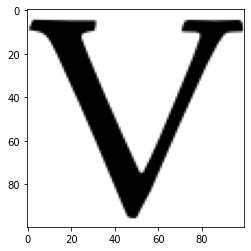


(true_class == predicted_class).item()=False
capV 0.2266356199979782
capW 0.43778496980667114


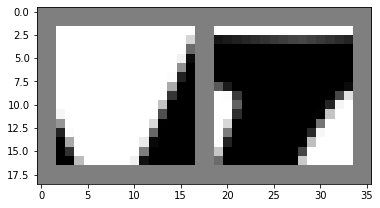


(true_class == predicted_class).item()=True
capV 0.5214870572090149
capV 0.5214870572090149


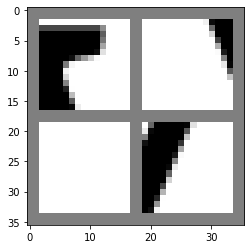


(true_class == predicted_class).item()=True
capV 0.6911134719848633
capV 0.6911134719848633


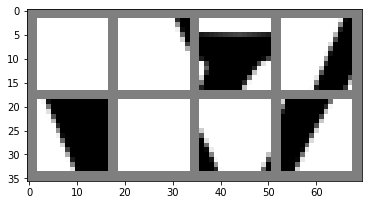


74 AJensonPro-Capt capW


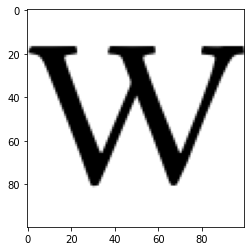


(true_class == predicted_class).item()=True
capW 0.7345792651176453
capW 0.7345792651176453


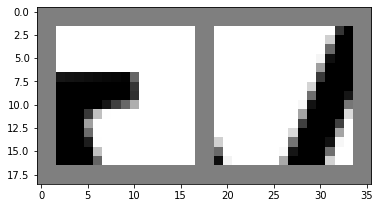


(true_class == predicted_class).item()=True
capW 0.8495005369186401
capW 0.8495005369186401


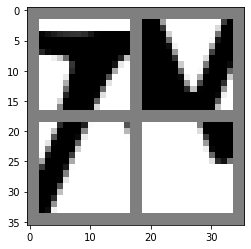


(true_class == predicted_class).item()=True
capW 0.685234010219574
capW 0.685234010219574


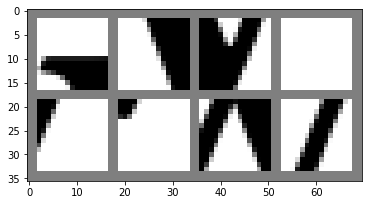


75 AJensonPro-Capt capX


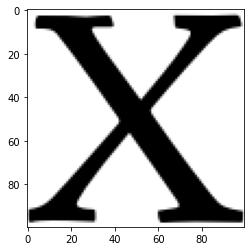


(true_class == predicted_class).item()=True
capX 0.6479228138923645
capX 0.6479228138923645


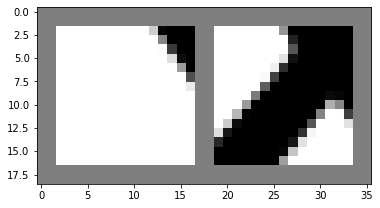


(true_class == predicted_class).item()=True
capX 0.6203092932701111
capX 0.6203092932701111


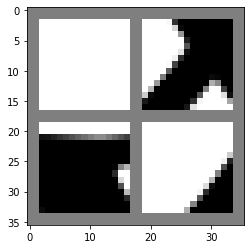


(true_class == predicted_class).item()=True
capX 0.9246819019317627
capX 0.9246819019317627


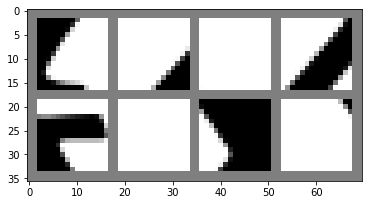


76 AJensonPro-Capt capY


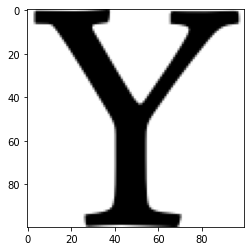


(true_class == predicted_class).item()=True
capY 0.9812018871307373
capY 0.9812018871307373


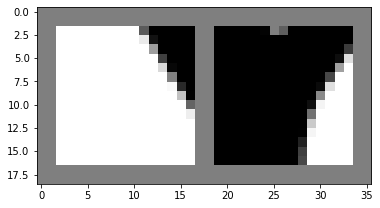


(true_class == predicted_class).item()=True
capY 0.9868943691253662
capY 0.9868943691253662


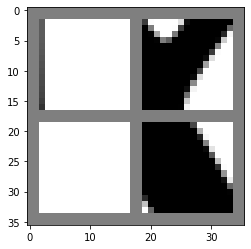


(true_class == predicted_class).item()=True
capY 0.9989662170410156
capY 0.9989662170410156


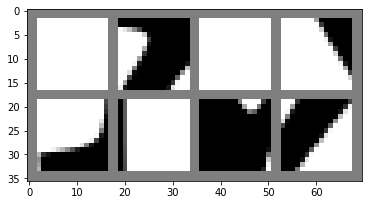


77 AJensonPro-Capt capZ


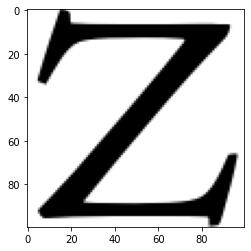


(true_class == predicted_class).item()=True
capZ 0.7719851136207581
capZ 0.7719851136207581


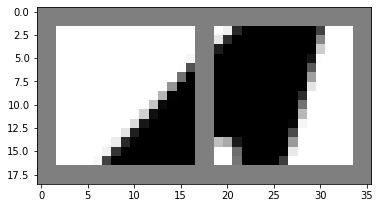


(true_class == predicted_class).item()=True
capZ 0.9643692374229431
capZ 0.9643692374229431


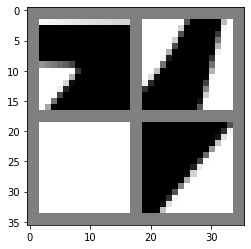


(true_class == predicted_class).item()=True
capZ 0.958330512046814
capZ 0.958330512046814


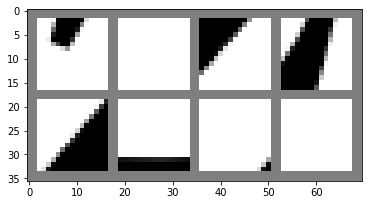


78 AJensonPro-Capt smallA


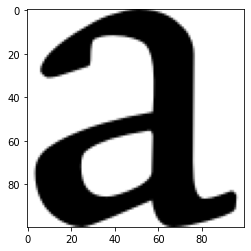


(true_class == predicted_class).item()=True
smallA 0.9866625666618347
smallA 0.9866625666618347


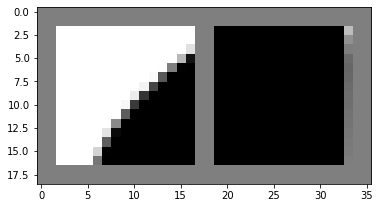


(true_class == predicted_class).item()=True
smallA 0.9973439574241638
smallA 0.9973439574241638


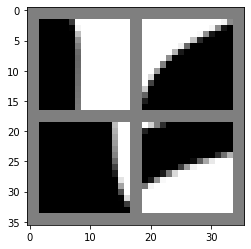


(true_class == predicted_class).item()=True
smallA 0.999974250793457
smallA 0.999974250793457


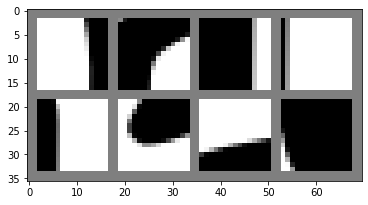


79 AJensonPro-Capt smallB


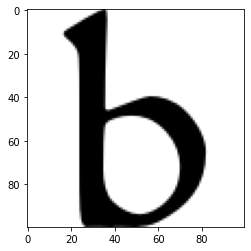


(true_class == predicted_class).item()=True
smallB 0.8575786352157593
smallB 0.8575786352157593


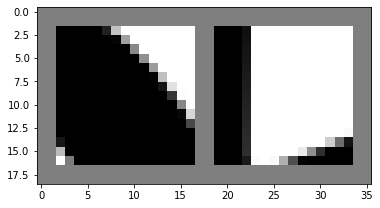


(true_class == predicted_class).item()=True
smallB 0.9722646474838257
smallB 0.9722646474838257


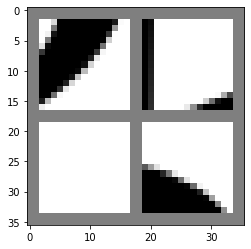


(true_class == predicted_class).item()=True
smallB 0.9848388433456421
smallB 0.9848388433456421


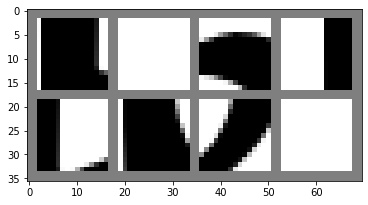


80 AJensonPro-Capt smallC


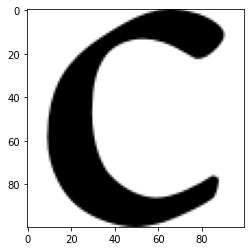


(true_class == predicted_class).item()=True
smallC 0.38144728541374207
smallC 0.38144728541374207


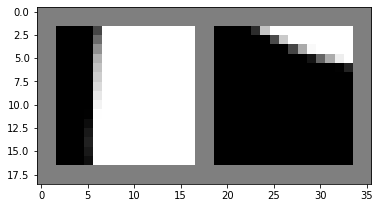


(true_class == predicted_class).item()=True
smallC 0.507712721824646
smallC 0.507712721824646


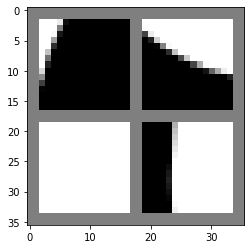


(true_class == predicted_class).item()=True
smallC 0.8330062031745911
smallC 0.8330062031745911


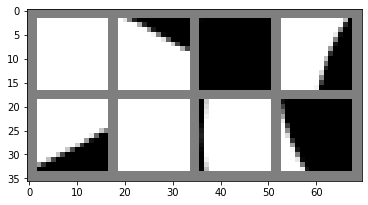


81 AJensonPro-Capt smallD


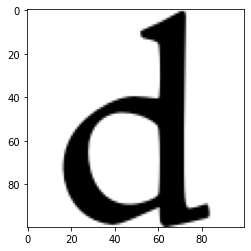


(true_class == predicted_class).item()=True
smallD 0.9366997480392456
smallD 0.9366997480392456


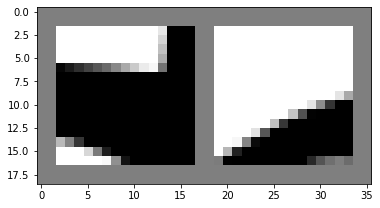


(true_class == predicted_class).item()=True
smallD 0.9078551530838013
smallD 0.9078551530838013


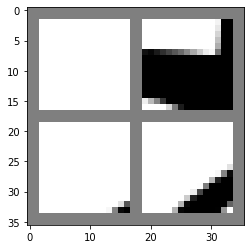


(true_class == predicted_class).item()=True
smallD 0.9989399313926697
smallD 0.9989399313926697


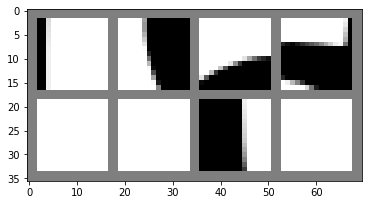


82 AJensonPro-Capt smallE


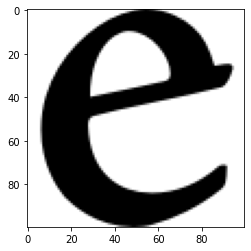


(true_class == predicted_class).item()=True
smallE 0.5810306668281555
smallE 0.5810306668281555


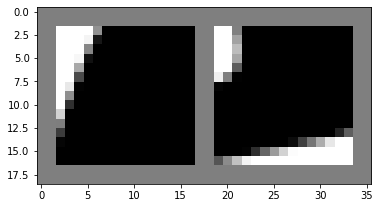


(true_class == predicted_class).item()=True
smallE 0.9998605251312256
smallE 0.9998605251312256


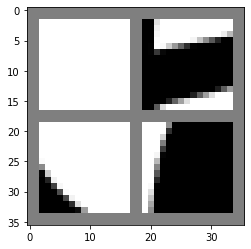


(true_class == predicted_class).item()=True
smallE 0.999975323677063
smallE 0.999975323677063


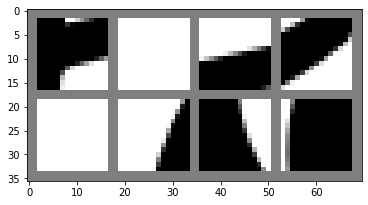


83 AJensonPro-Capt smallF


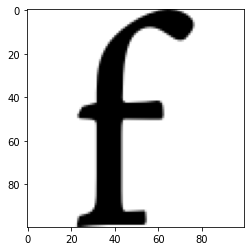


(true_class == predicted_class).item()=True
smallF 0.8954963684082031
smallF 0.8954963684082031


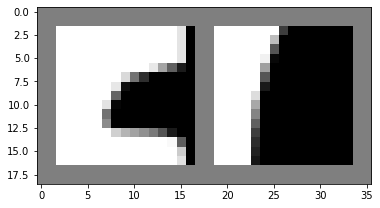


(true_class == predicted_class).item()=True
smallF 0.9924106597900391
smallF 0.9924106597900391


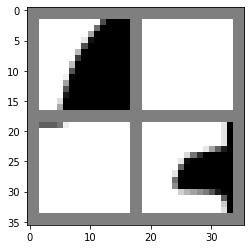


(true_class == predicted_class).item()=True
smallF 0.9998968839645386
smallF 0.9998968839645386


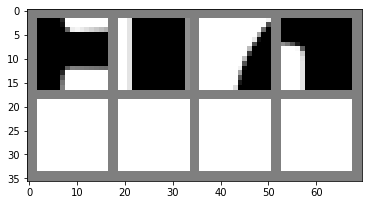


84 AJensonPro-Capt smallG


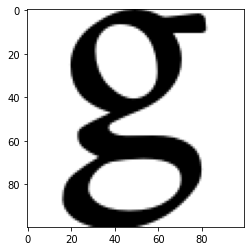


(true_class == predicted_class).item()=True
smallG 0.9974282383918762
smallG 0.9974282383918762


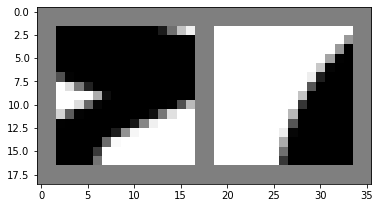


(true_class == predicted_class).item()=True
smallG 0.9980455636978149
smallG 0.9980455636978149


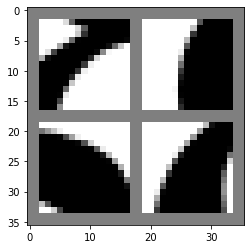


(true_class == predicted_class).item()=True
smallG 0.999943733215332
smallG 0.999943733215332


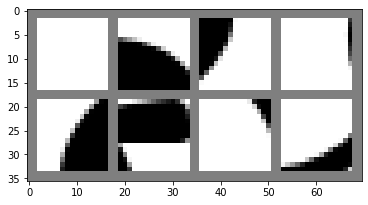


85 AJensonPro-Capt smallH


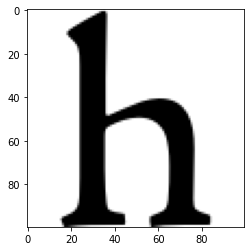


(true_class == predicted_class).item()=True
smallH 0.5340445041656494
smallH 0.5340445041656494


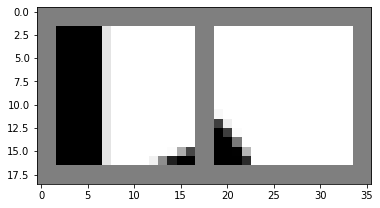


(true_class == predicted_class).item()=True
smallH 0.6929302215576172
smallH 0.6929302215576172


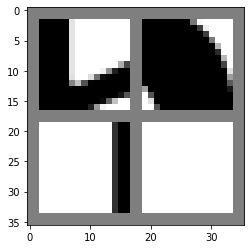


(true_class == predicted_class).item()=True
smallH 0.9135349988937378
smallH 0.9135349988937378


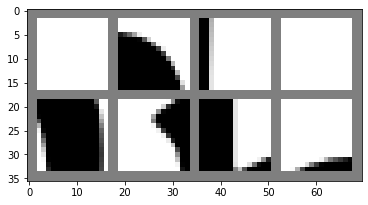


86 AJensonPro-Capt smallI


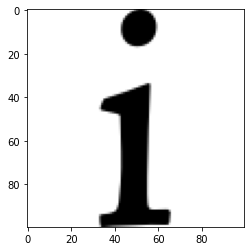


(true_class == predicted_class).item()=True
smallI 0.5447065830230713
smallI 0.5447065830230713


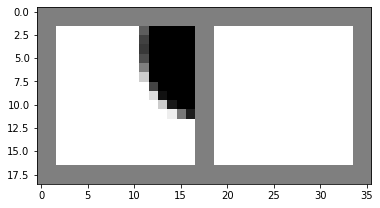


(true_class == predicted_class).item()=True
smallI 0.7349942922592163
smallI 0.7349942922592163


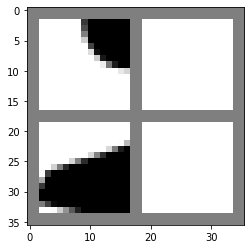


(true_class == predicted_class).item()=True
smallI 0.9405672550201416
smallI 0.9405672550201416


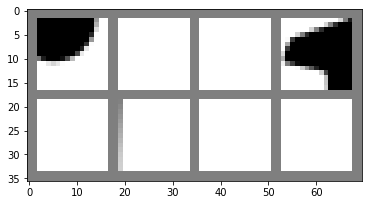


87 AJensonPro-Capt smallJ


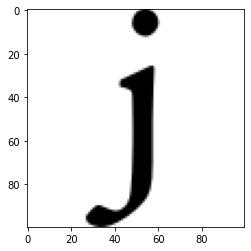


(true_class == predicted_class).item()=True
smallJ 0.7402814626693726
smallJ 0.7402814626693726


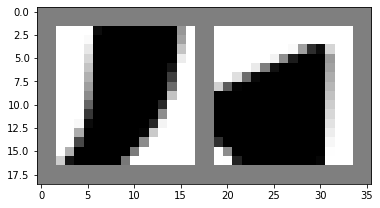


(true_class == predicted_class).item()=True
smallJ 0.995032548904419
smallJ 0.995032548904419


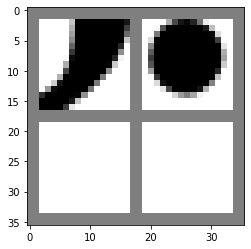


(true_class == predicted_class).item()=True
smallJ 0.9980466365814209
smallJ 0.9980466365814209


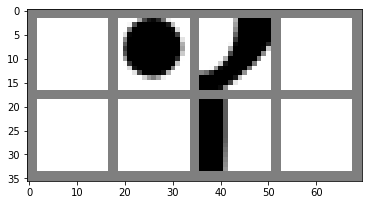


88 AJensonPro-Capt smallK


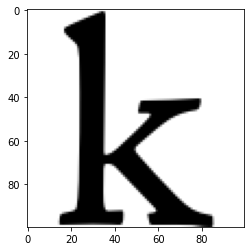


(true_class == predicted_class).item()=True
smallK 0.7414856553077698
smallK 0.7414856553077698


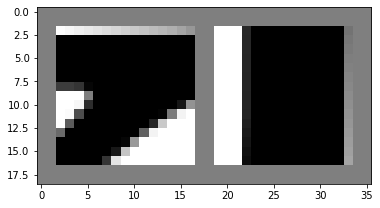


(true_class == predicted_class).item()=True
smallK 0.9918860197067261
smallK 0.9918860197067261


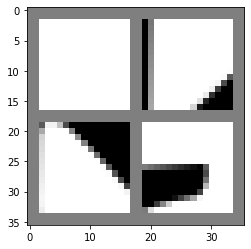


(true_class == predicted_class).item()=True
smallK 0.9999446868896484
smallK 0.9999446868896484


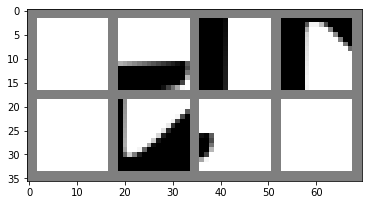


89 AJensonPro-Capt smallL


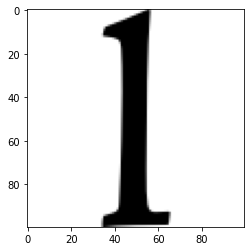


(true_class == predicted_class).item()=True
smallL 0.2028275430202484
smallL 0.2028275430202484


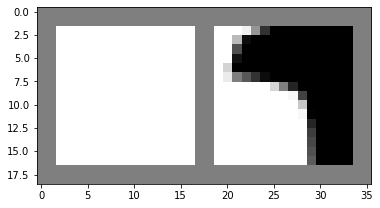


(true_class == predicted_class).item()=True
smallL 0.35016947984695435
smallL 0.35016947984695435


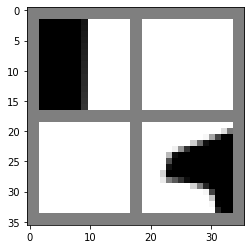


(true_class == predicted_class).item()=True
smallL 0.6561450362205505
smallL 0.6561450362205505


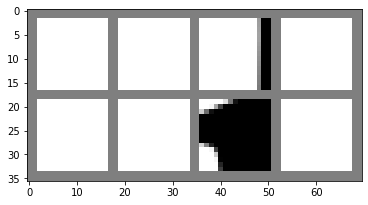


90 AJensonPro-Capt smallM


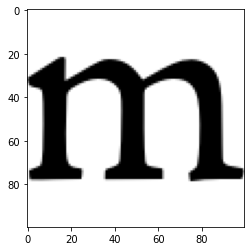


(true_class == predicted_class).item()=True
smallM 0.9752117991447449
smallM 0.9752117991447449


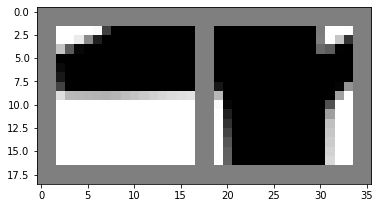


(true_class == predicted_class).item()=True
smallM 0.998305082321167
smallM 0.998305082321167


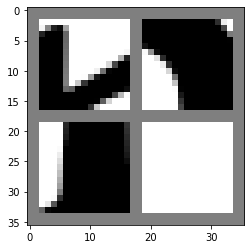


(true_class == predicted_class).item()=True
smallM 0.9999525547027588
smallM 0.9999525547027588


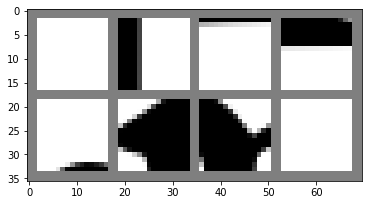


91 AJensonPro-Capt smallN


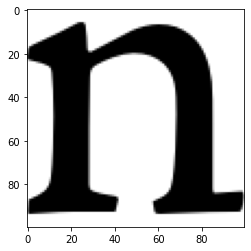


(true_class == predicted_class).item()=True
smallN 0.6830611824989319
smallN 0.6830611824989319


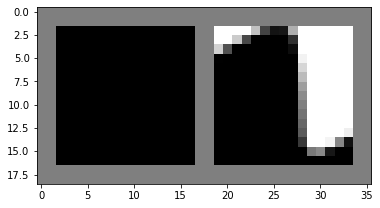


(true_class == predicted_class).item()=True
smallN 0.9696202874183655
smallN 0.9696202874183655


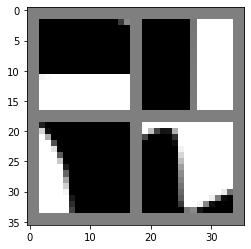


(true_class == predicted_class).item()=True
smallN 0.9890037178993225
smallN 0.9890037178993225


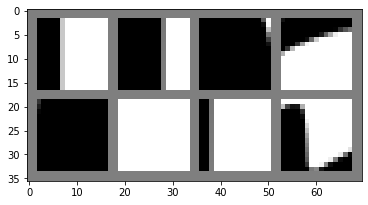


92 AJensonPro-Capt smallO


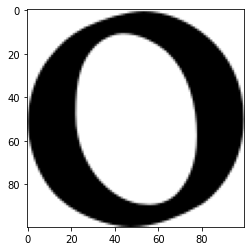


(true_class == predicted_class).item()=False
smallO 0.40071678161621094
capO 0.41746488213539124


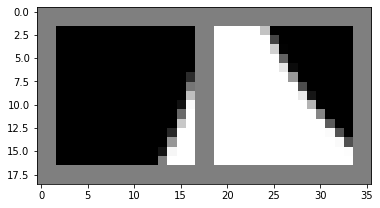


(true_class == predicted_class).item()=False
smallO 0.4453687071800232
capO 0.5072324275970459


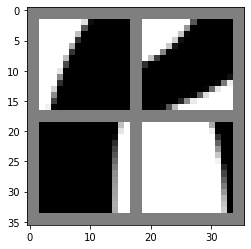


(true_class == predicted_class).item()=True
smallO 0.7008712291717529
smallO 0.7008712291717529


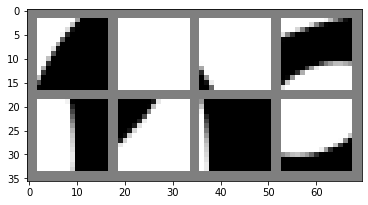


93 AJensonPro-Capt smallP


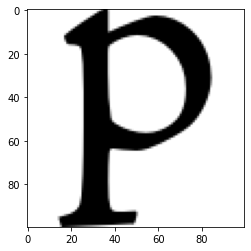


(true_class == predicted_class).item()=True
smallP 0.8148135542869568
smallP 0.8148135542869568


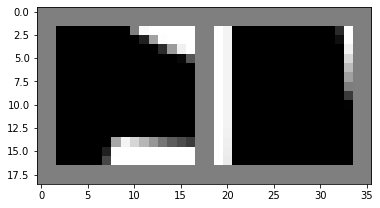


(true_class == predicted_class).item()=True
smallP 0.9903424978256226
smallP 0.9903424978256226


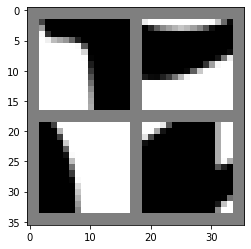


(true_class == predicted_class).item()=True
smallP 0.9989182949066162
smallP 0.9989182949066162


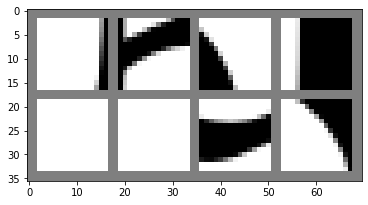


94 AJensonPro-Capt smallQ


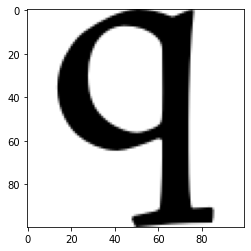


(true_class == predicted_class).item()=True
smallQ 0.8222306370735168
smallQ 0.8222306370735168


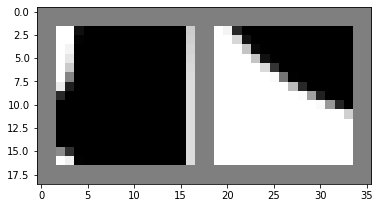


(true_class == predicted_class).item()=True
smallQ 0.9557614326477051
smallQ 0.9557614326477051


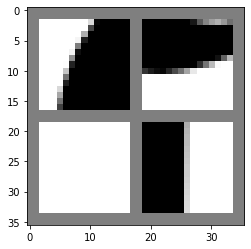


(true_class == predicted_class).item()=True
smallQ 0.9966747760772705
smallQ 0.9966747760772705


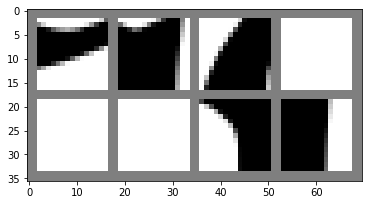


95 AJensonPro-Capt smallR


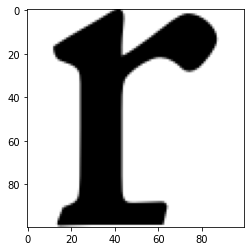


(true_class == predicted_class).item()=False
smallR 0.11322514712810516
smallM 0.23633450269699097


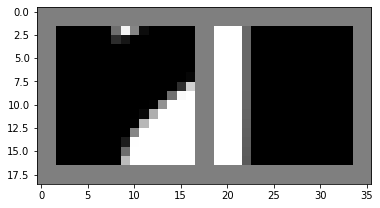


(true_class == predicted_class).item()=True
smallR 0.9943528175354004
smallR 0.9943528175354004


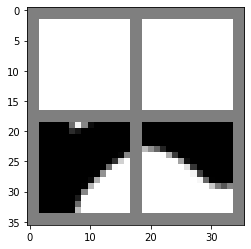


(true_class == predicted_class).item()=True
smallR 0.9992958307266235
smallR 0.9992958307266235


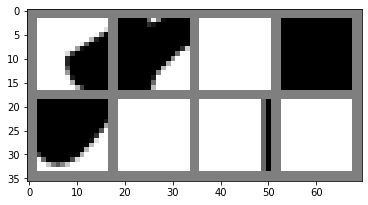


96 AJensonPro-Capt smallS


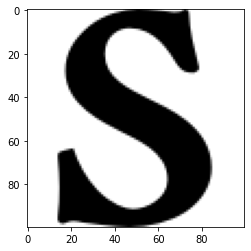


(true_class == predicted_class).item()=False
smallS 0.45562422275543213
capS 0.48402202129364014


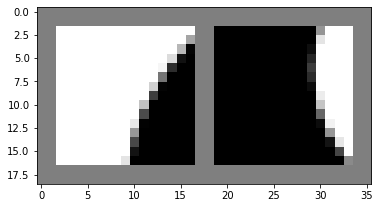


(true_class == predicted_class).item()=False
smallS 0.3797976076602936
capS 0.6194000244140625


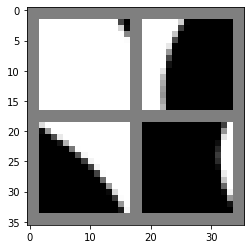


(true_class == predicted_class).item()=True
smallS 0.5335261821746826
smallS 0.5335261821746826


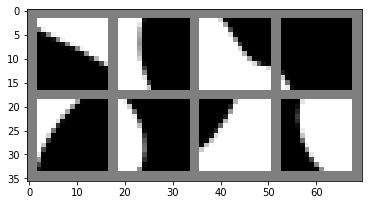


97 AJensonPro-Capt smallT


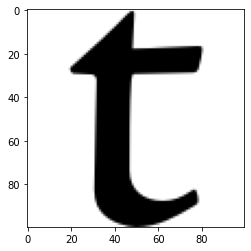


(true_class == predicted_class).item()=True
smallT 0.9487853646278381
smallT 0.9487853646278381


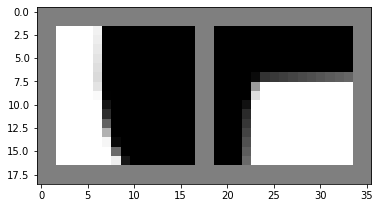


(true_class == predicted_class).item()=True
smallT 0.9830515384674072
smallT 0.9830515384674072


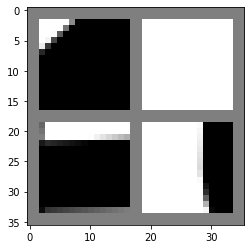


(true_class == predicted_class).item()=True
smallT 0.9998589754104614
smallT 0.9998589754104614


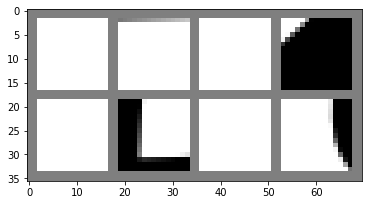


98 AJensonPro-Capt smallU


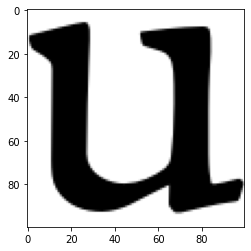


(true_class == predicted_class).item()=True
smallU 0.9823087453842163
smallU 0.9823087453842163


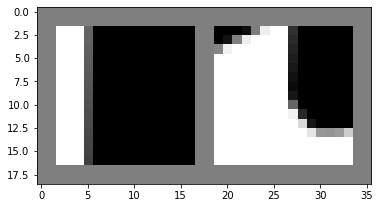


(true_class == predicted_class).item()=True
smallU 0.9484400749206543
smallU 0.9484400749206543


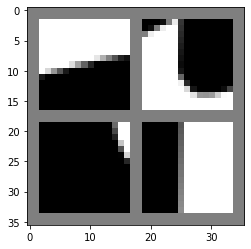


(true_class == predicted_class).item()=True
smallU 0.9985059499740601
smallU 0.9985059499740601


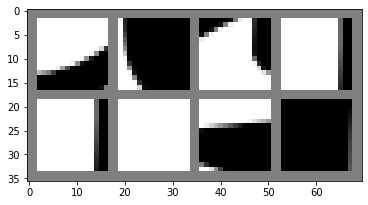


99 AJensonPro-Capt smallV


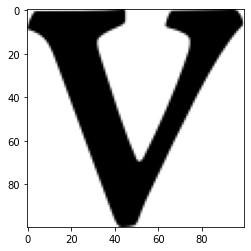


(true_class == predicted_class).item()=True
smallV 0.43676066398620605
smallV 0.43676066398620605


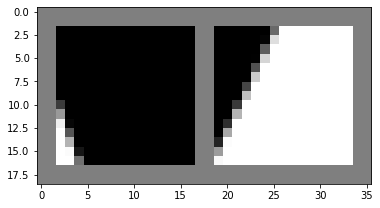


(true_class == predicted_class).item()=False
smallV 0.442171186208725
capV 0.5195155143737793


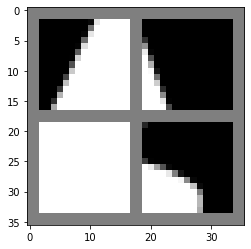


(true_class == predicted_class).item()=True
smallV 0.6096224784851074
smallV 0.6096224784851074


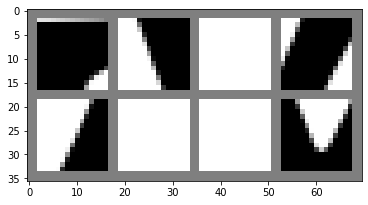


100 AJensonPro-Capt smallW


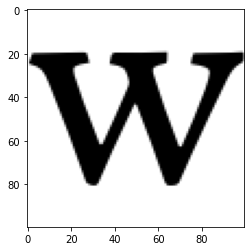


(true_class == predicted_class).item()=True
smallW 0.7143387794494629
smallW 0.7143387794494629


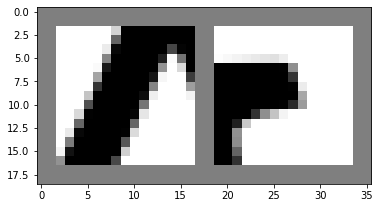


(true_class == predicted_class).item()=True
smallW 0.5959751009941101
smallW 0.5959751009941101


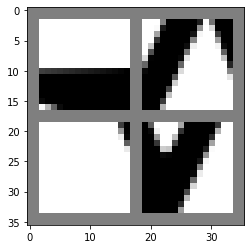


(true_class == predicted_class).item()=False
smallW 0.46088486909866333
capW 0.5390150547027588


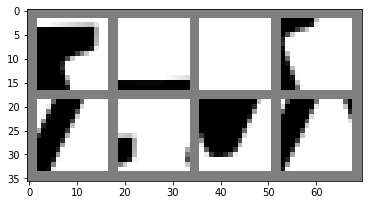


101 AJensonPro-Capt smallX


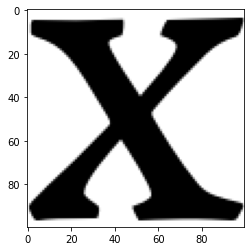


(true_class == predicted_class).item()=False
smallX 0.4762694835662842
capX 0.486759215593338


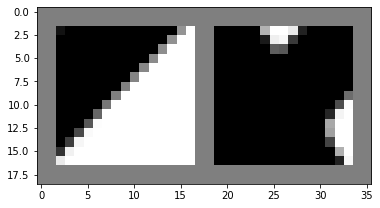


(true_class == predicted_class).item()=True
smallX 0.5444044470787048
smallX 0.5444044470787048


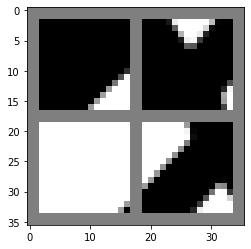


(true_class == predicted_class).item()=False
smallX 0.43441689014434814
capX 0.5615754723548889


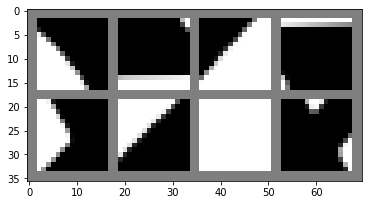


102 AJensonPro-Capt smallY


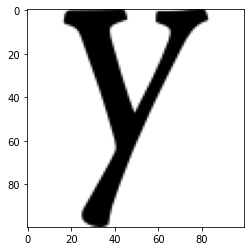


(true_class == predicted_class).item()=True
smallY 0.9884114861488342
smallY 0.9884114861488342


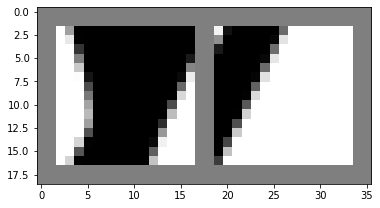


(true_class == predicted_class).item()=True
smallY 0.9991556406021118
smallY 0.9991556406021118


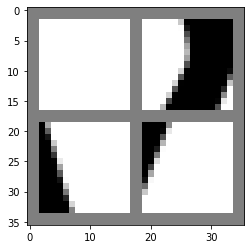


(true_class == predicted_class).item()=True
smallY 0.9999947547912598
smallY 0.9999947547912598


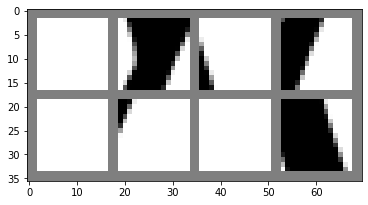


103 AJensonPro-Capt smallZ


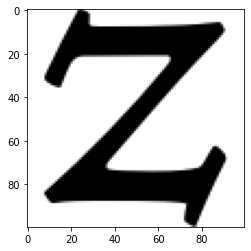


(true_class == predicted_class).item()=True
smallZ 0.628345251083374
smallZ 0.628345251083374


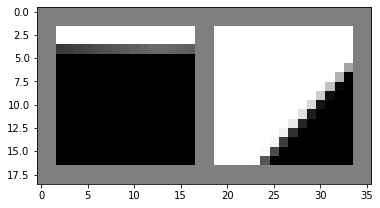


(true_class == predicted_class).item()=True
smallZ 0.6758711934089661
smallZ 0.6758711934089661


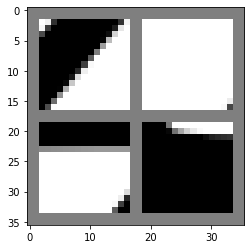


(true_class == predicted_class).item()=True
smallZ 0.5924260020256042
smallZ 0.5924260020256042


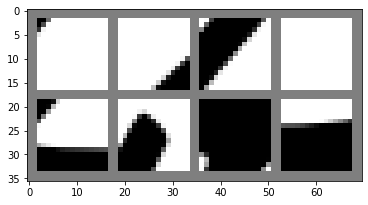


104 AJensonPro-Disp capA


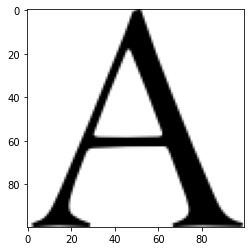


(true_class == predicted_class).item()=True
capA 0.9969717264175415
capA 0.9969717264175415


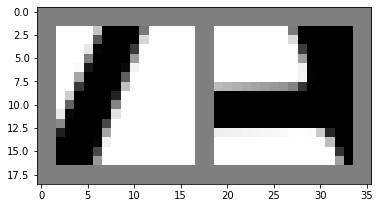


(true_class == predicted_class).item()=True
capA 0.9977206587791443
capA 0.9977206587791443


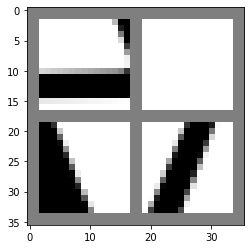


(true_class == predicted_class).item()=True
capA 0.9958775043487549
capA 0.9958775043487549


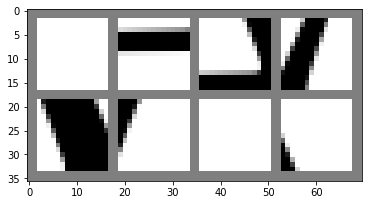


105 AJensonPro-Disp capB


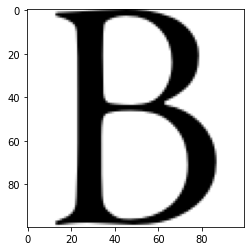


(true_class == predicted_class).item()=True
capB 0.5814569592475891
capB 0.5814569592475891


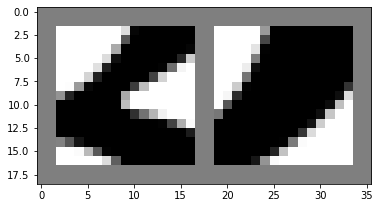


(true_class == predicted_class).item()=True
capB 0.9247933626174927
capB 0.9247933626174927


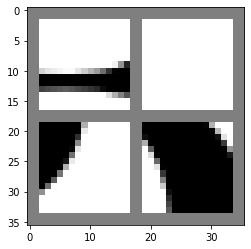


(true_class == predicted_class).item()=True
capB 0.9771687984466553
capB 0.9771687984466553


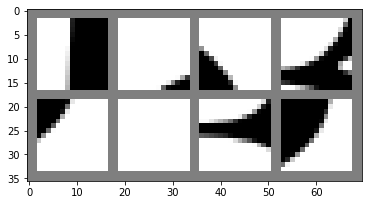


106 AJensonPro-Disp capC


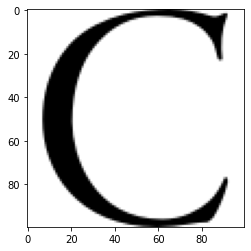


(true_class == predicted_class).item()=True
capC 0.6238150000572205
capC 0.6238150000572205


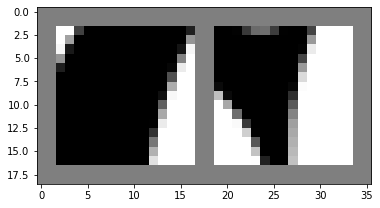


(true_class == predicted_class).item()=True
capC 0.7818465828895569
capC 0.7818465828895569


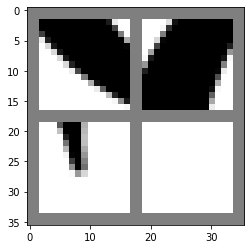


(true_class == predicted_class).item()=True
capC 0.8558369278907776
capC 0.8558369278907776


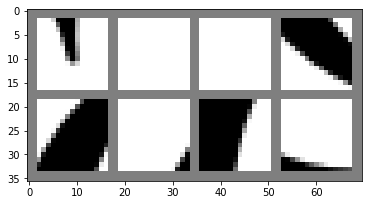


107 AJensonPro-Disp capD


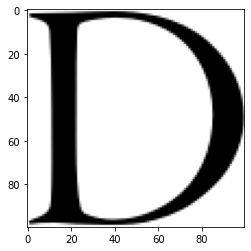


(true_class == predicted_class).item()=True
capD 0.5541713833808899
capD 0.5541713833808899


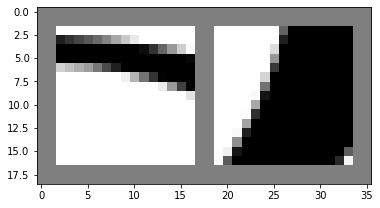


(true_class == predicted_class).item()=True
capD 0.917309045791626
capD 0.917309045791626


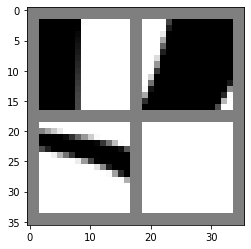


(true_class == predicted_class).item()=True
capD 0.9987540245056152
capD 0.9987540245056152


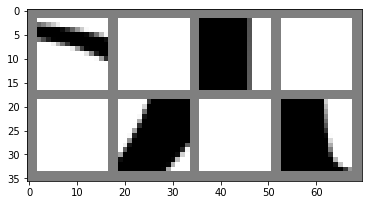


108 AJensonPro-Disp capE


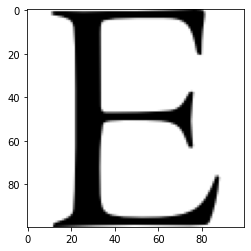


(true_class == predicted_class).item()=True
capE 0.8358926177024841
capE 0.8358926177024841


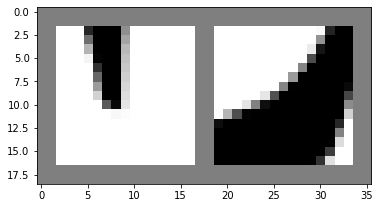


(true_class == predicted_class).item()=True
capE 0.9772834181785583
capE 0.9772834181785583


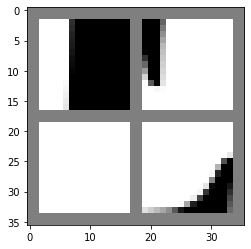


(true_class == predicted_class).item()=True
capE 0.9691250920295715
capE 0.9691250920295715


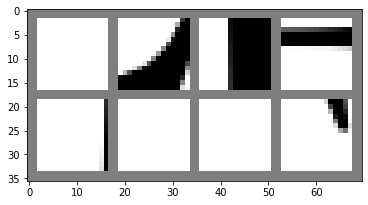


109 AJensonPro-Disp capF


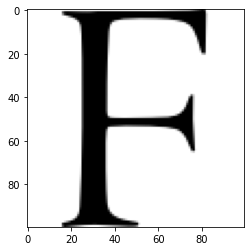


(true_class == predicted_class).item()=True
capF 0.5502263307571411
capF 0.5502263307571411


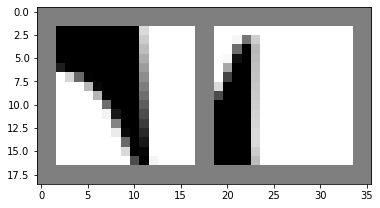


(true_class == predicted_class).item()=True
capF 0.597568154335022
capF 0.597568154335022


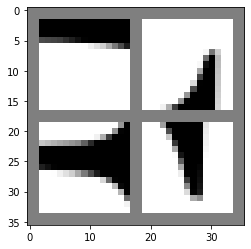


(true_class == predicted_class).item()=True
capF 0.5809486508369446
capF 0.5809486508369446


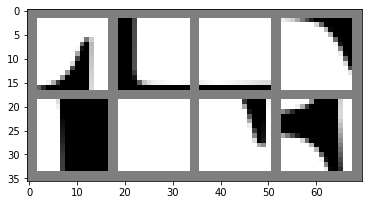


110 AJensonPro-Disp capG


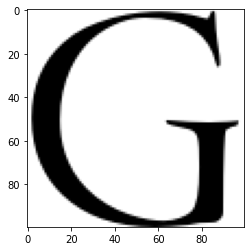


(true_class == predicted_class).item()=True
capG 0.5146802663803101
capG 0.5146802663803101


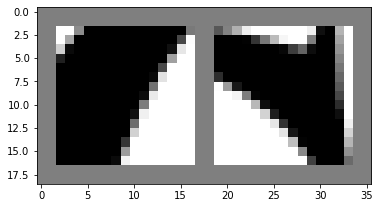


(true_class == predicted_class).item()=True
capG 0.9398441314697266
capG 0.9398441314697266


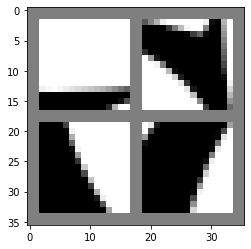


(true_class == predicted_class).item()=True
capG 0.8923083543777466
capG 0.8923083543777466


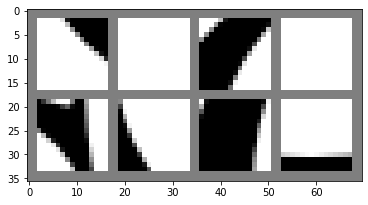


111 AJensonPro-Disp capH


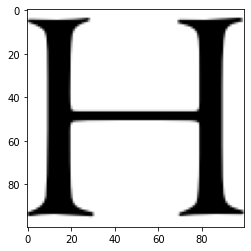


(true_class == predicted_class).item()=True
capH 0.7163806557655334
capH 0.7163806557655334


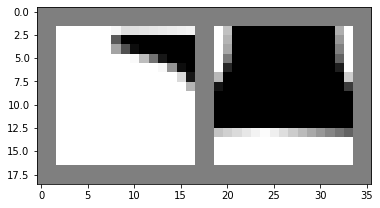


(true_class == predicted_class).item()=True
capH 0.9764091372489929
capH 0.9764091372489929


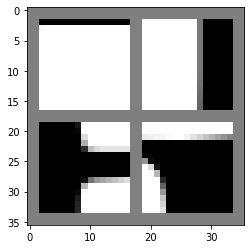


(true_class == predicted_class).item()=True
capH 0.9955215454101562
capH 0.9955215454101562


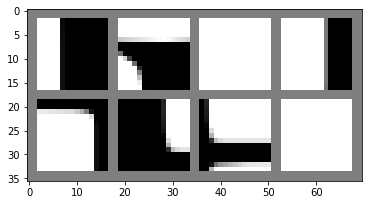


112 AJensonPro-Disp capI


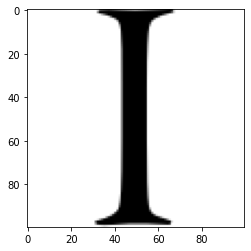


(true_class == predicted_class).item()=False
capI 0.13875694572925568
capU 0.1907779723405838


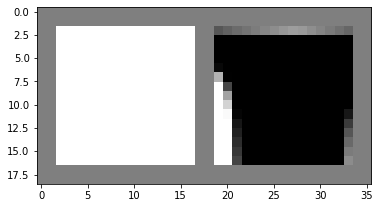


(true_class == predicted_class).item()=True
capI 0.3282923102378845
capI 0.3282923102378845


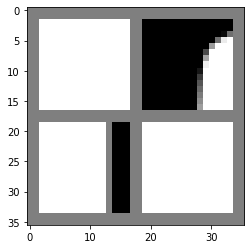


(true_class == predicted_class).item()=True
capI 0.8295764923095703
capI 0.8295764923095703


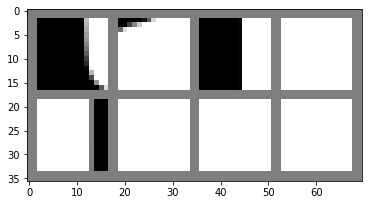


113 AJensonPro-Disp capJ


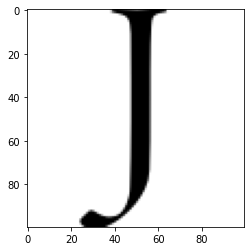


(true_class == predicted_class).item()=False
capJ 0.3198862373828888
smallJ 0.3754729926586151


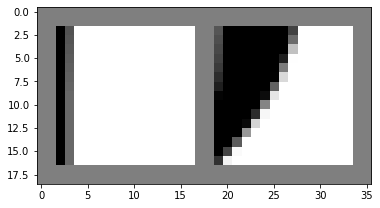


(true_class == predicted_class).item()=False
capJ 0.39491963386535645
smallJ 0.5916889309883118


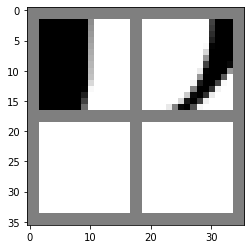


(true_class == predicted_class).item()=True
capJ 0.7030200958251953
capJ 0.7030200958251953


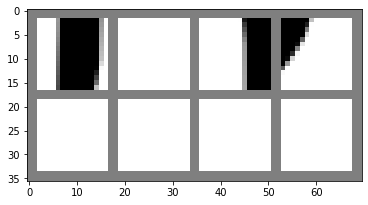


114 AJensonPro-Disp capK


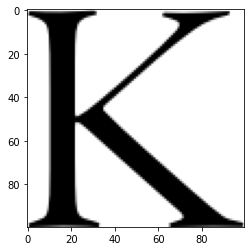


(true_class == predicted_class).item()=True
capK 0.6177206635475159
capK 0.6177206635475159


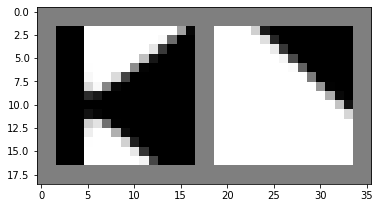


(true_class == predicted_class).item()=True
capK 0.8802553415298462
capK 0.8802553415298462


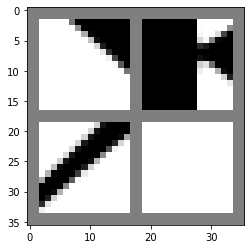


(true_class == predicted_class).item()=True
capK 0.9524537920951843
capK 0.9524537920951843


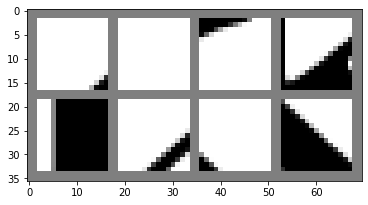


115 AJensonPro-Disp capL


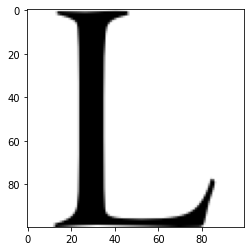


(true_class == predicted_class).item()=False
capL 0.19401706755161285
capE 0.5490983128547668


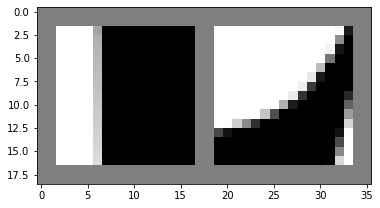


(true_class == predicted_class).item()=True
capL 0.5698383450508118
capL 0.5698383450508118


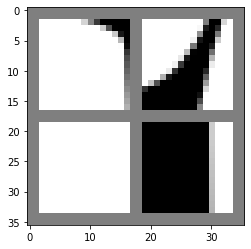


(true_class == predicted_class).item()=True
capL 0.9473357796669006
capL 0.9473357796669006


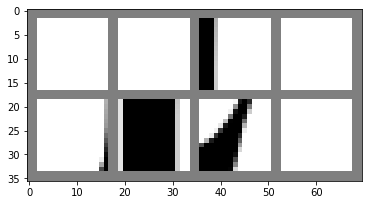


116 AJensonPro-Disp capM


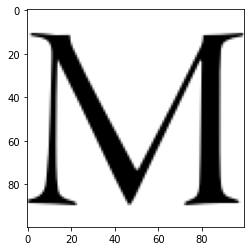


(true_class == predicted_class).item()=True
capM 0.9958387613296509
capM 0.9958387613296509


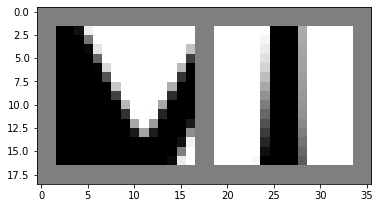


(true_class == predicted_class).item()=True
capM 0.9877415895462036
capM 0.9877415895462036


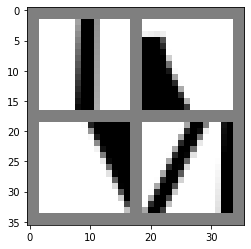


(true_class == predicted_class).item()=True
capM 0.9902724623680115
capM 0.9902724623680115


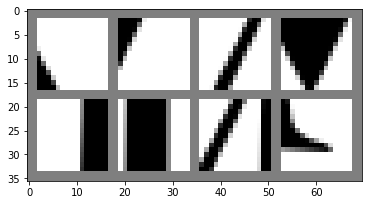


117 AJensonPro-Disp capN


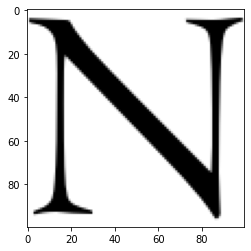


(true_class == predicted_class).item()=True
capN 0.9864174127578735
capN 0.9864174127578735


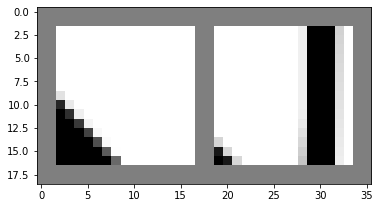


(true_class == predicted_class).item()=True
capN 0.9935694932937622
capN 0.9935694932937622


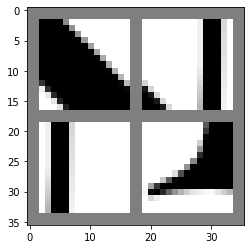


(true_class == predicted_class).item()=True
capN 0.9987049102783203
capN 0.9987049102783203


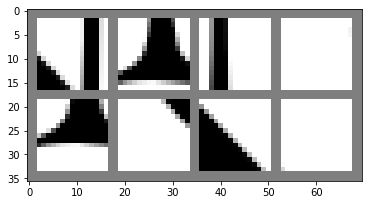


118 AJensonPro-Disp capO


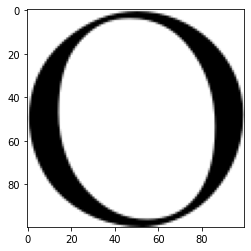


(true_class == predicted_class).item()=True
capO 0.4670164883136749
capO 0.4670164883136749


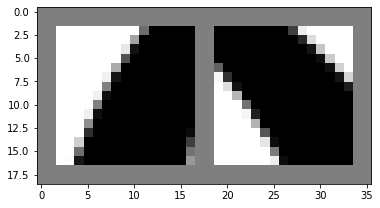


(true_class == predicted_class).item()=True
capO 0.6921550035476685
capO 0.6921550035476685


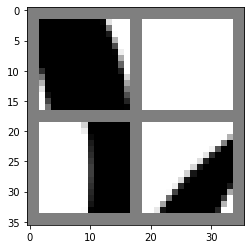


(true_class == predicted_class).item()=True
capO 0.8837089538574219
capO 0.8837089538574219


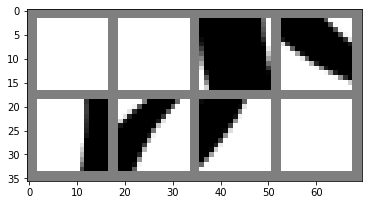


119 AJensonPro-Disp capP


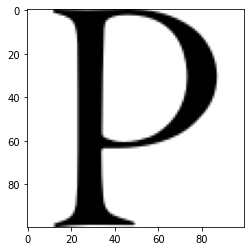


(true_class == predicted_class).item()=True
capP 0.4566856324672699
capP 0.4566856324672699


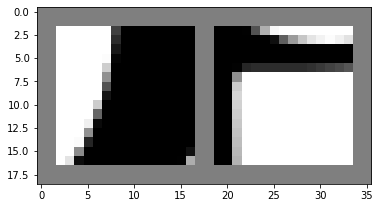


(true_class == predicted_class).item()=True
capP 0.6613067984580994
capP 0.6613067984580994


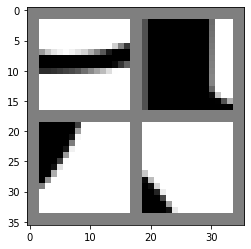


(true_class == predicted_class).item()=True
capP 0.9618110060691833
capP 0.9618110060691833


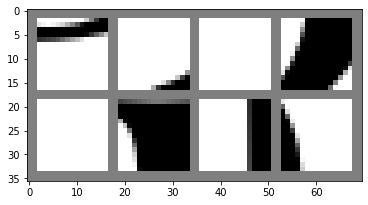


120 AJensonPro-Disp capQ


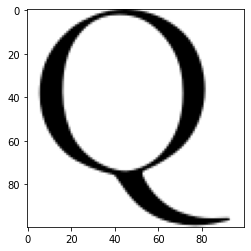


(true_class == predicted_class).item()=True
capQ 0.8558275699615479
capQ 0.8558275699615479


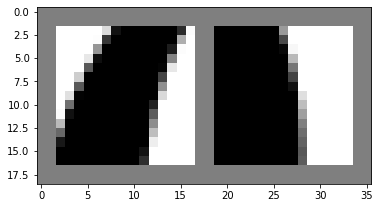


(true_class == predicted_class).item()=True
capQ 0.9930127263069153
capQ 0.9930127263069153


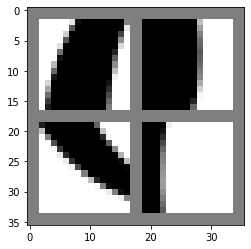


(true_class == predicted_class).item()=True
capQ 0.996864378452301
capQ 0.996864378452301


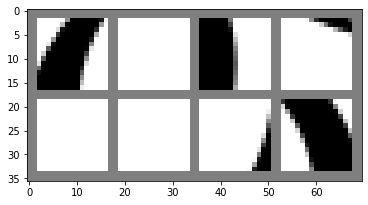


121 AJensonPro-Disp capR


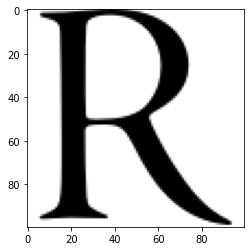


(true_class == predicted_class).item()=False
capR 0.1393059492111206
capB 0.8099436163902283


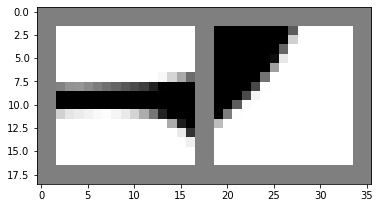


(true_class == predicted_class).item()=True
capR 0.9781028628349304
capR 0.9781028628349304


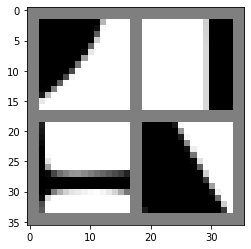


(true_class == predicted_class).item()=True
capR 0.9893933534622192
capR 0.9893933534622192


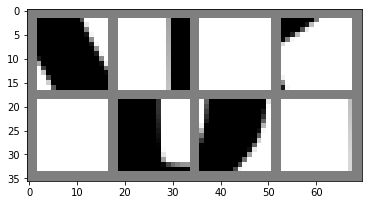


122 AJensonPro-Disp capS


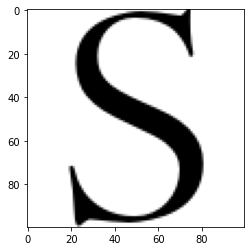


(true_class == predicted_class).item()=True
capS 0.7679556012153625
capS 0.7679556012153625


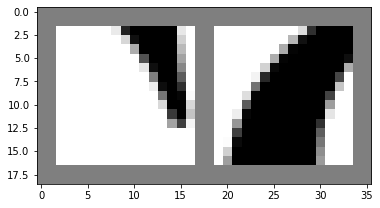


(true_class == predicted_class).item()=True
capS 0.7015374302864075
capS 0.7015374302864075


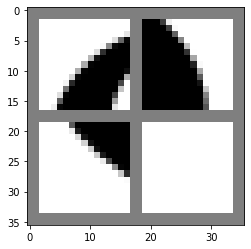


(true_class == predicted_class).item()=True
capS 0.8924400210380554
capS 0.8924400210380554


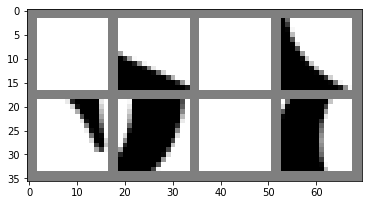


123 AJensonPro-Disp capT


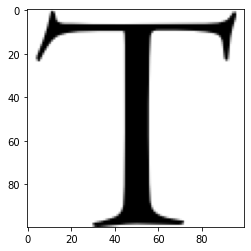


(true_class == predicted_class).item()=False
capT 0.19873762130737305
capF 0.4624820053577423


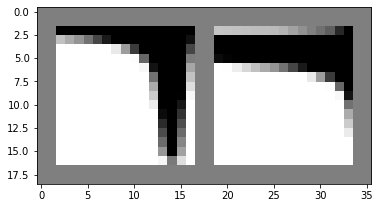


(true_class == predicted_class).item()=False
capT 0.08280826359987259
capF 0.5914770364761353


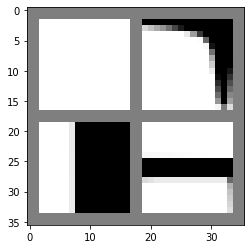


(true_class == predicted_class).item()=True
capT 0.6577799916267395
capT 0.6577799916267395


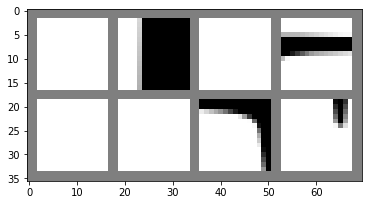


124 AJensonPro-Disp capU


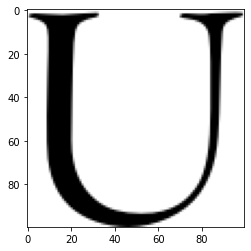


(true_class == predicted_class).item()=True
capU 0.9599769711494446
capU 0.9599769711494446


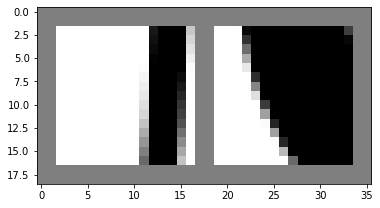


(true_class == predicted_class).item()=True
capU 0.991955578327179
capU 0.991955578327179


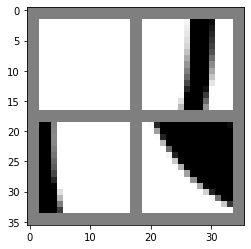


(true_class == predicted_class).item()=True
capU 0.9997320771217346
capU 0.9997320771217346


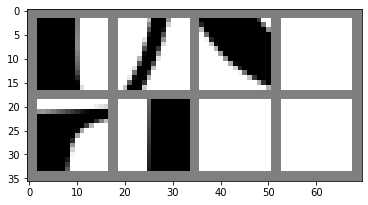


125 AJensonPro-Disp capV


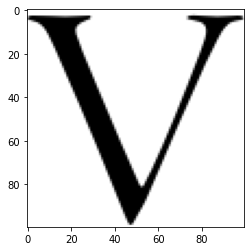


(true_class == predicted_class).item()=False
capV 0.21743667125701904
capW 0.5476192831993103


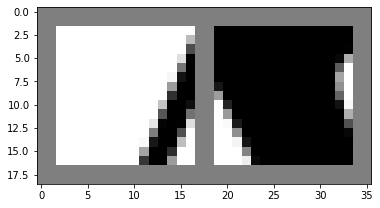


(true_class == predicted_class).item()=False
capV 0.33222338557243347
capW 0.4717457890510559


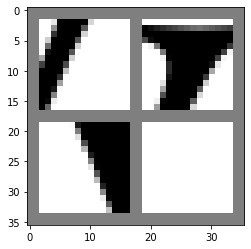


(true_class == predicted_class).item()=True
capV 0.5725984573364258
capV 0.5725984573364258


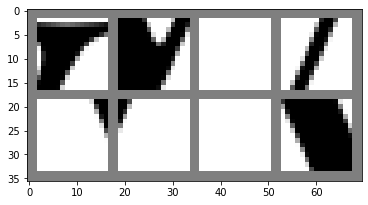


126 AJensonPro-Disp capW


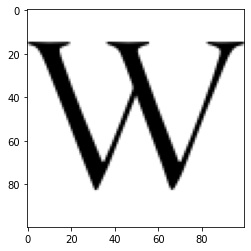


(true_class == predicted_class).item()=True
capW 0.9008663296699524
capW 0.9008663296699524


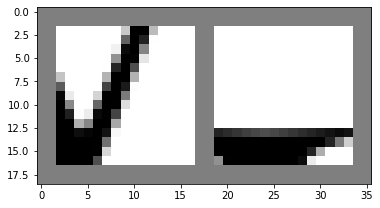


(true_class == predicted_class).item()=True
capW 0.8592194318771362
capW 0.8592194318771362


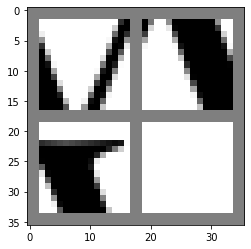


(true_class == predicted_class).item()=True
capW 0.7818668484687805
capW 0.7818668484687805


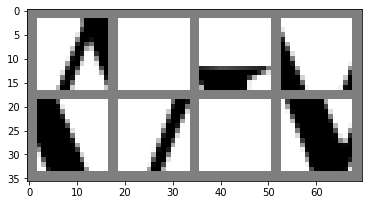


127 AJensonPro-Disp capX


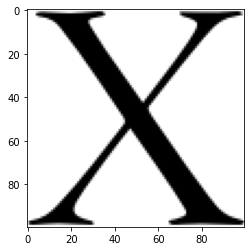


(true_class == predicted_class).item()=True
capX 0.6225718855857849
capX 0.6225718855857849


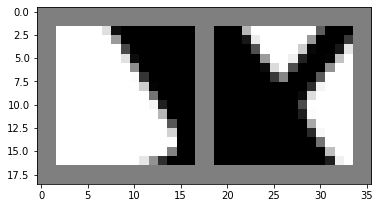


(true_class == predicted_class).item()=True
capX 0.8347612619400024
capX 0.8347612619400024


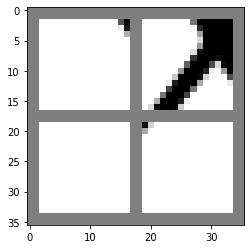


(true_class == predicted_class).item()=True
capX 0.7866866588592529
capX 0.7866866588592529


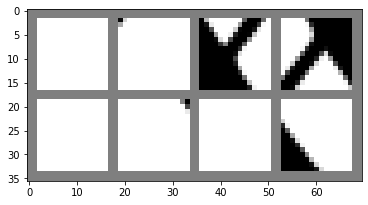


128 AJensonPro-Disp capY


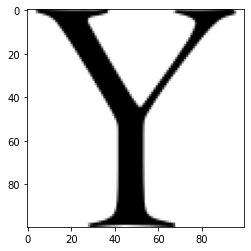


(true_class == predicted_class).item()=True
capY 0.9182828068733215
capY 0.9182828068733215


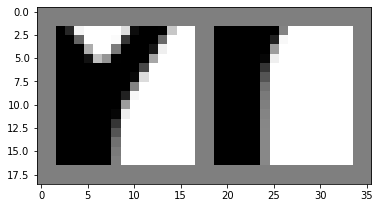


(true_class == predicted_class).item()=True
capY 0.9918278455734253
capY 0.9918278455734253


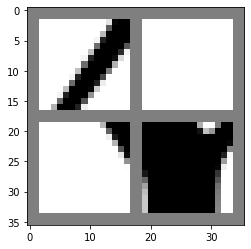


(true_class == predicted_class).item()=True
capY 0.9990074038505554
capY 0.9990074038505554


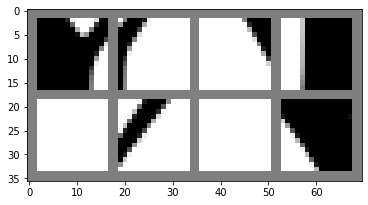


129 AJensonPro-Disp capZ


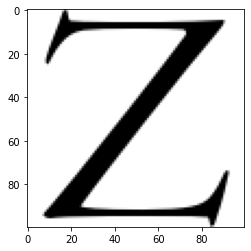


(true_class == predicted_class).item()=True
capZ 0.6795153617858887
capZ 0.6795153617858887


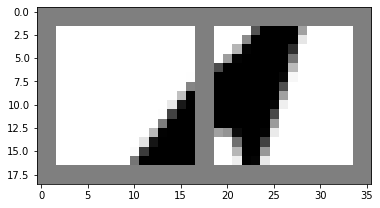


(true_class == predicted_class).item()=True
capZ 0.6620837450027466
capZ 0.6620837450027466


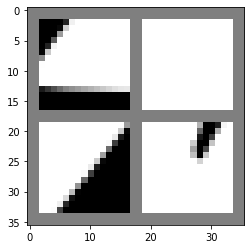


(true_class == predicted_class).item()=True
capZ 0.9812785387039185
capZ 0.9812785387039185


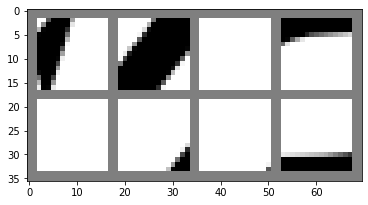


130 AJensonPro-Disp smallA


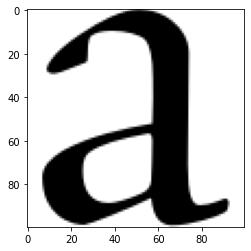


(true_class == predicted_class).item()=True
smallA 0.9788712859153748
smallA 0.9788712859153748


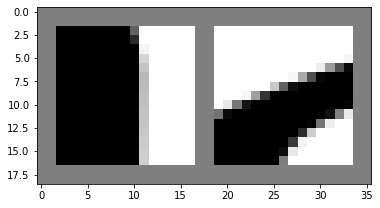


(true_class == predicted_class).item()=True
smallA 0.9914780259132385
smallA 0.9914780259132385


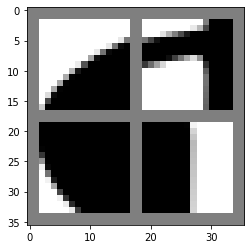


(true_class == predicted_class).item()=True
smallA 0.9999396800994873
smallA 0.9999396800994873


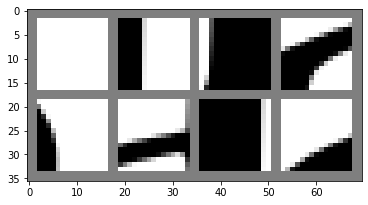


131 AJensonPro-Disp smallB


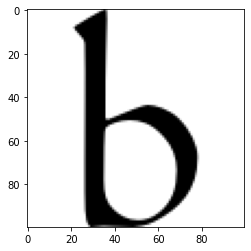


(true_class == predicted_class).item()=True
smallB 0.8644369840621948
smallB 0.8644369840621948


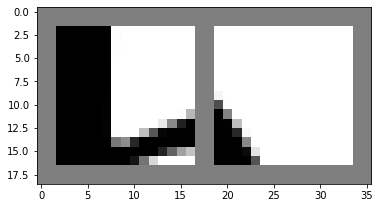


(true_class == predicted_class).item()=True
smallB 0.8263559937477112
smallB 0.8263559937477112


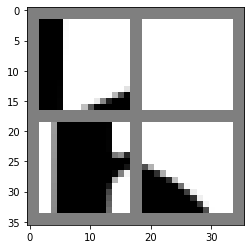


(true_class == predicted_class).item()=True
smallB 0.9869447350502014
smallB 0.9869447350502014


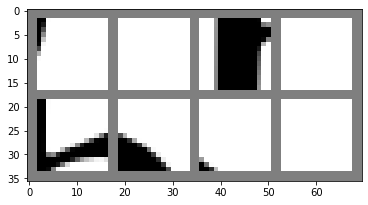


132 AJensonPro-Disp smallC


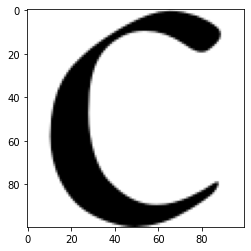


(true_class == predicted_class).item()=True
smallC 0.27339985966682434
smallC 0.27339985966682434


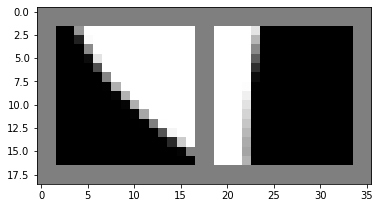


(true_class == predicted_class).item()=False
smallC 0.41320160031318665
capC 0.4608757197856903


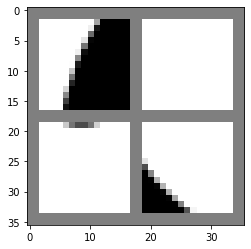


(true_class == predicted_class).item()=True
smallC 0.9834028482437134
smallC 0.9834028482437134


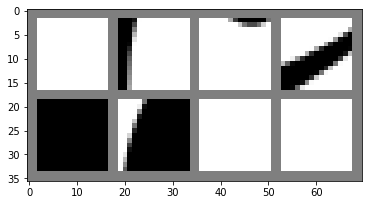


133 AJensonPro-Disp smallD


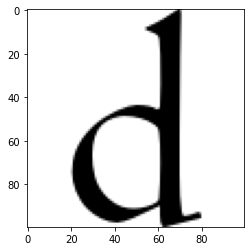


(true_class == predicted_class).item()=True
smallD 0.9380544424057007
smallD 0.9380544424057007


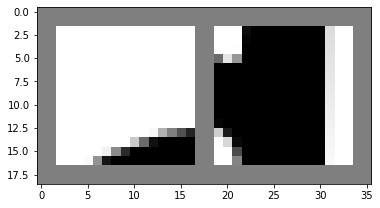


(true_class == predicted_class).item()=True
smallD 0.9918504357337952
smallD 0.9918504357337952


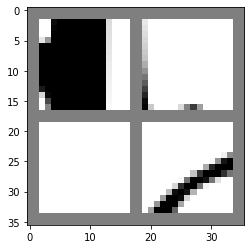


(true_class == predicted_class).item()=True
smallD 0.9989769458770752
smallD 0.9989769458770752


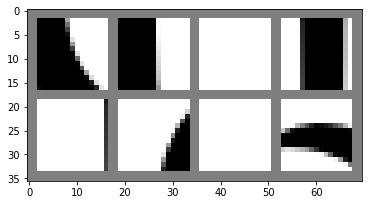


134 AJensonPro-Disp smallE


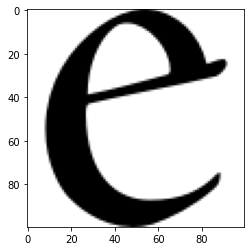


(true_class == predicted_class).item()=True
smallE 0.993838369846344
smallE 0.993838369846344


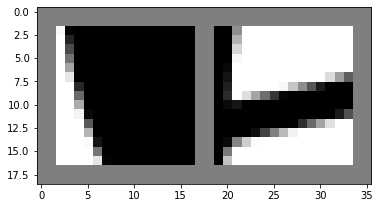


(true_class == predicted_class).item()=True
smallE 0.9997305274009705
smallE 0.9997305274009705


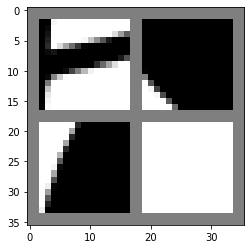


(true_class == predicted_class).item()=True
smallE 0.9999833106994629
smallE 0.9999833106994629


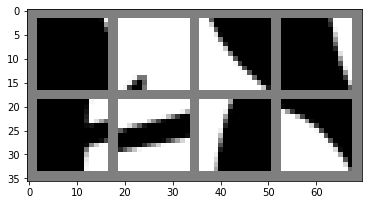


135 AJensonPro-Disp smallF


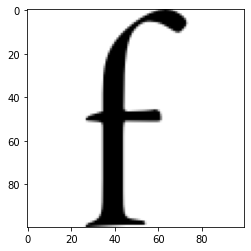


(true_class == predicted_class).item()=True
smallF 0.88706374168396
smallF 0.88706374168396


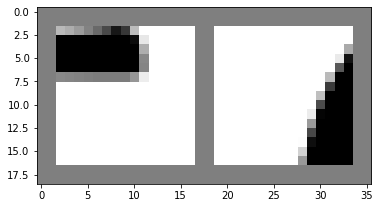


(true_class == predicted_class).item()=True
smallF 0.9965274930000305
smallF 0.9965274930000305


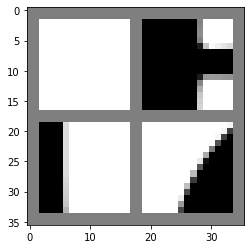


(true_class == predicted_class).item()=True
smallF 0.9999513626098633
smallF 0.9999513626098633


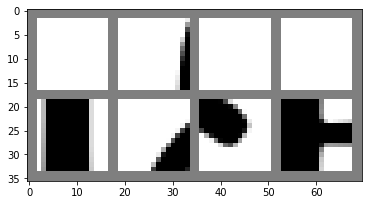


136 AJensonPro-Disp smallG


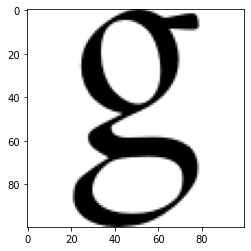


(true_class == predicted_class).item()=True
smallG 0.995083212852478
smallG 0.995083212852478


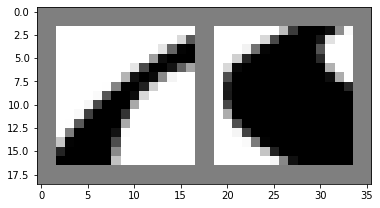


(true_class == predicted_class).item()=True
smallG 0.999666690826416
smallG 0.999666690826416


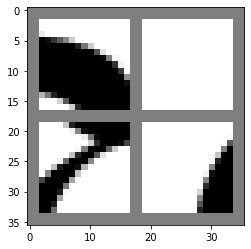


(true_class == predicted_class).item()=True
smallG 0.9999117851257324
smallG 0.9999117851257324


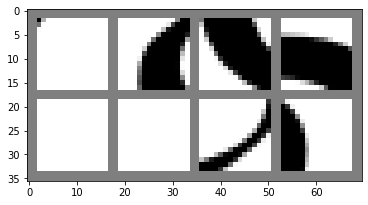


137 AJensonPro-Disp smallH


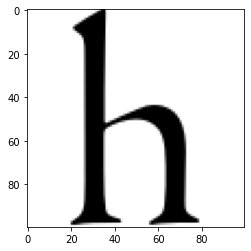


(true_class == predicted_class).item()=True
smallH 0.6239514350891113
smallH 0.6239514350891113


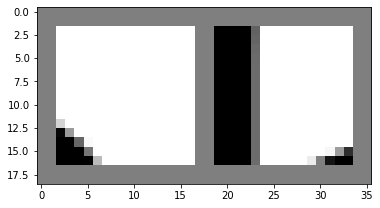


(true_class == predicted_class).item()=True
smallH 0.7719721794128418
smallH 0.7719721794128418


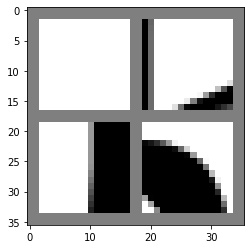


(true_class == predicted_class).item()=True
smallH 0.9803637862205505
smallH 0.9803637862205505


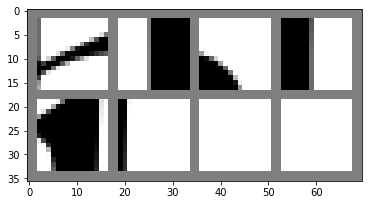


138 AJensonPro-Disp smallI


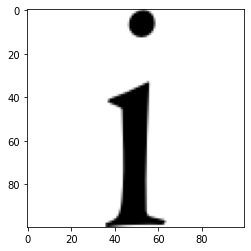


(true_class == predicted_class).item()=True
smallI 0.44120147824287415
smallI 0.44120147824287415


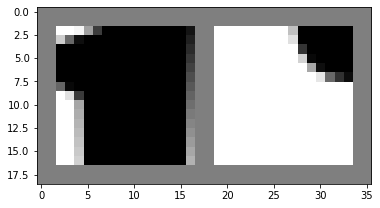


(true_class == predicted_class).item()=True
smallI 0.5786020755767822
smallI 0.5786020755767822


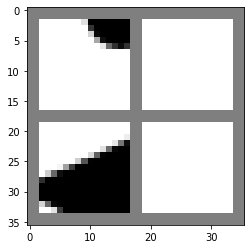


(true_class == predicted_class).item()=True
smallI 0.93801349401474
smallI 0.93801349401474


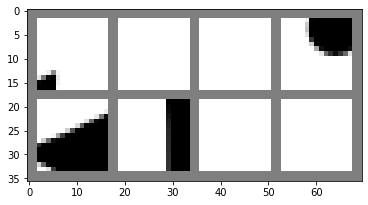


139 AJensonPro-Disp smallJ


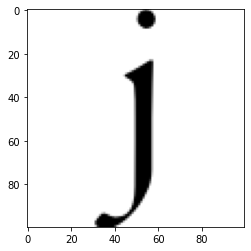


(true_class == predicted_class).item()=True
smallJ 0.7694674134254456
smallJ 0.7694674134254456


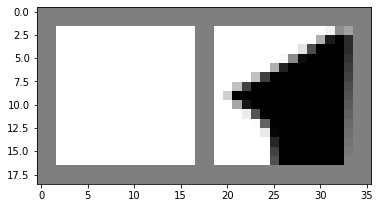


(true_class == predicted_class).item()=True
smallJ 0.8015760779380798
smallJ 0.8015760779380798


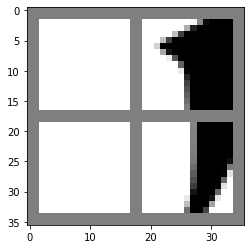


(true_class == predicted_class).item()=True
smallJ 0.9987862706184387
smallJ 0.9987862706184387


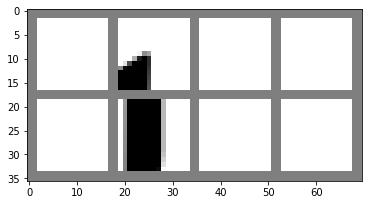


140 AJensonPro-Disp smallK


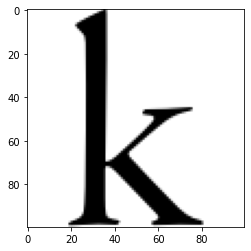


(true_class == predicted_class).item()=True
smallK 0.7134922742843628
smallK 0.7134922742843628


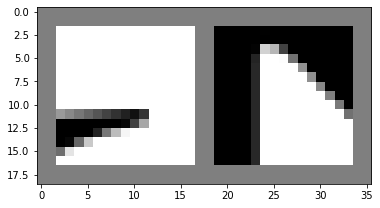


(true_class == predicted_class).item()=True
smallK 0.9862189888954163
smallK 0.9862189888954163


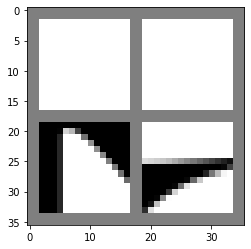


(true_class == predicted_class).item()=True
smallK 0.9954772591590881
smallK 0.9954772591590881


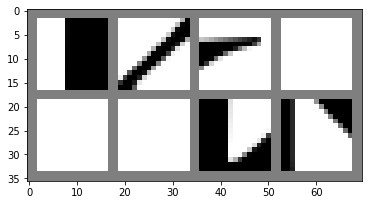


141 AJensonPro-Disp smallL


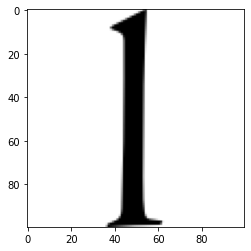


(true_class == predicted_class).item()=False
smallL 0.10986138135194778
smallF 0.29261770844459534


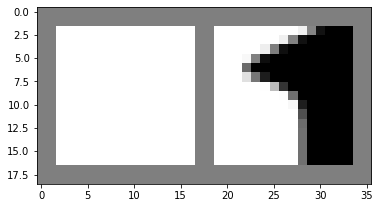


(true_class == predicted_class).item()=False
smallL 0.24213211238384247
smallF 0.25903090834617615


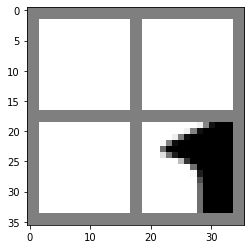


(true_class == predicted_class).item()=True
smallL 0.6639355421066284
smallL 0.6639355421066284


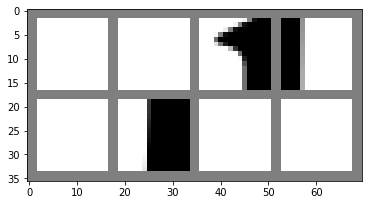


142 AJensonPro-Disp smallM


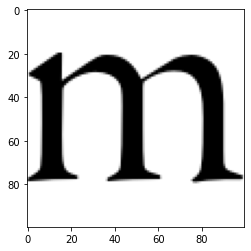


(true_class == predicted_class).item()=True
smallM 0.9841371774673462
smallM 0.9841371774673462


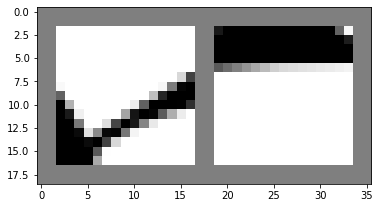


(true_class == predicted_class).item()=True
smallM 0.9988067150115967
smallM 0.9988067150115967


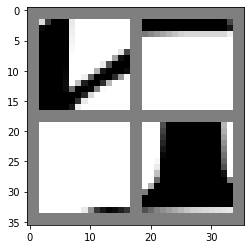


(true_class == predicted_class).item()=True
smallM 0.9997623562812805
smallM 0.9997623562812805


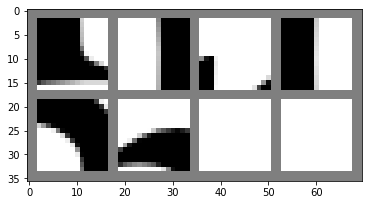


143 AJensonPro-Disp smallN


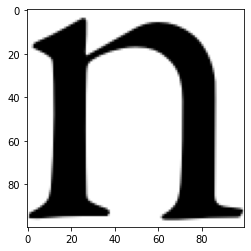


(true_class == predicted_class).item()=True
smallN 0.6569056510925293
smallN 0.6569056510925293


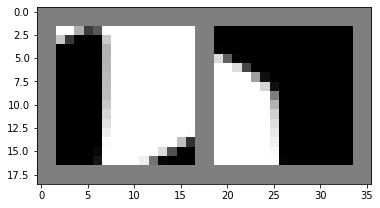


(true_class == predicted_class).item()=True
smallN 0.9103176593780518
smallN 0.9103176593780518


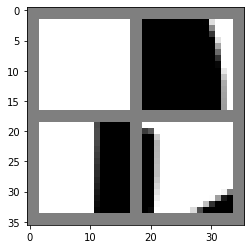


(true_class == predicted_class).item()=True
smallN 0.9701974987983704
smallN 0.9701974987983704


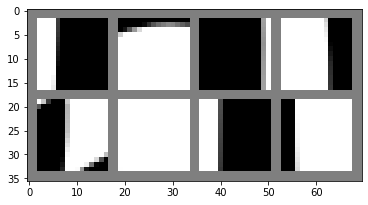


144 AJensonPro-Disp smallO


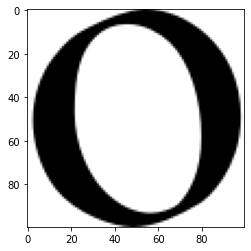


(true_class == predicted_class).item()=False
smallO 0.42825862765312195
capO 0.49745503067970276


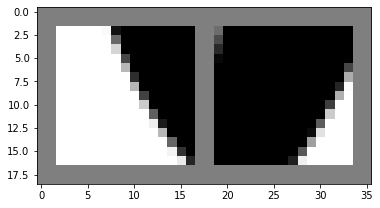


(true_class == predicted_class).item()=True
smallO 0.4616686999797821
smallO 0.4616686999797821


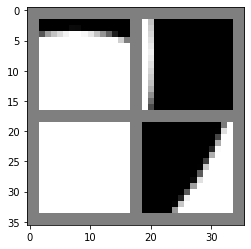


(true_class == predicted_class).item()=False
smallO 0.4627992510795593
capO 0.525887668132782


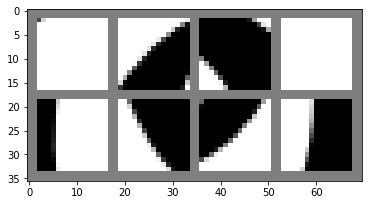


145 AJensonPro-Disp smallP


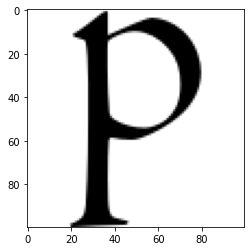


(true_class == predicted_class).item()=True
smallP 0.8760583996772766
smallP 0.8760583996772766


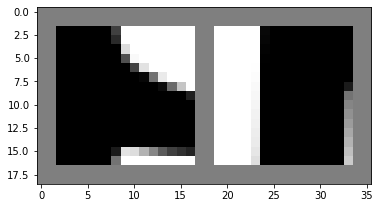


(true_class == predicted_class).item()=True
smallP 0.9972290396690369
smallP 0.9972290396690369


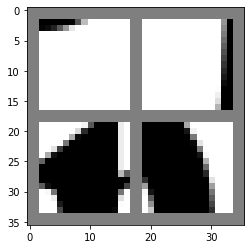


(true_class == predicted_class).item()=True
smallP 0.93185955286026
smallP 0.93185955286026


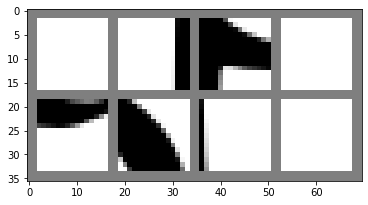


146 AJensonPro-Disp smallQ


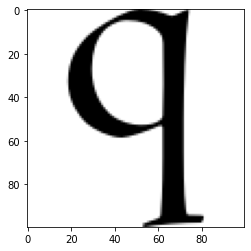


(true_class == predicted_class).item()=True
smallQ 0.846282422542572
smallQ 0.846282422542572


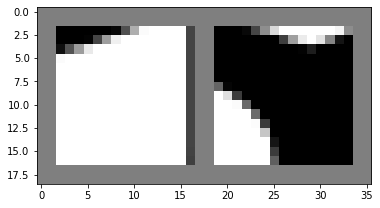


(true_class == predicted_class).item()=True
smallQ 0.9126828908920288
smallQ 0.9126828908920288


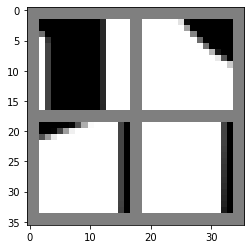


(true_class == predicted_class).item()=True
smallQ 0.9830514192581177
smallQ 0.9830514192581177


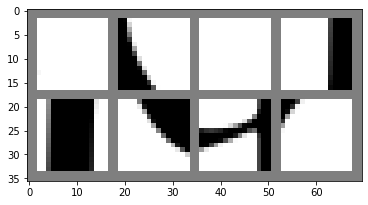


147 AJensonPro-Disp smallR


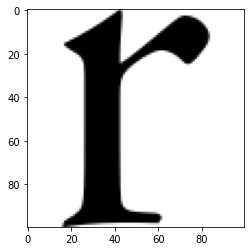


(true_class == predicted_class).item()=False
smallR 0.047473084181547165
smallH 0.31396472454071045


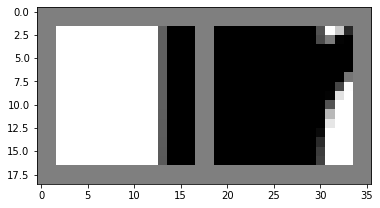


(true_class == predicted_class).item()=True
smallR 0.8496142029762268
smallR 0.8496142029762268


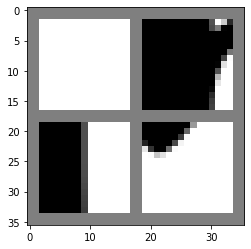


(true_class == predicted_class).item()=True
smallR 0.9992714524269104
smallR 0.9992714524269104


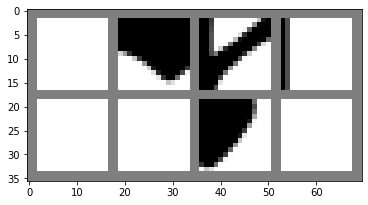


148 AJensonPro-Disp smallS


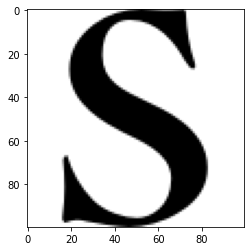


(true_class == predicted_class).item()=False
smallS 0.29357391595840454
capS 0.7024254202842712


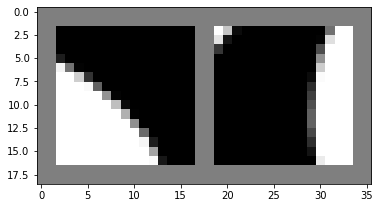


(true_class == predicted_class).item()=False
smallS 0.3720412850379944
capS 0.6264832615852356


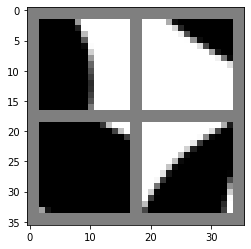


(true_class == predicted_class).item()=False
smallS 0.26858529448509216
capS 0.7313839793205261


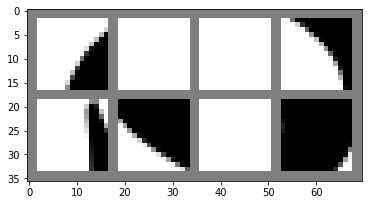


149 AJensonPro-Disp smallT


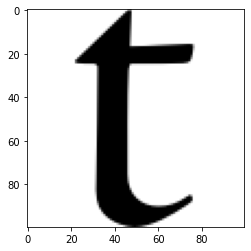


(true_class == predicted_class).item()=True
smallT 0.9576695561408997
smallT 0.9576695561408997


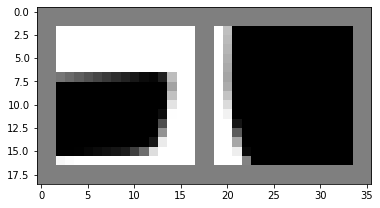


(true_class == predicted_class).item()=True
smallT 0.9717038869857788
smallT 0.9717038869857788


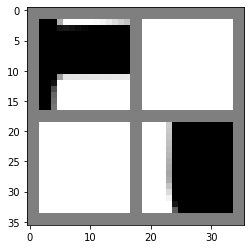


(true_class == predicted_class).item()=True
smallT 0.9984190464019775
smallT 0.9984190464019775


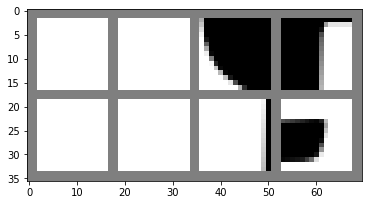


150 AJensonPro-Disp smallU


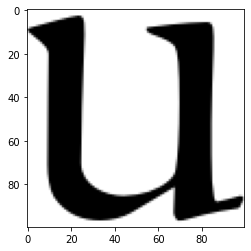


(true_class == predicted_class).item()=True
smallU 0.9838128089904785
smallU 0.9838128089904785


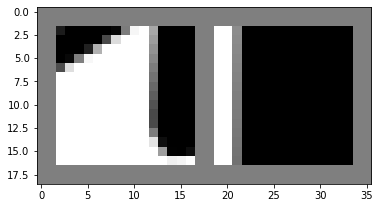


(true_class == predicted_class).item()=True
smallU 0.9950409531593323
smallU 0.9950409531593323


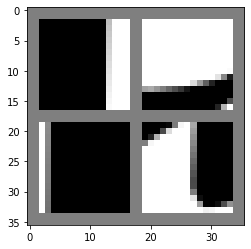


(true_class == predicted_class).item()=True
smallU 0.9921183586120605
smallU 0.9921183586120605


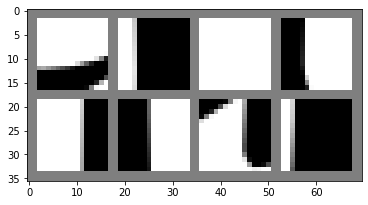


151 AJensonPro-Disp smallV


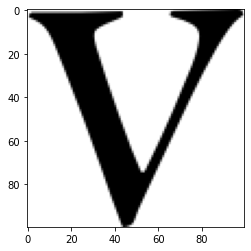


(true_class == predicted_class).item()=False
smallV 0.05652497708797455
capW 0.5285241603851318


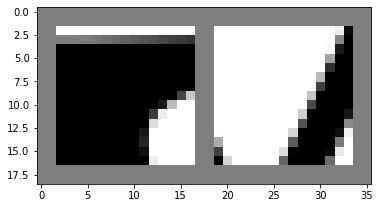


(true_class == predicted_class).item()=False
smallV 0.29624807834625244
capV 0.5684413909912109


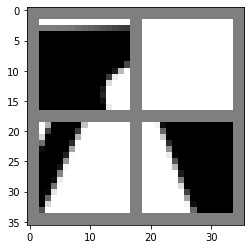


(true_class == predicted_class).item()=False
smallV 0.22782939672470093
capV 0.7319926619529724


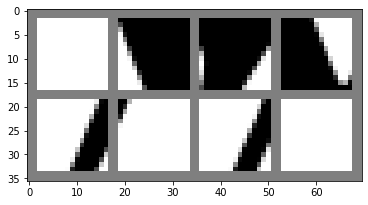


152 AJensonPro-Disp smallW


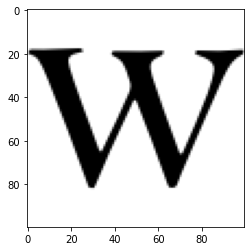


(true_class == predicted_class).item()=False
smallW 0.1614755243062973
capW 0.806495726108551


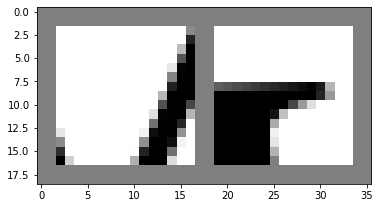


(true_class == predicted_class).item()=False
smallW 0.27480167150497437
capW 0.7246726155281067


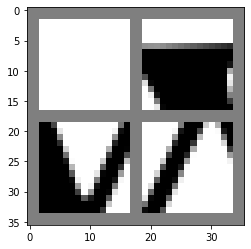


(true_class == predicted_class).item()=False
smallW 0.3428244888782501
capW 0.6569320559501648


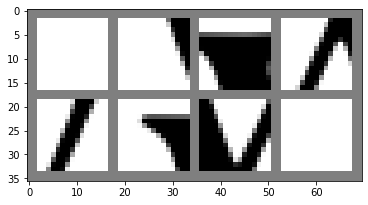


153 AJensonPro-Disp smallX


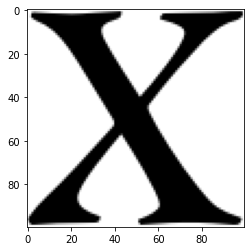


(true_class == predicted_class).item()=False
smallX 0.3827322721481323
capX 0.6138511896133423


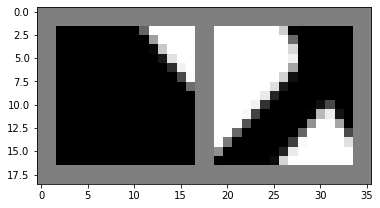


(true_class == predicted_class).item()=False
smallX 0.35763728618621826
capX 0.6421321034431458


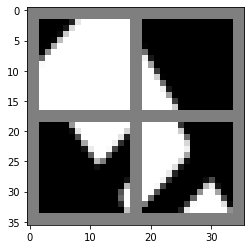


(true_class == predicted_class).item()=False
smallX 0.2766932547092438
capX 0.7231985926628113


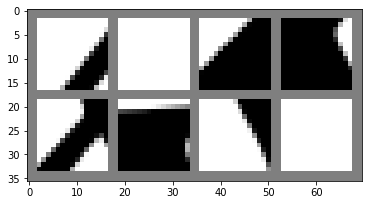


154 AJensonPro-Disp smallY


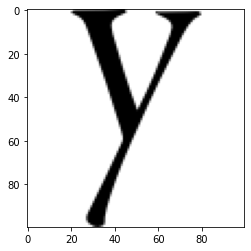


(true_class == predicted_class).item()=True
smallY 0.9702944755554199
smallY 0.9702944755554199


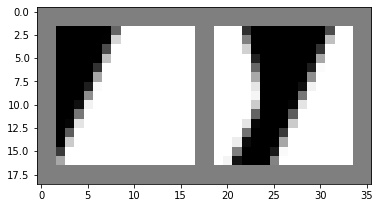


(true_class == predicted_class).item()=True
smallY 0.9997168183326721
smallY 0.9997168183326721


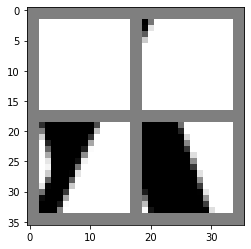


(true_class == predicted_class).item()=True
smallY 0.9999390840530396
smallY 0.9999390840530396


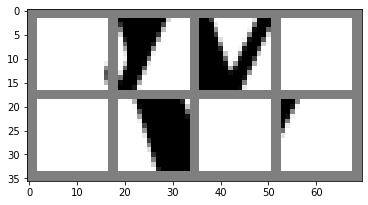


155 AJensonPro-Disp smallZ


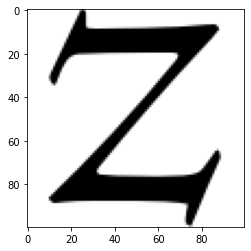


(true_class == predicted_class).item()=True
smallZ 0.6134663820266724
smallZ 0.6134663820266724


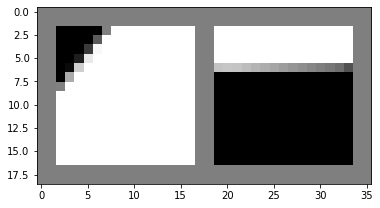


(true_class == predicted_class).item()=True
smallZ 0.6010378003120422
smallZ 0.6010378003120422


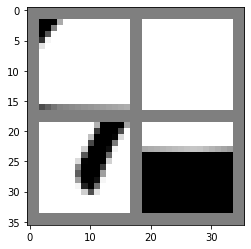


(true_class == predicted_class).item()=True
smallZ 0.5646036863327026
smallZ 0.5646036863327026


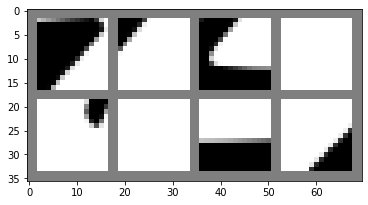


156 AJensonPro-ItDisp capA


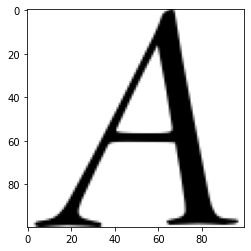


(true_class == predicted_class).item()=True
capA 0.961936891078949
capA 0.961936891078949


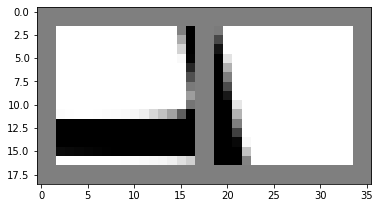


(true_class == predicted_class).item()=True
capA 0.9994183778762817
capA 0.9994183778762817


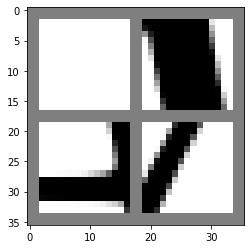


(true_class == predicted_class).item()=True
capA 0.9938540458679199
capA 0.9938540458679199


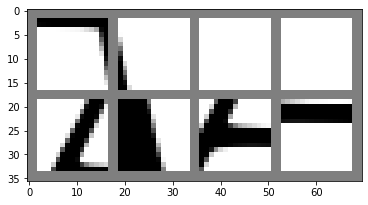


157 AJensonPro-ItDisp capB


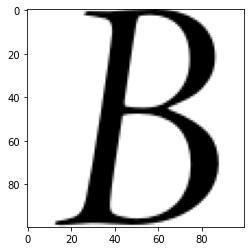


(true_class == predicted_class).item()=True
capB 0.8184909224510193
capB 0.8184909224510193


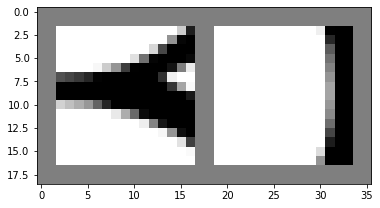


(true_class == predicted_class).item()=True
capB 0.8465552926063538
capB 0.8465552926063538


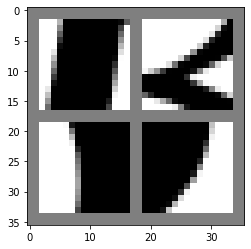


(true_class == predicted_class).item()=True
capB 0.9948987364768982
capB 0.9948987364768982


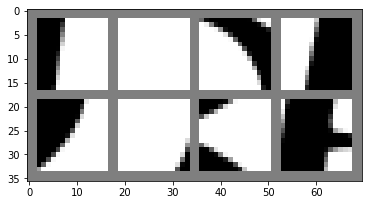


158 AJensonPro-ItDisp capC


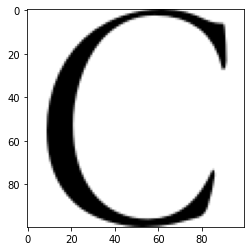


(true_class == predicted_class).item()=True
capC 0.6844643354415894
capC 0.6844643354415894


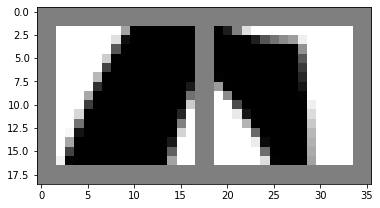


(true_class == predicted_class).item()=True
capC 0.5573845505714417
capC 0.5573845505714417


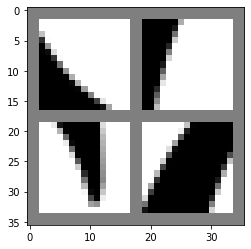


(true_class == predicted_class).item()=True
capC 0.891593873500824
capC 0.891593873500824


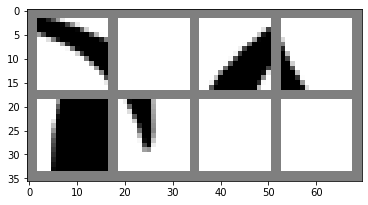


159 AJensonPro-ItDisp capD


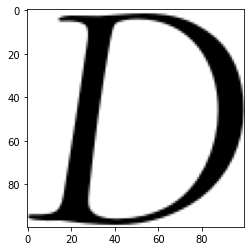


(true_class == predicted_class).item()=True
capD 0.3581239581108093
capD 0.3581239581108093


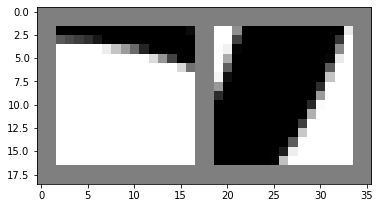


(true_class == predicted_class).item()=True
capD 0.7444099187850952
capD 0.7444099187850952


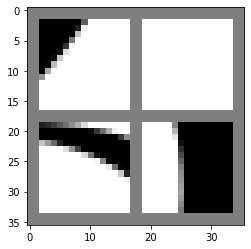


(true_class == predicted_class).item()=True
capD 0.9977491497993469
capD 0.9977491497993469


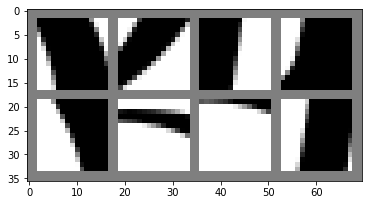


160 AJensonPro-ItDisp capE


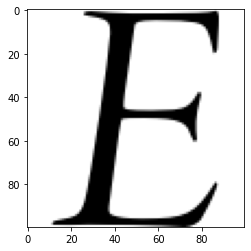


(true_class == predicted_class).item()=True
capE 0.5227288603782654
capE 0.5227288603782654


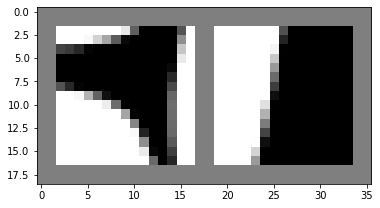


(true_class == predicted_class).item()=True
capE 0.7278830409049988
capE 0.7278830409049988


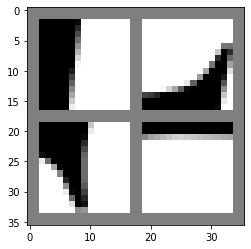


(true_class == predicted_class).item()=True
capE 0.9536284804344177
capE 0.9536284804344177


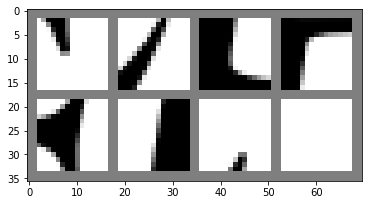


161 AJensonPro-ItDisp capF


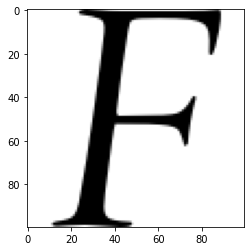


(true_class == predicted_class).item()=False
capF 0.4501803517341614
capE 0.5271294116973877


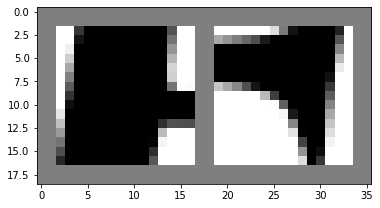


(true_class == predicted_class).item()=True
capF 0.5683850049972534
capF 0.5683850049972534


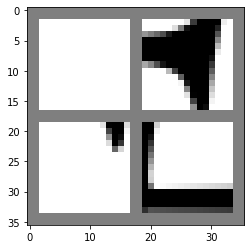


(true_class == predicted_class).item()=True
capF 0.7612020373344421
capF 0.7612020373344421


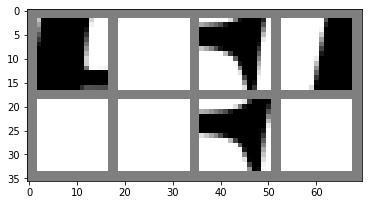


162 AJensonPro-ItDisp capG


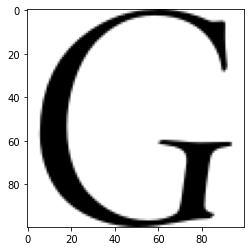


(true_class == predicted_class).item()=False
capG 0.3362443745136261
capC 0.650260865688324


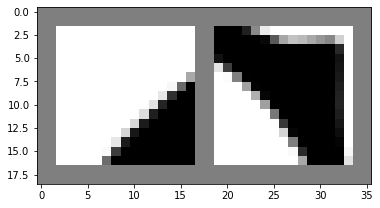


(true_class == predicted_class).item()=True
capG 0.9480451941490173
capG 0.9480451941490173


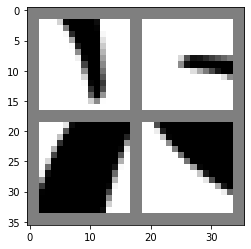


(true_class == predicted_class).item()=True
capG 0.9848596453666687
capG 0.9848596453666687


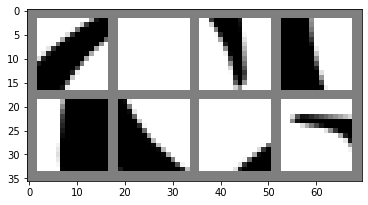


163 AJensonPro-ItDisp capH


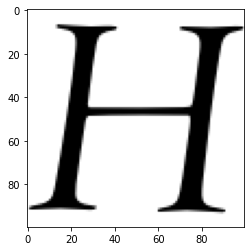


(true_class == predicted_class).item()=True
capH 0.6961804032325745
capH 0.6961804032325745


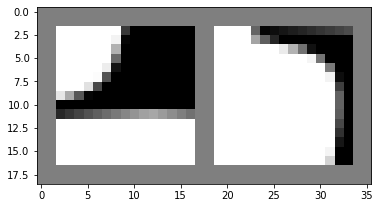


(true_class == predicted_class).item()=True
capH 0.9750089049339294
capH 0.9750089049339294


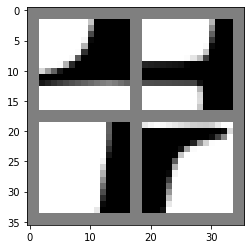


(true_class == predicted_class).item()=True
capH 0.9993948936462402
capH 0.9993948936462402


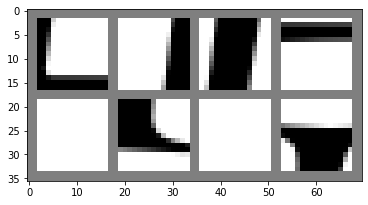


164 AJensonPro-ItDisp capI


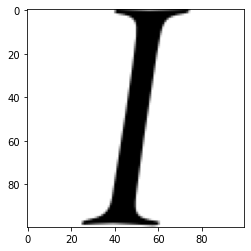


(true_class == predicted_class).item()=False
capI 0.10853710770606995
capU 0.48525500297546387


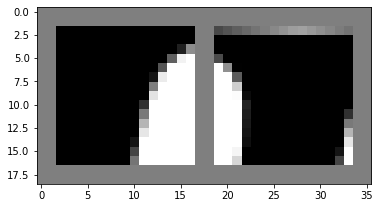


(true_class == predicted_class).item()=True
capI 0.4036619961261749
capI 0.4036619961261749


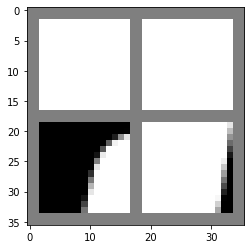


(true_class == predicted_class).item()=True
capI 0.4351752996444702
capI 0.4351752996444702


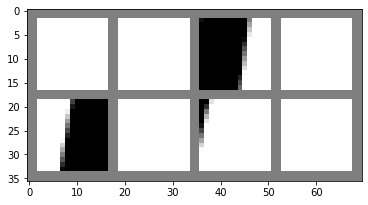


165 AJensonPro-ItDisp capJ


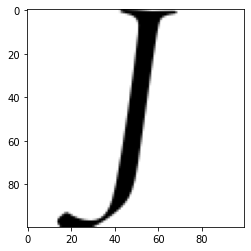


(true_class == predicted_class).item()=False
capJ 0.2475062906742096
smallJ 0.5352655649185181


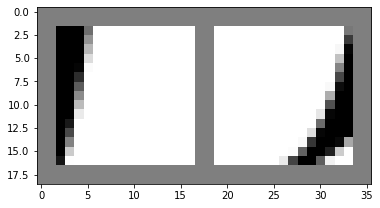


(true_class == predicted_class).item()=False
capJ 0.0737425908446312
smallJ 0.7303678393363953


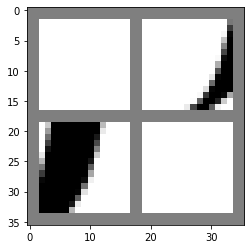


(true_class == predicted_class).item()=True
capJ 0.5821154713630676
capJ 0.5821154713630676


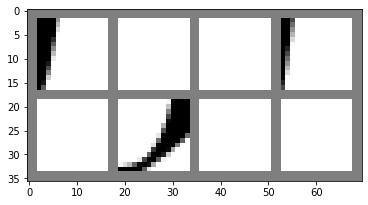


166 AJensonPro-ItDisp capK


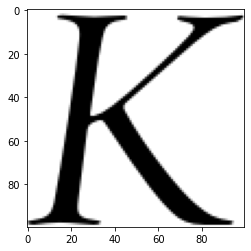


(true_class == predicted_class).item()=True
capK 0.7899269461631775
capK 0.7899269461631775


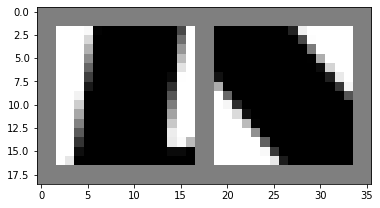


(true_class == predicted_class).item()=True
capK 0.8604524731636047
capK 0.8604524731636047


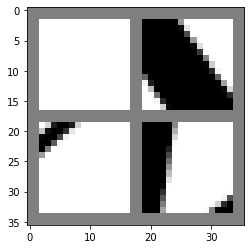


(true_class == predicted_class).item()=True
capK 0.9825983047485352
capK 0.9825983047485352


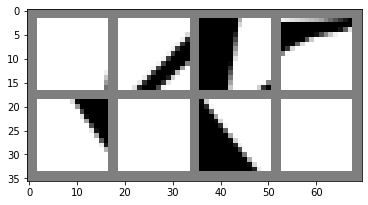


167 AJensonPro-ItDisp capL


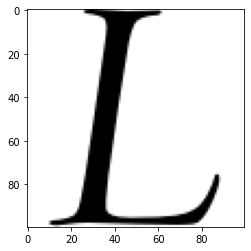


(true_class == predicted_class).item()=False
capL 0.19887150824069977
capE 0.543222188949585


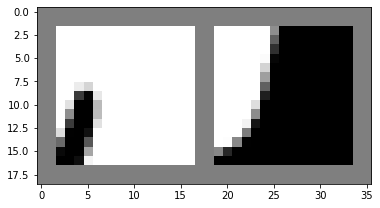


(true_class == predicted_class).item()=True
capL 0.40584930777549744
capL 0.40584930777549744


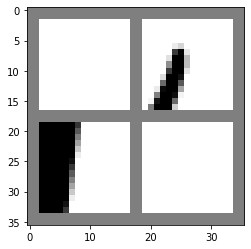


(true_class == predicted_class).item()=True
capL 0.9440966248512268
capL 0.9440966248512268


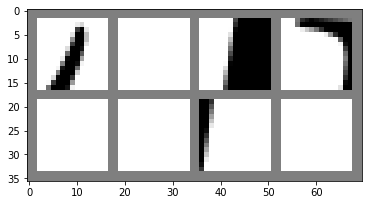


168 AJensonPro-ItDisp capM


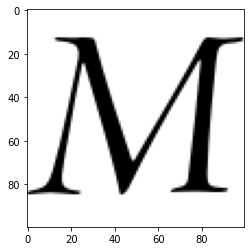


(true_class == predicted_class).item()=True
capM 0.9905217885971069
capM 0.9905217885971069


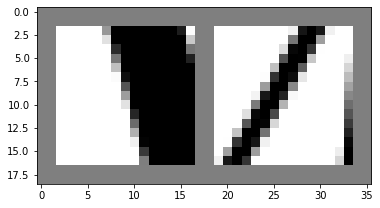


(true_class == predicted_class).item()=True
capM 0.9999299049377441
capM 0.9999299049377441


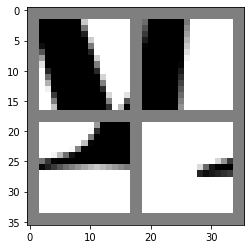


(true_class == predicted_class).item()=True
capM 0.9981065988540649
capM 0.9981065988540649


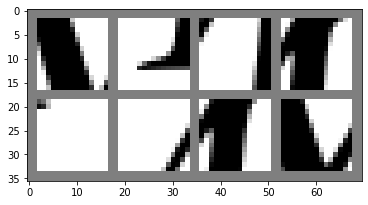


169 AJensonPro-ItDisp capN


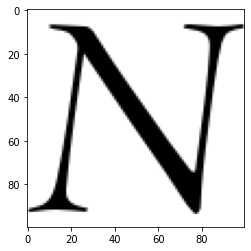


(true_class == predicted_class).item()=True
capN 0.9968620538711548
capN 0.9968620538711548


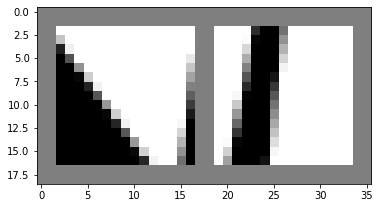


(true_class == predicted_class).item()=True
capN 0.9983119964599609
capN 0.9983119964599609


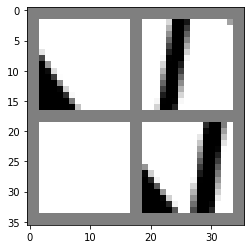


(true_class == predicted_class).item()=True
capN 0.9994951486587524
capN 0.9994951486587524


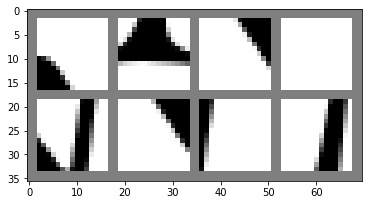


170 AJensonPro-ItDisp capO


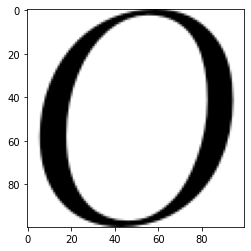


(true_class == predicted_class).item()=True
capO 0.5072636604309082
capO 0.5072636604309082


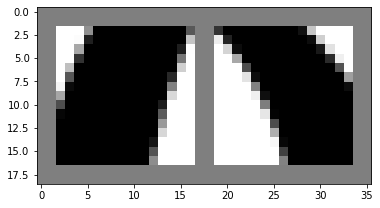


(true_class == predicted_class).item()=True
capO 0.5974354147911072
capO 0.5974354147911072


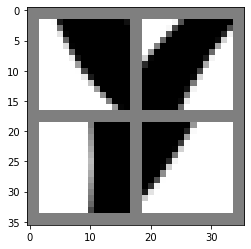


(true_class == predicted_class).item()=True
capO 0.8345111012458801
capO 0.8345111012458801


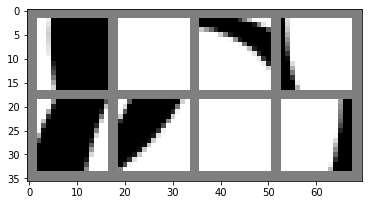


171 AJensonPro-ItDisp capP


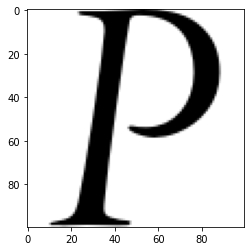


(true_class == predicted_class).item()=True
capP 0.8163456320762634
capP 0.8163456320762634


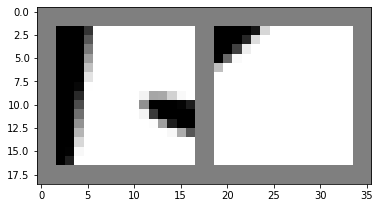


(true_class == predicted_class).item()=True
capP 0.7088064551353455
capP 0.7088064551353455


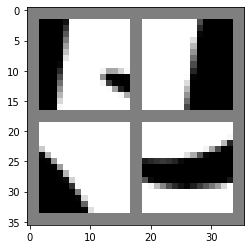


(true_class == predicted_class).item()=True
capP 0.9963968396186829
capP 0.9963968396186829


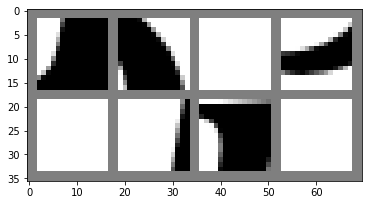


172 AJensonPro-ItDisp capQ


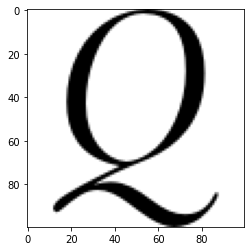


(true_class == predicted_class).item()=True
capQ 0.9562063217163086
capQ 0.9562063217163086


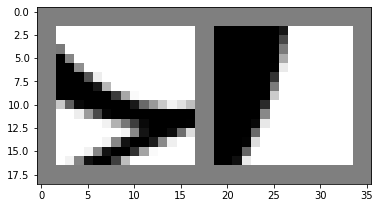


(true_class == predicted_class).item()=True
capQ 0.9985809326171875
capQ 0.9985809326171875


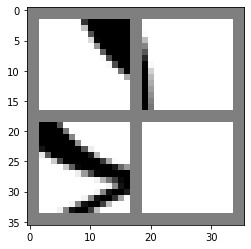


(true_class == predicted_class).item()=True
capQ 0.9984690546989441
capQ 0.9984690546989441


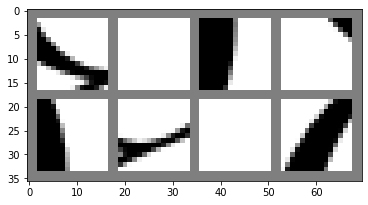


173 AJensonPro-ItDisp capR


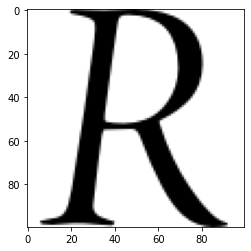


(true_class == predicted_class).item()=True
capR 0.6652665734291077
capR 0.6652665734291077


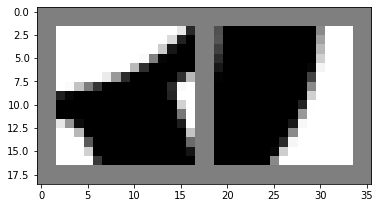


(true_class == predicted_class).item()=True
capR 0.9889733195304871
capR 0.9889733195304871


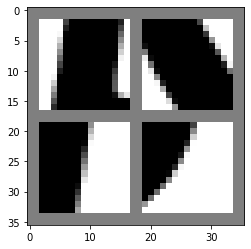


(true_class == predicted_class).item()=True
capR 0.9630346894264221
capR 0.9630346894264221


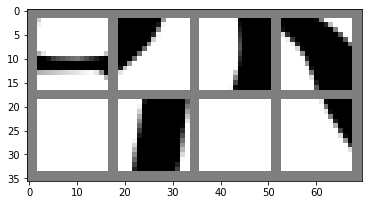


174 AJensonPro-ItDisp capS


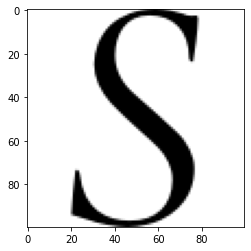


(true_class == predicted_class).item()=True
capS 0.9008445143699646
capS 0.9008445143699646


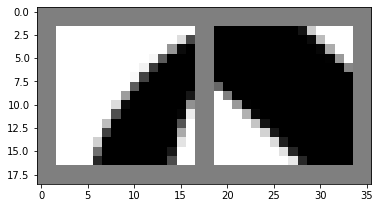


(true_class == predicted_class).item()=True
capS 0.8936690092086792
capS 0.8936690092086792


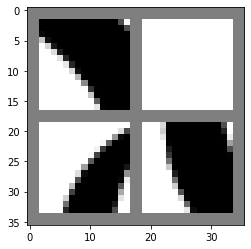


(true_class == predicted_class).item()=True
capS 0.9065119028091431
capS 0.9065119028091431


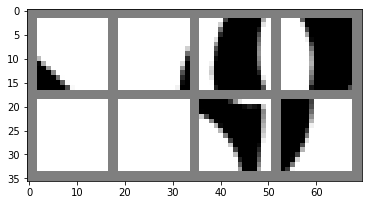


175 AJensonPro-ItDisp capT


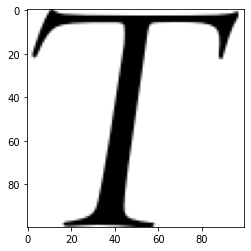


(true_class == predicted_class).item()=True
capT 0.9087125062942505
capT 0.9087125062942505


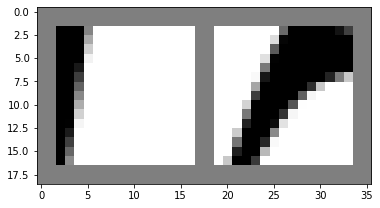


(true_class == predicted_class).item()=True
capT 0.9445415735244751
capT 0.9445415735244751


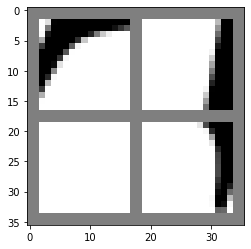


(true_class == predicted_class).item()=True
capT 0.998979389667511
capT 0.998979389667511


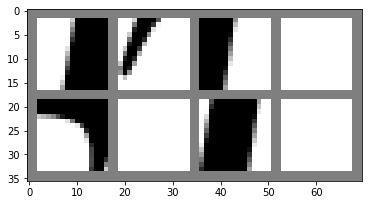


176 AJensonPro-ItDisp capU


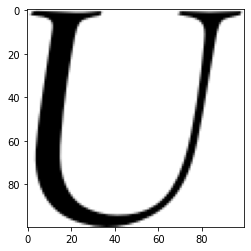


(true_class == predicted_class).item()=True
capU 0.963972806930542
capU 0.963972806930542


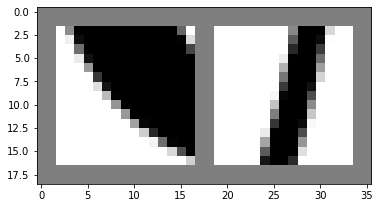


(true_class == predicted_class).item()=True
capU 0.9984279870986938
capU 0.9984279870986938


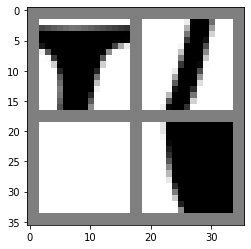


(true_class == predicted_class).item()=True
capU 0.9998735189437866
capU 0.9998735189437866


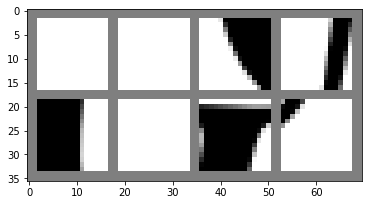


177 AJensonPro-ItDisp capV


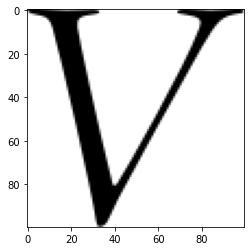


(true_class == predicted_class).item()=False
capV 0.04332396388053894
capW 0.9313003420829773


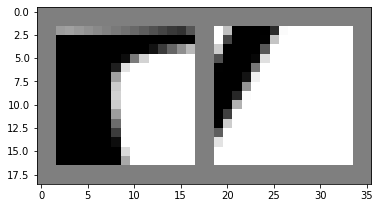


(true_class == predicted_class).item()=True
capV 0.5069048404693604
capV 0.5069048404693604


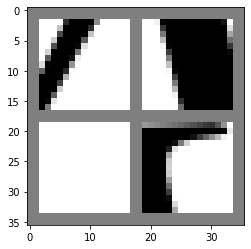


(true_class == predicted_class).item()=True
capV 0.7859176993370056
capV 0.7859176993370056


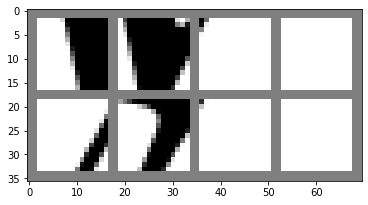


178 AJensonPro-ItDisp capW


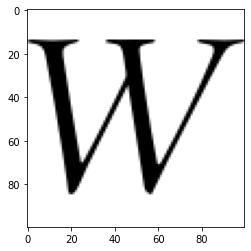


(true_class == predicted_class).item()=True
capW 0.9595234394073486
capW 0.9595234394073486


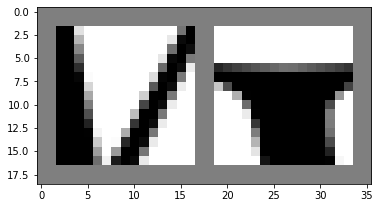


(true_class == predicted_class).item()=True
capW 0.9346269965171814
capW 0.9346269965171814


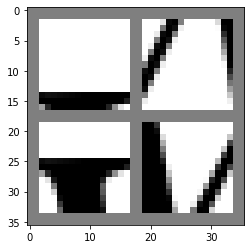


(true_class == predicted_class).item()=True
capW 0.9707593321800232
capW 0.9707593321800232


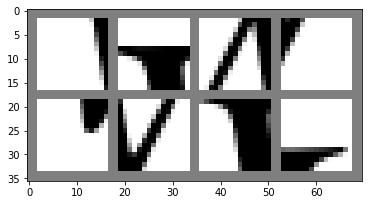


179 AJensonPro-ItDisp capX


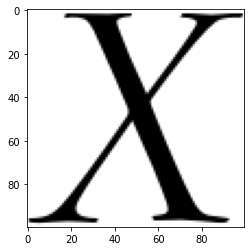


(true_class == predicted_class).item()=True
capX 0.687249481678009
capX 0.687249481678009


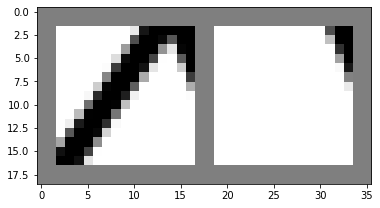


(true_class == predicted_class).item()=True
capX 0.7627301216125488
capX 0.7627301216125488


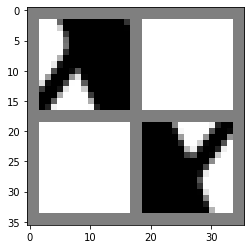


(true_class == predicted_class).item()=True
capX 0.8335472941398621
capX 0.8335472941398621


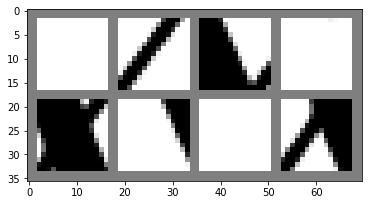


180 AJensonPro-ItDisp capY


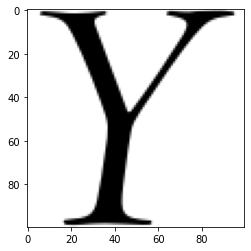


(true_class == predicted_class).item()=True
capY 0.7117257714271545
capY 0.7117257714271545


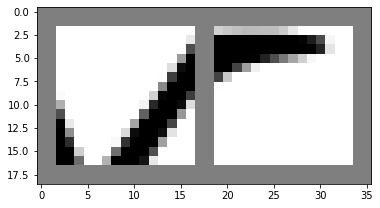


(true_class == predicted_class).item()=True
capY 0.9767816066741943
capY 0.9767816066741943


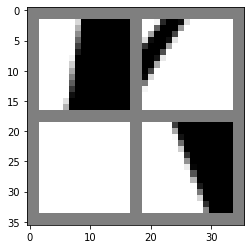


(true_class == predicted_class).item()=True
capY 0.9991466999053955
capY 0.9991466999053955


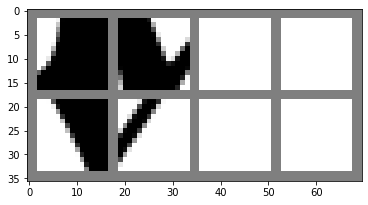


181 AJensonPro-ItDisp capZ


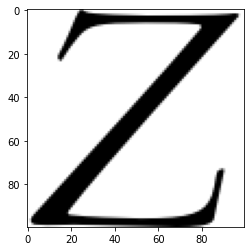


(true_class == predicted_class).item()=True
capZ 0.9301852583885193
capZ 0.9301852583885193


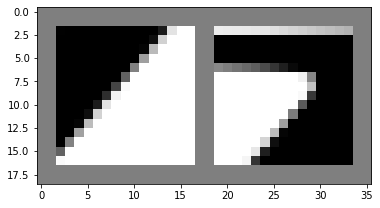


(true_class == predicted_class).item()=True
capZ 0.8640702366828918
capZ 0.8640702366828918


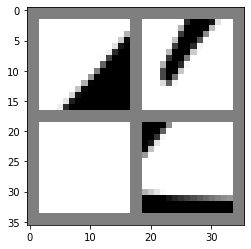


(true_class == predicted_class).item()=True
capZ 0.9826065301895142
capZ 0.9826065301895142


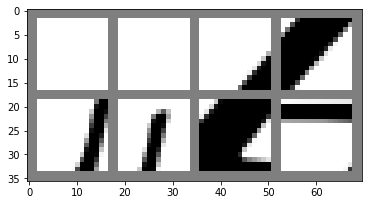


182 AJensonPro-ItDisp smallA


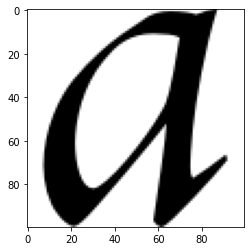


(true_class == predicted_class).item()=True
smallA 0.46947792172431946
smallA 0.46947792172431946


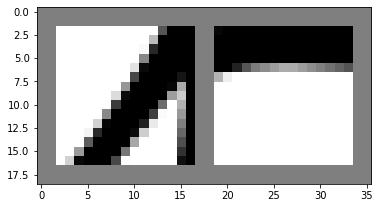


(true_class == predicted_class).item()=True
smallA 0.9508833289146423
smallA 0.9508833289146423


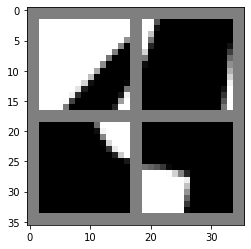


(true_class == predicted_class).item()=True
smallA 0.9357635974884033
smallA 0.9357635974884033


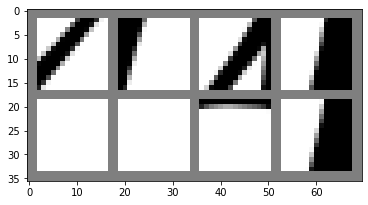


183 AJensonPro-ItDisp smallB


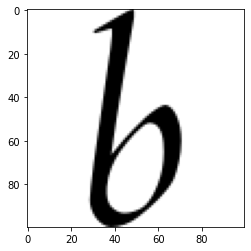


(true_class == predicted_class).item()=False
smallB 0.2939315736293793
smallM 0.3371732532978058


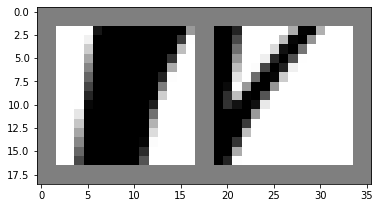


(true_class == predicted_class).item()=False
smallB 0.31178227066993713
smallH 0.6708791851997375


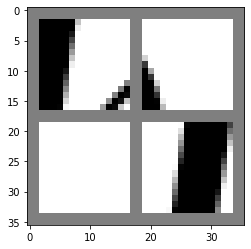


(true_class == predicted_class).item()=True
smallB 0.9025754928588867
smallB 0.9025754928588867


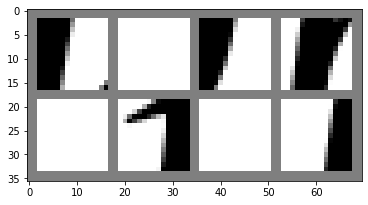


184 AJensonPro-ItDisp smallC


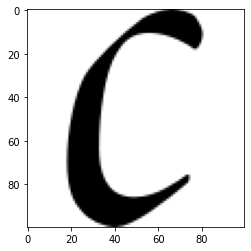


(true_class == predicted_class).item()=True
smallC 0.46662524342536926
smallC 0.46662524342536926


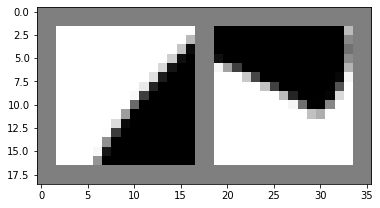


(true_class == predicted_class).item()=True
smallC 0.6175905466079712
smallC 0.6175905466079712


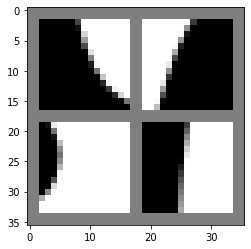


(true_class == predicted_class).item()=True
smallC 0.8746147751808167
smallC 0.8746147751808167


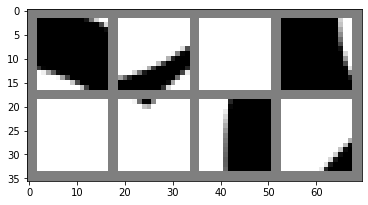


185 AJensonPro-ItDisp smallD


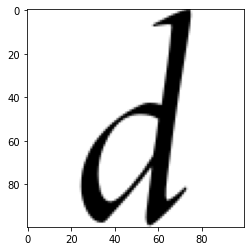


(true_class == predicted_class).item()=True
smallD 0.6792622804641724
smallD 0.6792622804641724


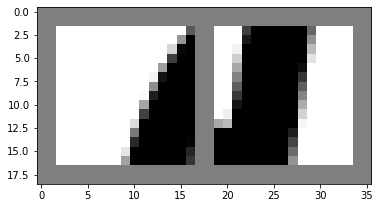


(true_class == predicted_class).item()=True
smallD 0.9969781637191772
smallD 0.9969781637191772


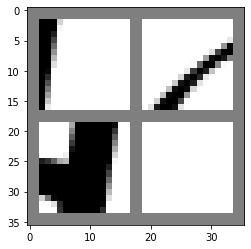


(true_class == predicted_class).item()=True
smallD 0.9992257356643677
smallD 0.9992257356643677


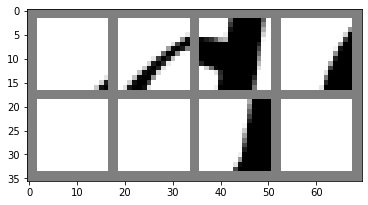


186 AJensonPro-ItDisp smallE


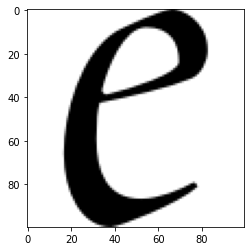


(true_class == predicted_class).item()=True
smallE 0.9831134080886841
smallE 0.9831134080886841


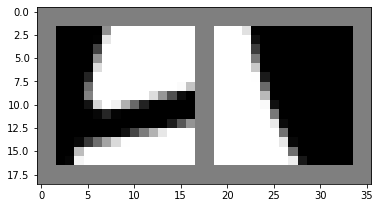


(true_class == predicted_class).item()=True
smallE 0.9993606209754944
smallE 0.9993606209754944


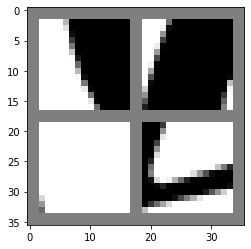


(true_class == predicted_class).item()=True
smallE 0.9999123811721802
smallE 0.9999123811721802


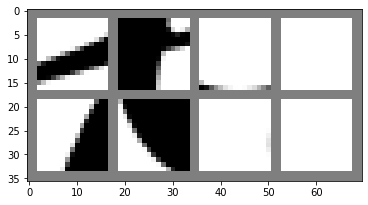


187 AJensonPro-ItDisp smallF


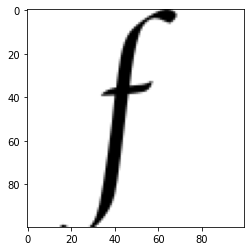


(true_class == predicted_class).item()=True
smallF 0.9465434551239014
smallF 0.9465434551239014


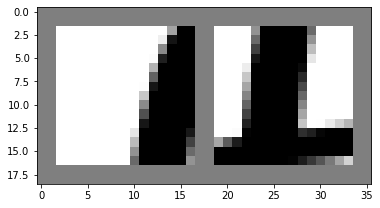


(true_class == predicted_class).item()=True
smallF 0.9944266080856323
smallF 0.9944266080856323


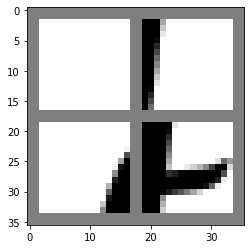


(true_class == predicted_class).item()=True
smallF 0.9999818801879883
smallF 0.9999818801879883


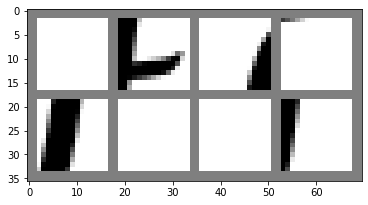


188 AJensonPro-ItDisp smallG


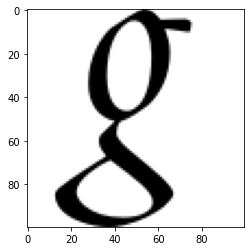


(true_class == predicted_class).item()=True
smallG 0.9741964936256409
smallG 0.9741964936256409


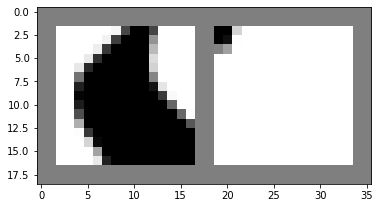


(true_class == predicted_class).item()=True
smallG 0.9993332028388977
smallG 0.9993332028388977


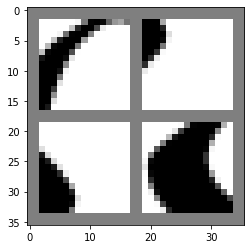


(true_class == predicted_class).item()=True
smallG 0.9996786117553711
smallG 0.9996786117553711


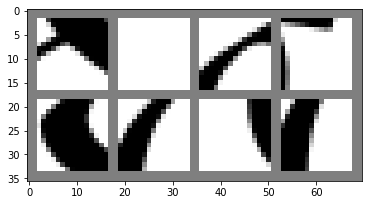


189 AJensonPro-ItDisp smallH


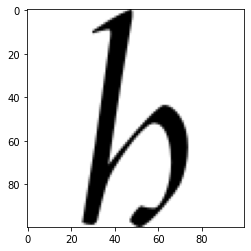


(true_class == predicted_class).item()=True
smallH 0.40806177258491516
smallH 0.40806177258491516


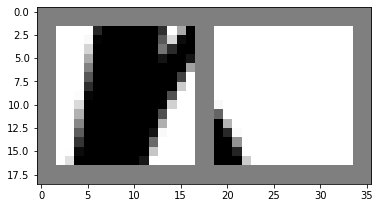


(true_class == predicted_class).item()=True
smallH 0.5680345296859741
smallH 0.5680345296859741


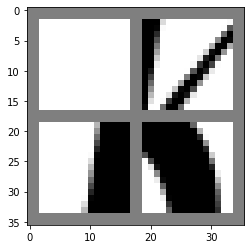


(true_class == predicted_class).item()=True
smallH 0.9874179363250732
smallH 0.9874179363250732


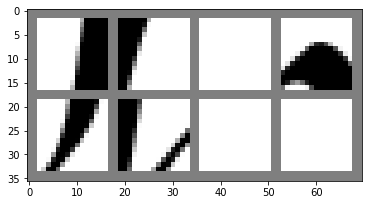


190 AJensonPro-ItDisp smallI


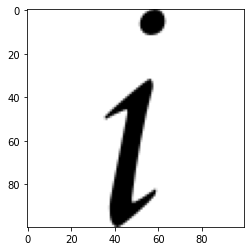


(true_class == predicted_class).item()=False
smallI 0.32468125224113464
smallM 0.3424589931964874


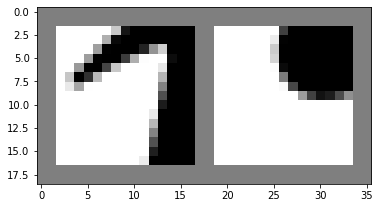


(true_class == predicted_class).item()=True
smallI 0.9437776207923889
smallI 0.9437776207923889


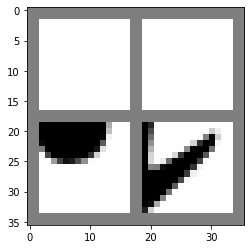


(true_class == predicted_class).item()=True
smallI 0.9850971698760986
smallI 0.9850971698760986


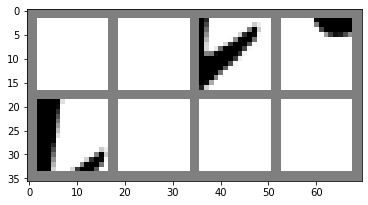


191 AJensonPro-ItDisp smallJ


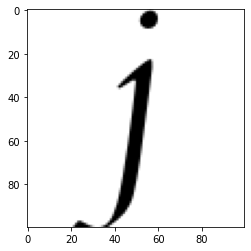


(true_class == predicted_class).item()=False
smallJ 0.3628489375114441
smallF 0.6221550107002258


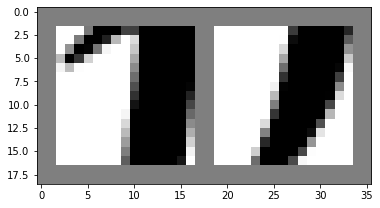


(true_class == predicted_class).item()=True
smallJ 0.9361441731452942
smallJ 0.9361441731452942


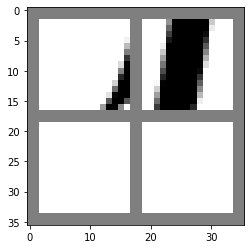


(true_class == predicted_class).item()=True
smallJ 0.9955258965492249
smallJ 0.9955258965492249


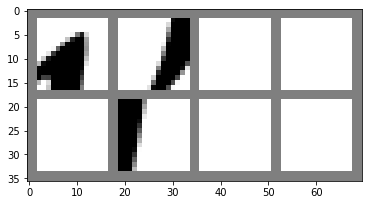


192 AJensonPro-ItDisp smallK


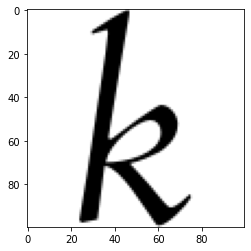


(true_class == predicted_class).item()=True
smallK 0.6580023169517517
smallK 0.6580023169517517


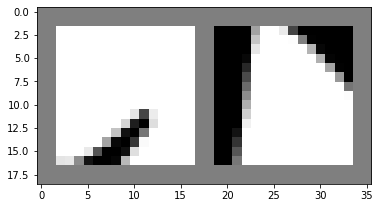


(true_class == predicted_class).item()=True
smallK 0.9435072541236877
smallK 0.9435072541236877


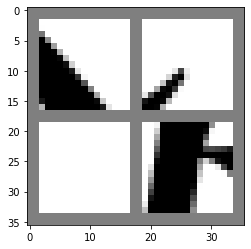


(true_class == predicted_class).item()=True
smallK 0.9992024302482605
smallK 0.9992024302482605


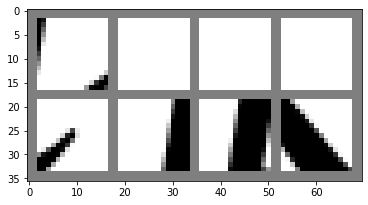


193 AJensonPro-ItDisp smallL


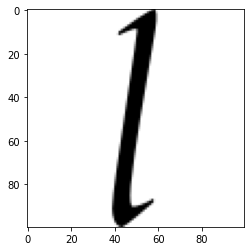


(true_class == predicted_class).item()=True
smallL 0.3704666495323181
smallL 0.3704666495323181


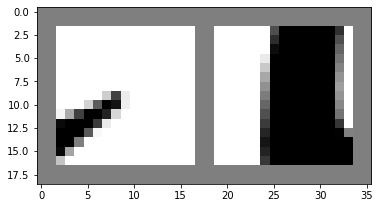


(true_class == predicted_class).item()=True
smallL 0.4611159861087799
smallL 0.4611159861087799


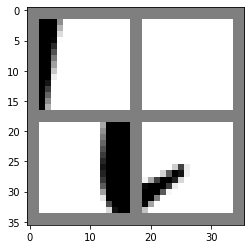


(true_class == predicted_class).item()=True
smallL 0.92336505651474
smallL 0.92336505651474


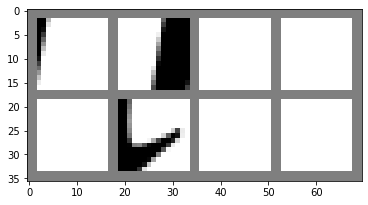


194 AJensonPro-ItDisp smallM


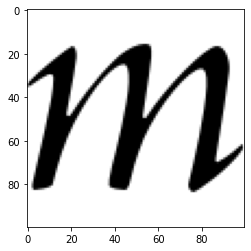


(true_class == predicted_class).item()=True
smallM 0.9797348976135254
smallM 0.9797348976135254


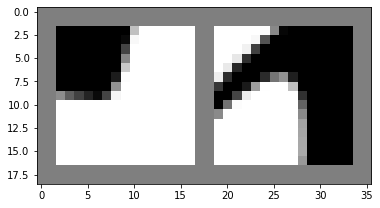


(true_class == predicted_class).item()=True
smallM 0.9979385733604431
smallM 0.9979385733604431


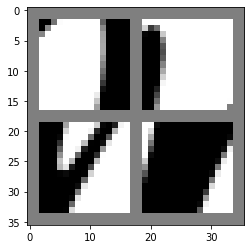


(true_class == predicted_class).item()=True
smallM 0.9997931122779846
smallM 0.9997931122779846


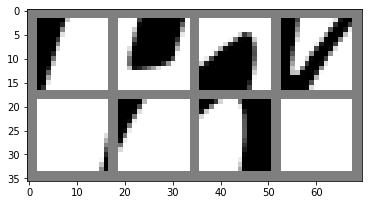


195 AJensonPro-ItDisp smallN


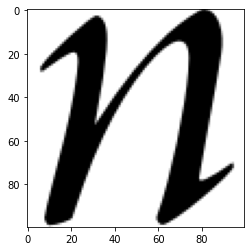


(true_class == predicted_class).item()=True
smallN 0.5395975708961487
smallN 0.5395975708961487


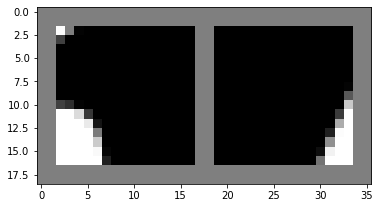


(true_class == predicted_class).item()=True
smallN 0.8324018716812134
smallN 0.8324018716812134


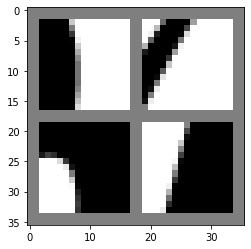


(true_class == predicted_class).item()=True
smallN 0.9880543351173401
smallN 0.9880543351173401


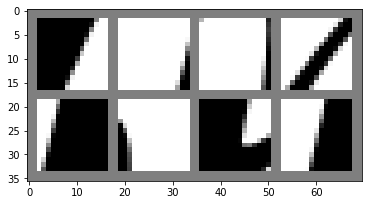


196 AJensonPro-ItDisp smallO


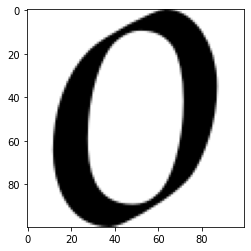


(true_class == predicted_class).item()=True
smallO 0.42136597633361816
smallO 0.42136597633361816


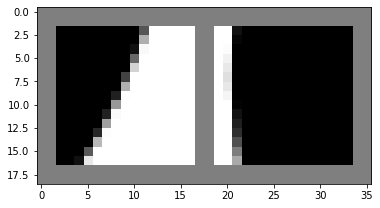


(true_class == predicted_class).item()=False
smallO 0.45912718772888184
capO 0.5149120688438416


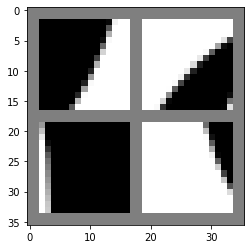


(true_class == predicted_class).item()=False
smallO 0.2767922580242157
capO 0.7106461524963379


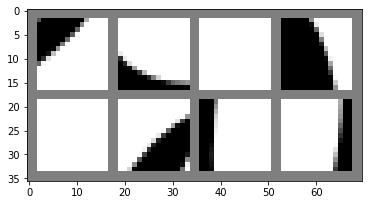


197 AJensonPro-ItDisp smallP


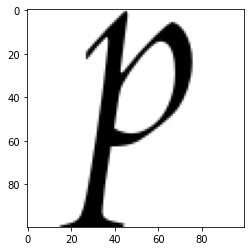


(true_class == predicted_class).item()=True
smallP 0.9672151803970337
smallP 0.9672151803970337


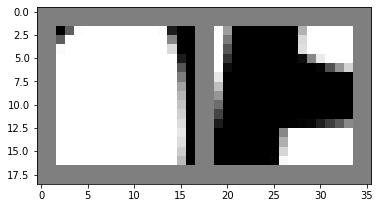


(true_class == predicted_class).item()=True
smallP 0.9965230226516724
smallP 0.9965230226516724


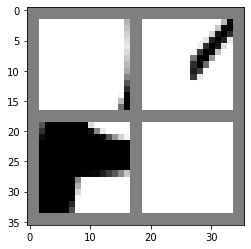


(true_class == predicted_class).item()=True
smallP 0.9974601864814758
smallP 0.9974601864814758


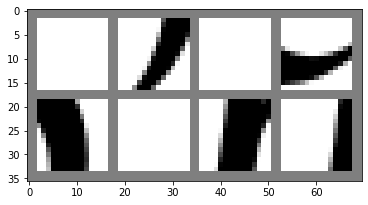


198 AJensonPro-ItDisp smallQ


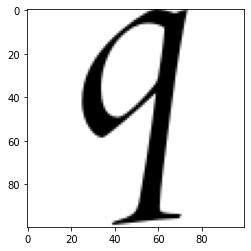


(true_class == predicted_class).item()=True
smallQ 0.569738507270813
smallQ 0.569738507270813


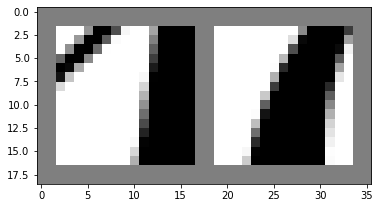


(true_class == predicted_class).item()=True
smallQ 0.9110713005065918
smallQ 0.9110713005065918


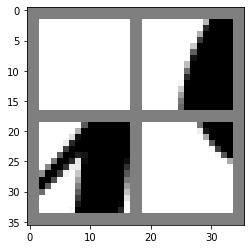


(true_class == predicted_class).item()=True
smallQ 0.9400859475135803
smallQ 0.9400859475135803


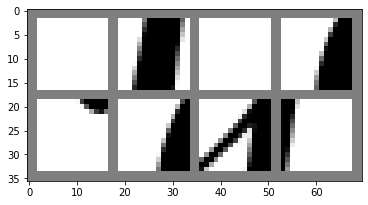


199 AJensonPro-ItDisp smallR


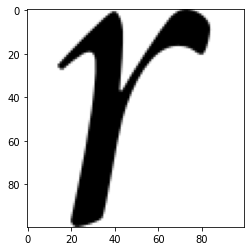


(true_class == predicted_class).item()=True
smallR 0.7340744733810425
smallR 0.7340744733810425


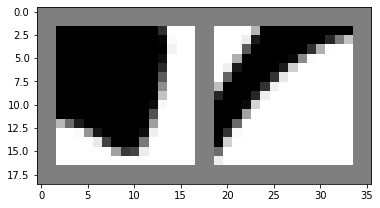


(true_class == predicted_class).item()=True
smallR 0.9886821508407593
smallR 0.9886821508407593


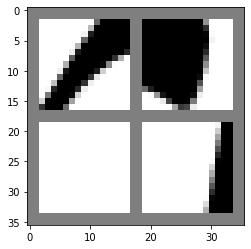


(true_class == predicted_class).item()=True
smallR 0.9944902658462524
smallR 0.9944902658462524


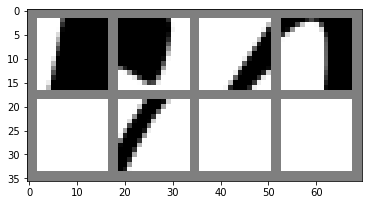


200 AJensonPro-ItDisp smallS


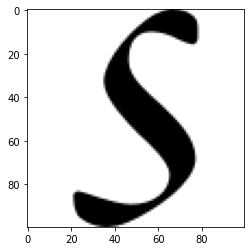


(true_class == predicted_class).item()=False
smallS 0.4641708731651306
capS 0.5293233394622803


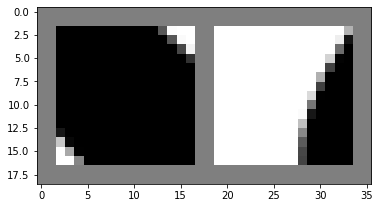


(true_class == predicted_class).item()=False
smallS 0.45067325234413147
capS 0.5480136275291443


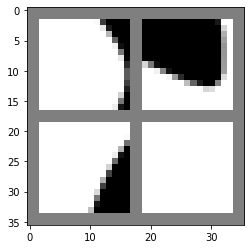


(true_class == predicted_class).item()=True
smallS 0.5961573123931885
smallS 0.5961573123931885


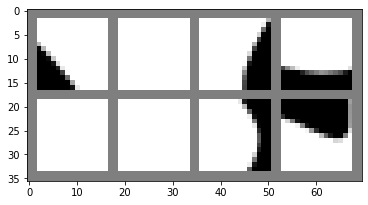


201 AJensonPro-ItDisp smallT


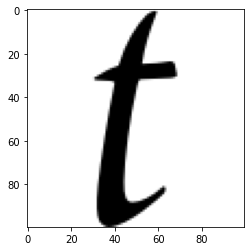


(true_class == predicted_class).item()=True
smallT 0.9636916518211365
smallT 0.9636916518211365


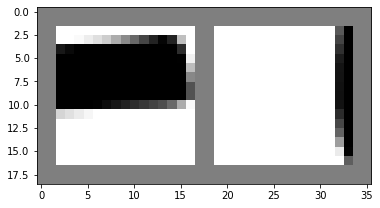


(true_class == predicted_class).item()=True
smallT 0.9775698184967041
smallT 0.9775698184967041


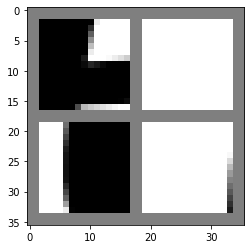


(true_class == predicted_class).item()=True
smallT 0.998629093170166
smallT 0.998629093170166


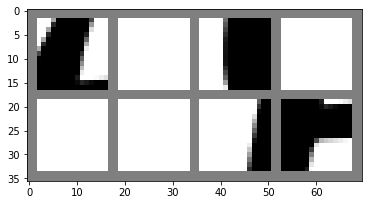


202 AJensonPro-ItDisp smallU


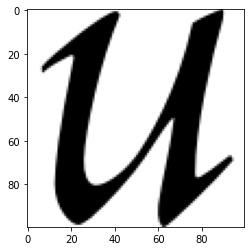


(true_class == predicted_class).item()=True
smallU 0.7510647177696228
smallU 0.7510647177696228


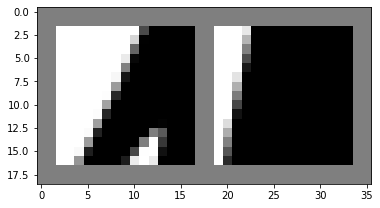


(true_class == predicted_class).item()=True
smallU 0.8107049465179443
smallU 0.8107049465179443


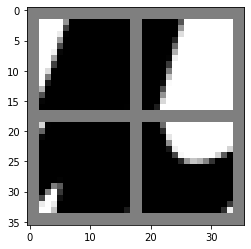


(true_class == predicted_class).item()=True
smallU 0.9709481000900269
smallU 0.9709481000900269


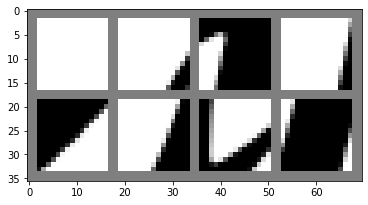


203 AJensonPro-ItDisp smallV


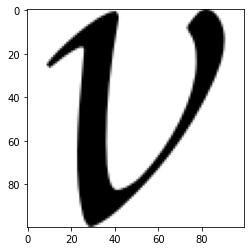


(true_class == predicted_class).item()=True
smallV 0.46709975600242615
smallV 0.46709975600242615


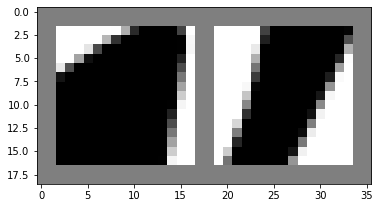


(true_class == predicted_class).item()=True
smallV 0.6479421257972717
smallV 0.6479421257972717


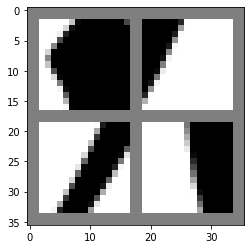


(true_class == predicted_class).item()=True
smallV 0.9339990615844727
smallV 0.9339990615844727


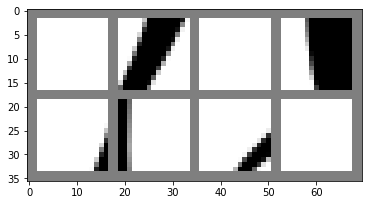


204 AJensonPro-ItDisp smallW


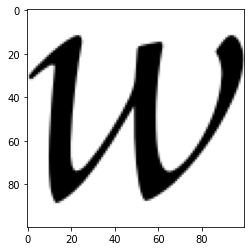


(true_class == predicted_class).item()=True
smallW 0.7355154752731323
smallW 0.7355154752731323


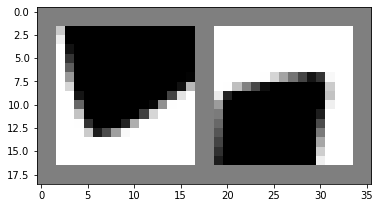


(true_class == predicted_class).item()=True
smallW 0.8291978240013123
smallW 0.8291978240013123


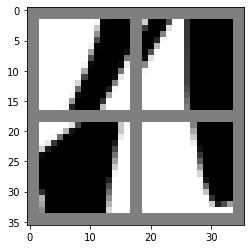


(true_class == predicted_class).item()=True
smallW 0.9836148619651794
smallW 0.9836148619651794


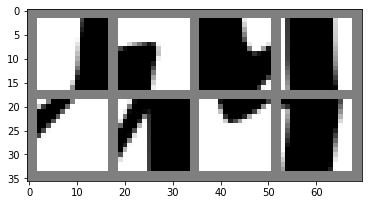


205 AJensonPro-ItDisp smallX


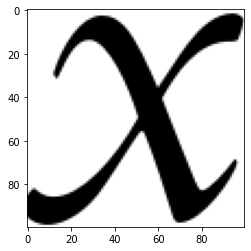


(true_class == predicted_class).item()=True
smallX 0.9813107252120972
smallX 0.9813107252120972


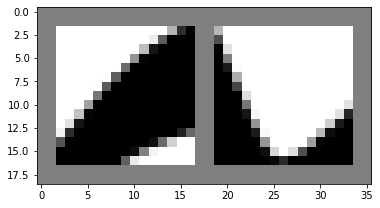


(true_class == predicted_class).item()=True
smallX 0.9833532571792603
smallX 0.9833532571792603


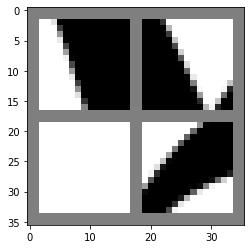


(true_class == predicted_class).item()=True
smallX 0.9840563535690308
smallX 0.9840563535690308


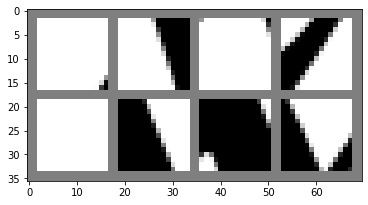


206 AJensonPro-ItDisp smallY


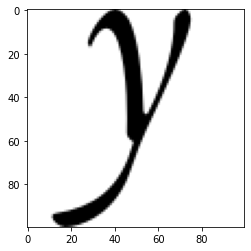


(true_class == predicted_class).item()=True
smallY 0.7798516750335693
smallY 0.7798516750335693


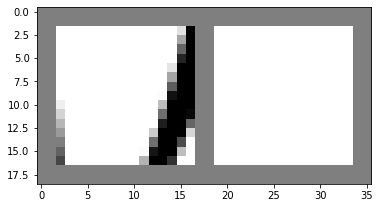


(true_class == predicted_class).item()=True
smallY 0.9170438051223755
smallY 0.9170438051223755


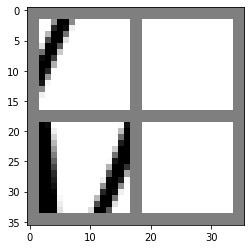


(true_class == predicted_class).item()=True
smallY 0.9979962110519409
smallY 0.9979962110519409


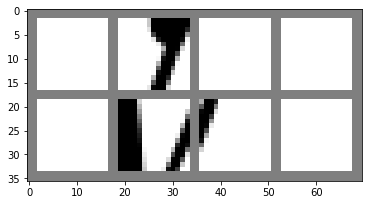


207 AJensonPro-ItDisp smallZ


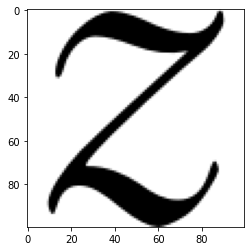


(true_class == predicted_class).item()=True
smallZ 0.924611508846283
smallZ 0.924611508846283


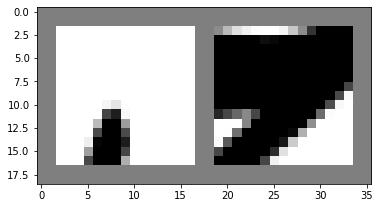


(true_class == predicted_class).item()=True
smallZ 0.9917845726013184
smallZ 0.9917845726013184


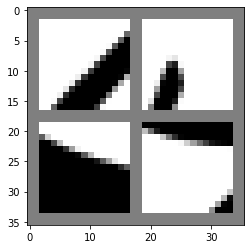


(true_class == predicted_class).item()=True
smallZ 0.9943351149559021
smallZ 0.9943351149559021


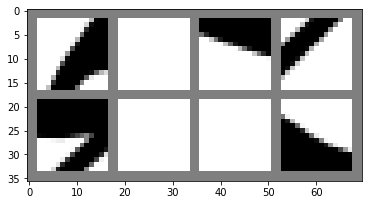

In [10]:
print(len(dataset) / 52)
with torch.no_grad():
    for i, (image, t) in zip(range(52 * 4), dataset):
        font = t['font']
        class_ = t['alphabet']
        print(i, dataset.unique_font[font], dataset.unique_alphabet[class_])
        plt.imshow(to_pil_image(image), 'gray')
        plt.show()
        print()
        x = image[None].expand([2**16, -1, -1, -1])
        for patch_n, nrow in zip(*zip([2, 2], [4, 2], [8, 4])):
            patch = make_patch2d(x, config.hparams.patch_size, patch_n)
            y = model(patch)
            max_index = y[:, class_].argmax()

            true_class = class_
            true_prob = y[max_index].softmax(0)[class_].item()
            predicted_class = y[max_index].argmax(0)
            predicted_prob = y[max_index].softmax(0)[predicted_class].item()
            
            print(f'(true_class == predicted_class).item()={(true_class == predicted_class).item()}')
            print(dataset.unique_alphabet[true_class], true_prob)
            print(dataset.unique_alphabet[predicted_class], predicted_prob)
            plt.imshow(to_pil_image(make_grid(patch[max_index], nrow=nrow, pad_value=0.5)))
            plt.show()
            print()

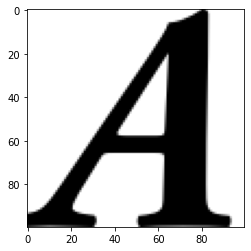


5


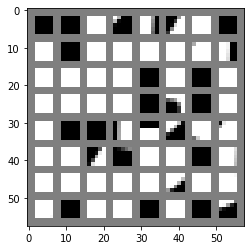


7


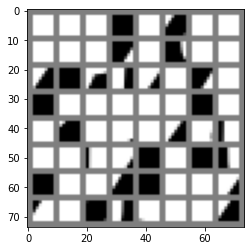


9


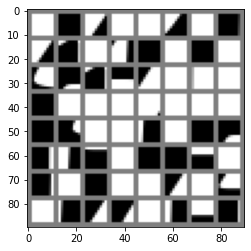


15


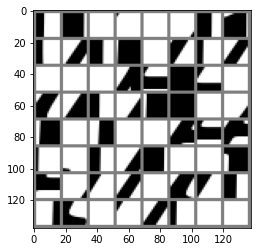


25


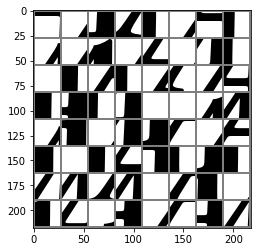

In [13]:
with torch.no_grad():
    for i, (image, t) in zip(range(1), dataset):
        plt.imshow(to_pil_image(image), 'gray')
        plt.show()
        x = image[None]
        print()
        for patch_size in [5, 7, 9, 15, 25]:
            print(patch_size)
            patch = make_patch2d(x, patch_size, 64)
            plt.imshow(to_pil_image(make_grid(patch[0], nrow=8, pad_value=0.5)))
            plt.show()
            print()